# **Previsão Dólar**

A importância do dólar no mundo e a importância de prever seus movimentos

O dólar americano desempenha um papel central na economia global. Sendo a moeda de reserva mundial dominante, ele é amplamente utilizado em transações comerciais internacionais, investimentos e como referência para outras moedas. Essa posição confere aos Estados Unidos uma influência considerável sobre a economia global e torna a volatilidade do dólar um fator crítico para países, empresas e investidores em todo o mundo.

A capacidade de prever os movimentos do dólar é de suma importância por várias razões:

1.  **Impacto no comércio internacional:** Flutuações no valor do dólar afetam diretamente o custo das importações e o preço das exportações para todos os países. Uma valorização do dólar encarece as exportações americanas e barateia as importações, enquanto uma desvalorização tem o efeito oposto. Para empresas que operam globalmente, a previsão da taxa de câmbio é vital para planejar custos, preços e estratégias de expansão.

2.  **Gerenciamento de risco:** Empresas e investidores com exposição a ativos ou passivos denominados em dólar enfrentam o risco cambial. Prever os movimentos da moeda permite implementar estratégias de hedge (proteção) para mitigar perdas potenciais causadas por variações desfavoráveis nas taxas de câmbio.

3.  **Decisões de investimento:** Investidores que aplicam em mercados internacionais precisam considerar o impacto da variação cambial no retorno de seus investimentos. Uma previsão precisa do dólar pode informar decisões sobre alocação de ativos, escolha de mercados e diversificação de portfólio.

4.  **Política monetária:** Bancos centrais ao redor do mundo monitoram de perto o valor do dólar, pois ele influencia a inflação, a competitividade das exportações e a estabilidade financeira. Prever a trajetória do dólar pode auxiliar na formulação e implementação de políticas monetárias eficazes.

5.  **Preços de commodities:** Muitas commodities importantes, como petróleo e ouro, são cotadas em dólar. Uma valorização do dólar tende a encarecer essas commodities para compradores que utilizam outras moedas, impactando a inflação e o poder de compra em diversos países.

Embora a previsão dos movimentos do dólar seja complexa e sujeita a muitas variáveis (políticas, econômicas, geopolíticas), a busca por modelos e análises que ofereçam insights sobre sua possível trajetória é fundamental para navegar no cenário econômico global. Ferramentas e técnicas de previsão, incluindo análise técnica, análise fundamentalista e modelos econométricos, são amplamente utilizadas na tentativa de antecipar essas variações e tomar decisões mais informadas.


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import yfinance as yf

# **Buscar dados**

## Dados FRED - Dados americanos

In [2]:
!pip install fredapi

--- Puxando dados da FRED API ---

Tentando puxar: Payroll (Total Nonfarm Employment) (ID: PAYEMS)...
Dados recentes de 'Payroll (Total Nonfarm Employment)':
2025-02-01    159155.0
2025-03-01    159275.0
2025-04-01    159433.0
2025-05-01    159577.0
2025-06-01    159724.0
dtype: float64

Tentando puxar: Taxa de Desemprego (Unemployment Rate) (ID: UNRATE)...
Dados recentes de 'Taxa de Desemprego (Unemployment Rate)':
2025-02-01    4.1
2025-03-01    4.2
2025-04-01    4.2
2025-05-01    4.2
2025-06-01    4.1
dtype: float64

Tentando puxar: PIB (Gross Domestic Product) (ID: GDP)...
Dados recentes de 'PIB (Gross Domestic Product)':
2024-01-01    28624.069
2024-04-01    29016.714
2024-07-01    29374.914
2024-10-01    29723.864
2025-01-01    29962.047
dtype: float64

Tentando puxar: IPC (Consumer Price Index - All Items) (ID: CPIAUCSL)...
Dados recentes de 'IPC (Consumer Price Index - All Items)':
2025-02-01    319.775
2025-03-01    319.615
2025-04-01    320.321
2025-05-01    320.580
2025-06-0

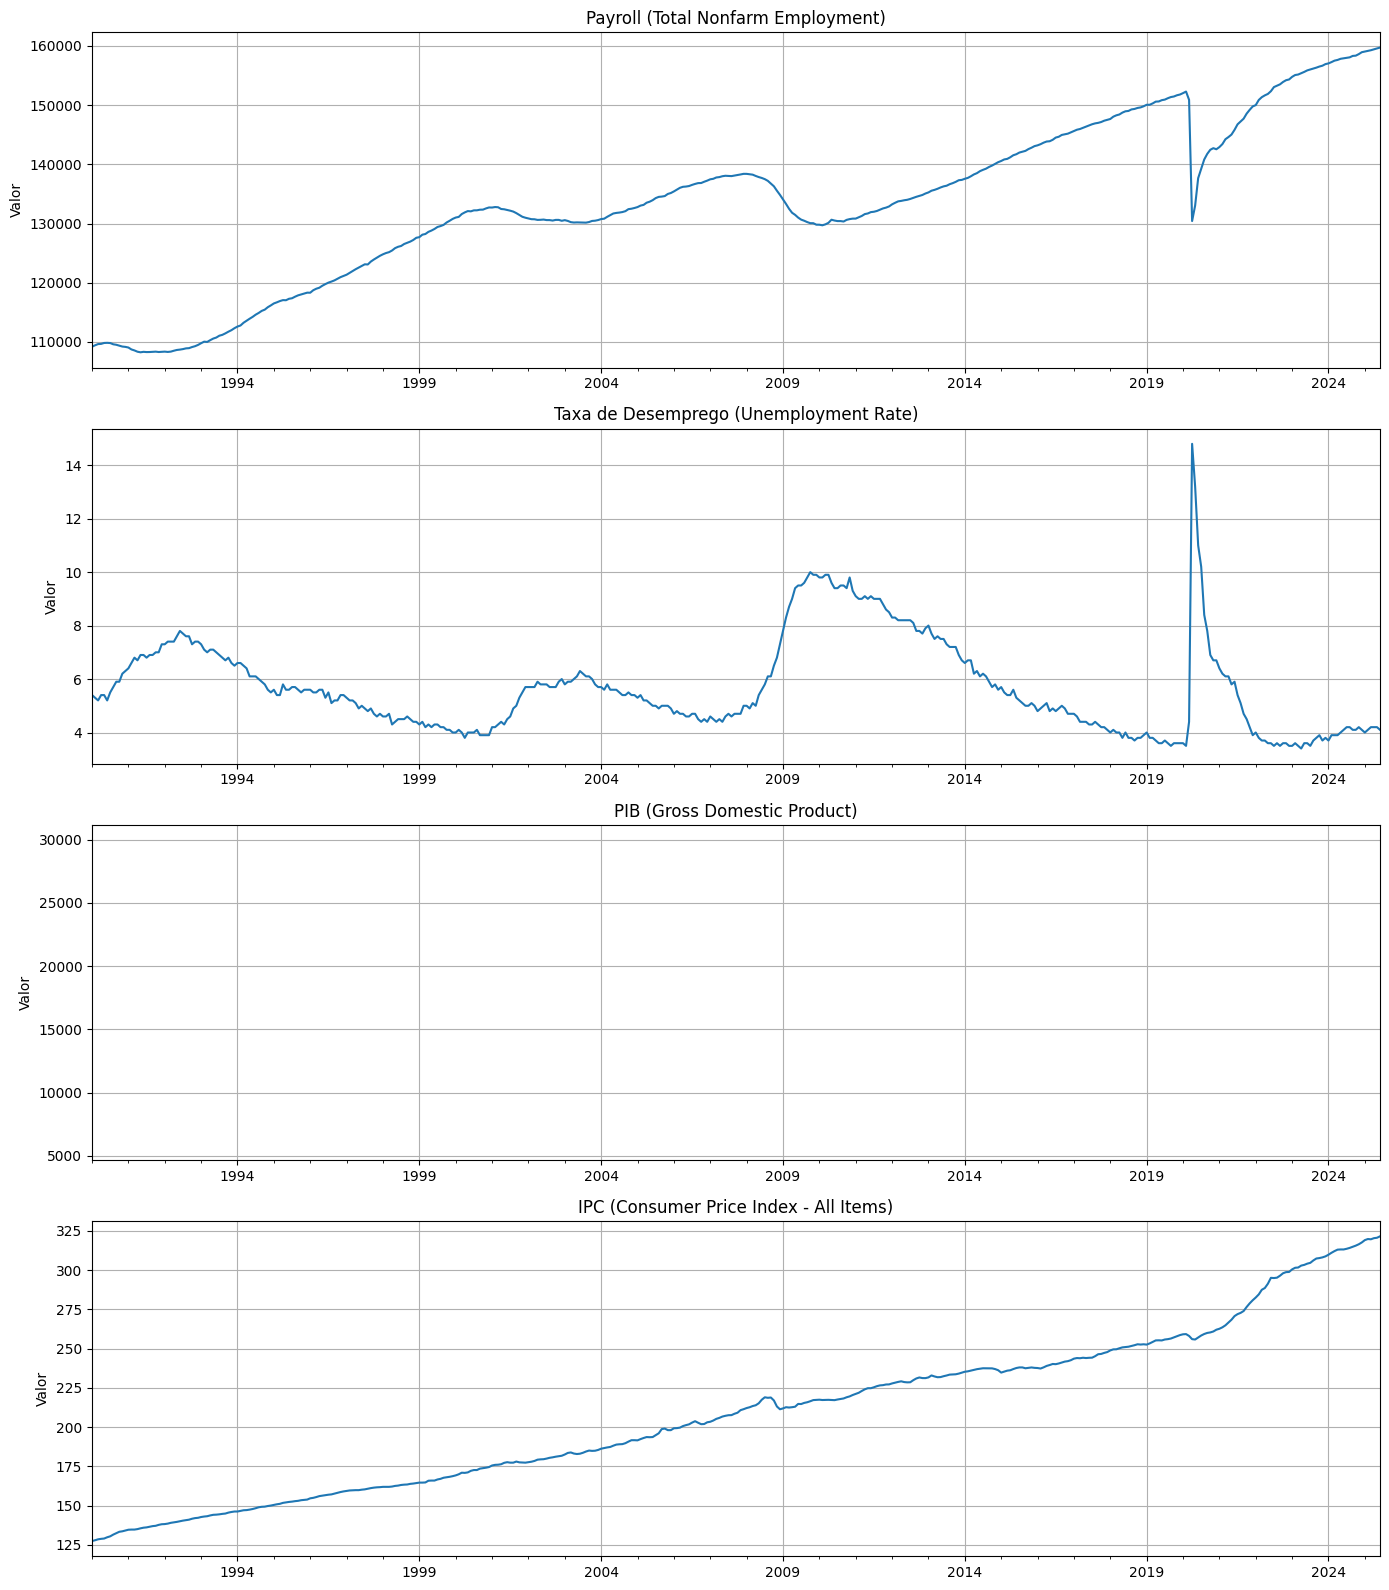

In [3]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt

# --- Sua Chave de API da FRED ---
api_key = '11f79b69550ec1b66dc2d4f0ae870885'
fred = Fred(api_key=api_key)

# --- Dicionário com os IDs das séries e seus nomes amigáveis ---
series_ids = {
    'PAYEMS': 'Payroll (Total Nonfarm Employment)',
    'UNRATE': 'Taxa de Desemprego (Unemployment Rate)',
    'GDP': 'PIB (Gross Domestic Product)',
    'CPIAUCSL': 'IPC (Consumer Price Index - All Items)'
}

# --- Data de início para todas as séries (ajuste conforme necessário) ---
# Usamos 1990-01-01 como um ponto de partida razoável para a maioria.
start_date = '1990-01-01'

# --- Loop para puxar e exibir cada série ---
all_data = pd.DataFrame() # Para armazenar todos os dados em um único DataFrame

print("--- Puxando dados da FRED API ---")

for series_id, series_name in series_ids.items():
    print(f"\nTentando puxar: {series_name} (ID: {series_id})...")
    try:
        # Puxa a série
        data = fred.get_series(series_id, observation_start=start_date)

        if not data.empty:
            print(f"Dados recentes de '{series_name}':")
            print(data.tail()) # Mostra as últimas 5 observações

            # Renomeia a série para o nome amigável e adiciona ao DataFrame consolidado
            all_data[series_name] = data
        else:
            print(f"Não foram encontrados dados para '{series_name}' ou a série está vazia.")

    except Exception as e:
        print(f"Erro ao puxar '{series_name}': {e}")

# --- Exibindo um resumo do DataFrame consolidado (se houver dados) ---
if not all_data.empty:
    print("\n--- Resumo dos Dados Puxados (DataFrame Consolidado) ---")
    print(all_data.info())
    print("\nÚltimas 5 linhas do DataFrame consolidado:")
    print(all_data.tail())

    # --- Visualizar os dados (opcional, requer matplotlib) ---
    print("\n--- Gerando gráficos dos dados ---")
    fig, axes = plt.subplots(nrows=len(series_ids), ncols=1, figsize=(14, 4 * len(series_ids)))

    # Garante que 'axes' seja um array se houver apenas um subplot
    if len(series_ids) == 1:
        axes = [axes]

    for i, (series_id, series_name) in enumerate(series_ids.items()):
        if series_name in all_data.columns and not all_data[series_name].dropna().empty:
            all_data[series_name].plot(ax=axes[i], title=series_name, grid=True)
            axes[i].set_ylabel('Valor')
        else:
            axes[i].set_title(f"Dados de '{series_name}' não disponíveis para plotagem")
            axes[i].set_visible(False) # Oculta o subplot se não houver dados

    plt.tight_layout()
    plt.show()
else:
    print("\nNenhum dado foi puxado com sucesso para consolidação e plotagem.")

### cpi, taxa de desemprego , pib,

In [4]:
# prompt: da linha anterior queria tirar esse monte de print que voce fez

import pandas as pd
# --- Sua Chave de API da FRED ---
# Lembre-se de manter sua chave API segura e não a compartilhar publicamente.
api_key = '11f79b69550ec1b66dc2d4f0ae870885'
fred = Fred(api_key=api_key)

# --- Definição das séries a serem puxadas e os nomes das colunas no DataFrame final ---
# Usamos nomes claros e descritivos para as colunas.
series_definitions = {
    'PAYEMS': 'Payroll (Milhões)',
    'UNRATE': 'Taxa_Desemprego (%)',
    'GDP': 'PIB (Bilhões USD) EUA',
    'CPIAUCSL': 'IPC (Nível)', # Nível base para calcular as variações
    'DFF': 'Fed_Funds (%)'
}

# --- Data de início para todas as séries ---
# Um histórico mais longo é útil para o cálculo de variações e análises de longo prazo.
start_date = '1970-01-01'

# --- DataFrame vazio para consolidar todos os dados ---
# Ele será preenchido com as séries puxadas e processadas.
consolidated_df = pd.DataFrame()

# --- Loop para puxar cada série e adicioná-la ao DataFrame consolidado ---
for series_id, col_name in series_definitions.items():
    try:
        data = fred.get_series(series_id, observation_start=start_date)

        if not data.empty:
            # Adiciona a série ao DataFrame consolidado, renomeando a coluna
            consolidated_df[col_name] = data
        else:
            print(f"Warning: No data found for '{col_name}' (ID: {series_id}).")

    except Exception as e:
        print(f"Error fetching '{col_name}' (ID: {series_id}): {e}")

# --- Processar o CPI para suas variações (se os dados de nível foram puxados com sucesso) ---
if 'IPC (Nível)' in consolidated_df.columns and not consolidated_df['IPC (Nível)'].empty:
    # Variação Mensal do IPC (%)
    # Calcula a variação percentual do mês anterior e multiplica por 100.
    consolidated_df['IPC_Variacao_Mensal (%)'] = consolidated_df['IPC (Nível)'].pct_change() * 100

    # Variação Anual do IPC (%) (ano contra ano)
    # Calcula a variação percentual em relação a 12 meses atrás e multiplica por 100.
    consolidated_df['IPC_Variacao_Anual (%)'] = consolidated_df['IPC (Nível)'].pct_change(periods=12) * 100
else:
    print("Warning: CPI level data not available, skipping CPI variation calculations.")

# --- Pós-processamento: Ordenar o DataFrame pelo índice (datas) ---
# Isso garante que as datas estejam em ordem crescente.
consolidated_df = consolidated_df.sort_index()


In [5]:
consolidated_df

Payroll (Milhões)  Taxa_Desemprego (%)  PIB (Bilhões USD) EUA  \
1970-01-01            71176.0                  3.9               1051.200   
1970-02-01            71305.0                  4.2                    NaN   
1970-03-01            71451.0                  4.4                    NaN   
1970-04-01            71348.0                  4.6               1067.375   
1970-05-01            71124.0                  4.8                    NaN   
...                       ...                  ...                    ...   
2025-02-01           159155.0                  4.1                    NaN   
2025-03-01           159275.0                  4.2                    NaN   
2025-04-01           159433.0                  4.2                    NaN   
2025-05-01           159577.0                  4.2                    NaN   
2025-06-01           159724.0                  4.1                    NaN   

            IPC (Nível)  Fed_Funds (%)  IPC_Variacao_Mensal (%)  \
1970-01-01       37.900           5.00                      NaN   
1970-02-01       38.100           9.38                 0.527704   
1970-03-01       38.300           8.50                 0.524934   
1970-04-01       38.500           8.00                 0.522193   
1970-05-01       38.600           8.63                 0.259740   
...                 ...            ...                      ...   
2025-02-01      319.775           4.33                 0.215929   
2025-03-01      319.615           4.33                -0.050035   
2025-04-01      320.321           4.33                 0.220891   
2025-05-01      320.580           4.33                 0.080856   
2025-06-01      321.500           4.33                 0.286980   

            IPC_Variacao_Anual (%)  
1970-01-01                     NaN  
1970-02-01                     NaN  
1970-03-01                     NaN  
1970-04-01                     NaN  
1970-05-01                     NaN  
...                            ...  
2025-02-01                2.814270  
2025-03-01                2.405585  
2025-04-01                2.333747  
2025-05-01                2.375934  
2025-06-01                2.672683  

[666 rows x 7 columns]

In [6]:
# prompt: utilizar dados do consolidated_df até 01 01 2025

consolidated_df_filtered = consolidated_df[consolidated_df.index <= '2025-01-01'].copy()
print("DataFrame filtrado até 01/01/2025:")
print(consolidated_df_filtered.tail())

DataFrame filtrado até 01/01/2025:
            Payroll (Milhões)  Taxa_Desemprego (%)  PIB (Bilhões USD) EUA  \
2024-09-01           158314.0                  4.1                    NaN   
2024-10-01           158358.0                  4.1              29723.864   
2024-11-01           158619.0                  4.2                    NaN   
2024-12-01           158942.0                  4.1                    NaN   
2025-01-01           159053.0                  4.0              29962.047   

            IPC (Nível)  Fed_Funds (%)  IPC_Variacao_Mensal (%)  \
2024-09-01      314.851           5.33                 0.229204   
2024-10-01      315.564           4.83                 0.226456   
2024-11-01      316.449           4.83                 0.280450   
2024-12-01      317.603           4.58                 0.364672   
2025-01-01      319.086           4.33                 0.466935   

            IPC_Variacao_Anual (%)  
2024-09-01                2.432541  
2024-10-01               

In [7]:
dados_americanos = consolidated_df.copy()

## Dados do dólar yahoo finance

#### Buscando dados

In [8]:


import pandas as pd
# Definindo os tickers e os nomes amigáveis
tickers = {
    "USDBRL=X": "USDBRL",
    "BZ=F": "Brent",
    "^GSPC": "SP500",
    "DX-Y.NYB": "DXY"
}

# Data de início e fim
start_date = "2010-01-01"
end_date = "2025-06-01"

# DataFrame vazio para armazenar os preços de fechamento
yf_data = pd.DataFrame()

print("--- Puxando dados do Yahoo Finance ---")

for ticker, name in tickers.items():
    try:
        # Puxa os dados do ticker com a data de início e fim especificadas
        data = yf.download(ticker, start=start_date, end=end_date)

        # Verifica se o DataFrame de dados baixados não está vazio e contém a coluna 'Close'
        if not data.empty and 'Close' in data.columns:
            # Adiciona a coluna 'Close' ao DataFrame consolidado, renomeando a coluna
            yf_data[name] = data['Close']
        else:
            # Imprime um aviso se não encontrar dados ou a coluna 'Close'
            print(f"Warning: No data or 'Close' column found for '{name}' (Ticker: {ticker}).")

    except Exception as e:
        # Imprime um erro se houver um problema ao baixar os dados
        print(f"Error fetching data for '{name}' (Ticker: {ticker}): {e}")

# --- Pós-processamento: Ordenar o DataFrame pelo índice (datas) e remover linhas com todos os NaNs ---
# Isso garante que as datas estejam em ordem crescente e remove linhas onde nenhum ticker teve dados naquela data.
yf_data = yf_data.sort_index().dropna(how='all')

print("\n--- Resumo dos Dados Puxados (DataFrame do Yahoo Finance) ---")
print(yf_data.info())
print("\nÚltimas 5 linhas do DataFrame do Yahoo Finance:")
print(yf_data.tail())

yf_data


--- Puxando dados do Yahoo Finance ---


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


--- Resumo dos Dados Puxados (DataFrame do Yahoo Finance) ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4011 entries, 2010-01-04 to 2025-05-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USDBRL  4011 non-null   float64
 1   Brent   3837 non-null   float64
 2   SP500   3869 non-null   float64
 3   DXY     3870 non-null   float64
dtypes: float64(4)
memory usage: 156.7 KB
None

Últimas 5 linhas do DataFrame do Yahoo Finance:
            USDBRL      Brent        SP500        DXY
Date                                                 
2025-05-26  5.6452        NaN          NaN  98.930000
2025-05-27  5.6666  64.089996  5921.540039  99.519997
2025-05-28  5.6374  64.900002  5888.549805  99.879997
2025-05-29  5.6887  64.150002  5912.169922  99.279999
2025-05-30  5.6651  63.900002  5911.689941  99.330002


USDBRL      Brent        SP500        DXY
Date                                                 
2010-01-04  1.7190  80.120003  1132.989990  77.529999
2010-01-05  1.7370  80.589996  1136.520020  77.620003
2010-01-06  1.7315  81.889999  1137.140015  77.489998
2010-01-07  1.7389  81.510002  1141.689941  77.910004
2010-01-08  1.7320  81.370003  1144.979980  77.470001
...            ...        ...          ...        ...
2025-05-26  5.6452        NaN          NaN  98.930000
2025-05-27  5.6666  64.089996  5921.540039  99.519997
2025-05-28  5.6374  64.900002  5888.549805  99.879997
2025-05-29  5.6887  64.150002  5912.169922  99.279999
2025-05-30  5.6651  63.900002  5911.689941  99.330002

[4011 rows x 4 columns]

In [9]:
yf_data.tail()

USDBRL      Brent        SP500        DXY
Date                                                 
2025-05-26  5.6452        NaN          NaN  98.930000
2025-05-27  5.6666  64.089996  5921.540039  99.519997
2025-05-28  5.6374  64.900002  5888.549805  99.879997
2025-05-29  5.6887  64.150002  5912.169922  99.279999
2025-05-30  5.6651  63.900002  5911.689941  99.330002

#### USDBRL

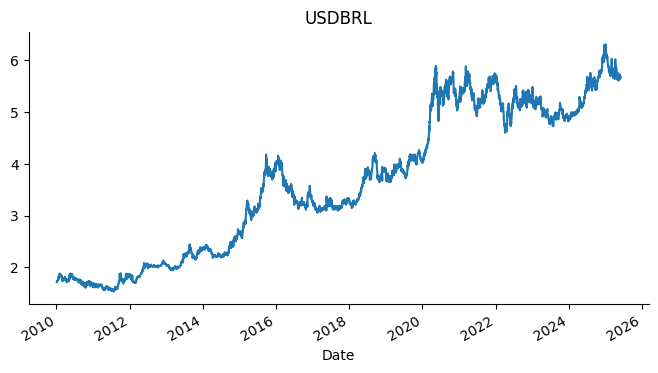

In [10]:

from matplotlib import pyplot as plt
yf_data['USDBRL'].plot(kind='line', figsize=(8, 4), title='USDBRL')
plt.gca().spines[['top', 'right']].set_visible(False)

#### Comparação variáveis

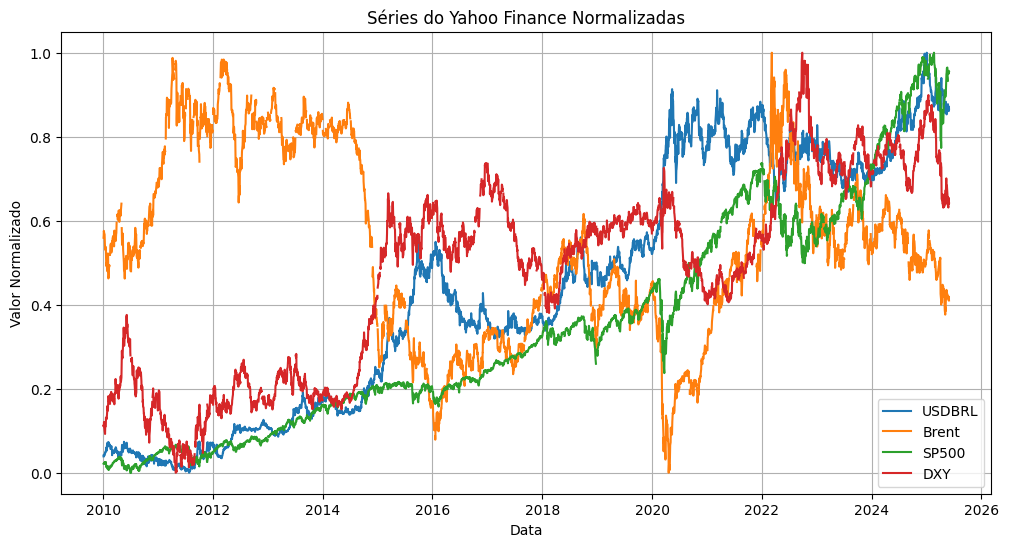

In [11]:
# prompt: faz um gráfico normalizando as váriaves para colocar na mesma escala e  todas as colunas da yf_data em um gráfico de linha

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Cria um MinMaxScaler
scaler = MinMaxScaler()

# Normaliza os dados (aplica a transformação em todas as colunas)
yf_data_normalized = pd.DataFrame(scaler.fit_transform(yf_data), columns=yf_data.columns, index=yf_data.index)

# Plota os dados normalizados
plt.figure(figsize=(12, 6))
for column in yf_data_normalized.columns:
    plt.plot(yf_data_normalized.index, yf_data_normalized[column], label=column)

plt.title('Séries do Yahoo Finance Normalizadas')
plt.xlabel('Data')
plt.ylabel('Valor Normalizado')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
dados_dolar = yf_data.copy()

## Buscar dados econômicos Brasil

### Selic

In [13]:
# prompt: instale a biblioteca de series temporais (sgs) do bcb

!pip install python-bcb

In [14]:

from bcb import sgs

In [15]:

from bcb import sgs

import pandas as pd
import time

while True:
    try:
        selic_meta1 = sgs.get({'Selic_Meta': 432}, start='1996-01-01' , end='2005-12-31')
        selic_meta2 = sgs.get({'Selic_Meta': 432}, start='2006-01-01' , end='2015-12-31')
        # Adicione mais chamadas sgs.get conforme necessário para cobrir o período completo
        print("Dados da Selic buscados com sucesso!")
        break # Sai do loop se a busca for bem-sucedida
    except Exception as e:
        print(f"Erro ao buscar dados da Selic: {e}. Tentando novamente em 5 segundos...")
        time.sleep(5) # Espera 5 segundos antes de tentar novamente




Erro ao buscar dados da Selic: Expected object or value. Tentando novamente em 5 segundos...
Erro ao buscar dados da Selic: Expected object or value. Tentando novamente em 5 segundos...
Dados da Selic buscados com sucesso!


In [16]:
# prompt: desde código abaixo gere um loop infinto até dar certo
# selic_meta3 = sgs.get({'Selic_Meta': 432}, start='2016-01-01' )

while True:
    try:
        selic_meta3 = sgs.get({'Selic_Meta': 432}, start='2016-01-01')
        print("Dados da Selic (2016 em diante) buscados com sucesso!")
        break # Sai do loop se a busca for bem-sucedida
    except Exception as e:
        print(f"Erro ao buscar dados da Selic (2016 em diante): {e}. Tentando novamente em 5 segundos...")
        time.sleep(5) # Espera 5 segundos antes de tentar novamente

Erro ao buscar dados da Selic (2016 em diante): Expected object or value. Tentando novamente em 5 segundos...
Erro ao buscar dados da Selic (2016 em diante): Expected object or value. Tentando novamente em 5 segundos...
Dados da Selic (2016 em diante) buscados com sucesso!


In [17]:
# prompt: concatene selic_meta1 e selic_meta2  , para um dataframe chamado selic_meta

selic_meta = pd.concat([selic_meta1, selic_meta2 , selic_meta3])



In [59]:
# prompt: gere um gráfico no plotly de linha com o selic_meta

import plotly.express as px

fig = px.line(selic_meta, x=selic_meta.index, y='Selic_Meta', title='Taxa Selic Meta ao longo do tempo')
fig.show()

### Dados economicos brasil

In [19]:
# prompt: traga no api do bcb os dados de inflação mensal, anual, pib, taxa de desemprego, balança comercial , resultado primário fiscal, coloque todos em um dataframe só . não precisa de gráfico

import pandas as pd
# Códigos das séries do SGS para os indicadores brasileiros
# 433: Índice Nacional de Preços ao Consumidor Amplo (IPCA) - Variação Mensal
# 13522: Índice Nacional de Preços ao Consumidor Amplo (IPCA) - variação mensal acumulada 12 meses
# 732: Produto Interno Bruto (PIB) - Taxa de variação real trimestral
# 24369: Taxa de desocupação - PNAD Contínua
# 11764: Balança Comercial - Saldo (US$ milhões)
# 22147: Resultado Primário do Governo Central (saldo) - Acumulado em 12 meses

brazil_series_codes = {
    'IPCA_Mensal': 433,
    'IPCA_Acumulado_12M': 13522,
    'PIB_Trimestral': 22099 ,
    'Taxa_Desemprego': 24369,
    'Balança_Comercial_Saldo': 11764,
    'Resultado_Primario_12M': 2144
}

# Data de início para as séries do BCB (ajuste conforme necessário)
# Algumas séries podem ter dados disponíveis apenas a partir de datas mais recentes.
bcb_start_date = '2000-01-01'

# DataFrame para armazenar os dados do BCB
bcb_data = pd.DataFrame()

print("\n--- Puxando dados do BCB API (SGS) ---")

for name, code in brazil_series_codes.items():
    try:
        print(f"Tentando puxar: {name} (Código SGS: {code})...")
        data = sgs.get({name: code}, start=bcb_start_date)

        if not data.empty:
            # Renomeia a coluna para o nome amigável (sgs.get já faz isso se passarmos um dict)
            # Mas vamos garantir que o nome esteja correto
            # data = data.rename(columns={code: name}) # sgs.get já faz isso

            # Adiciona ao DataFrame consolidado
            bcb_data = pd.concat([bcb_data, data], axis=1)

            #print(f"Dados recentes de '{name}':")
            #print(data.tail()) # Mostra as últimas 5 observações
        else:
            print(f"Não foram encontrados dados para '{name}' (Código SGS: {code}) ou a série está vazia.")

    except Exception as e:
        print(f"Erro ao puxar '{name}' (Código SGS: {code}): {e}")

# --- Pós-processamento: Ordenar o DataFrame do BCB pelo índice (datas) ---
bcb_data = bcb_data.sort_index()

# --- Combinar todos os DataFrames ---
# Usamos `concat` ou `merge`. `concat` é mais simples se todos os DataFrames
# tiverem índices de data e quisermos apenas juntar as colunas.
# 'outer' join para manter todas as datas presentes em qualquer um dos DataFrames.
# O resample('M') pode ser útil para garantir que as frequências sejam compatíveis (mensal),
# mas algumas séries do BCB são trimestrais ou diárias. Vamos apenas concatenar e lidar com NaNs.





--- Puxando dados do BCB API (SGS) ---
Tentando puxar: IPCA_Mensal (Código SGS: 433)...
Tentando puxar: IPCA_Acumulado_12M (Código SGS: 13522)...
Tentando puxar: PIB_Trimestral (Código SGS: 22099)...
Tentando puxar: Taxa_Desemprego (Código SGS: 24369)...
Erro ao puxar 'Taxa_Desemprego' (Código SGS: 24369): Download error: code = 24369
Tentando puxar: Balança_Comercial_Saldo (Código SGS: 11764)...
Tentando puxar: Resultado_Primario_12M (Código SGS: 2144)...


In [20]:

dados_brasil_mesclados = pd.merge(bcb_data, selic_meta, left_index=True, right_index=True, how='inner')

# Ordenar o DataFrame mesclado por data para garantir a ordem cronológica
dados_brasil_mesclados = dados_brasil_mesclados.sort_index()


In [21]:
dados_brasil_mesclados

IPCA_Mensal  IPCA_Acumulado_12M  PIB_Trimestral  \
Date                                                          
2000-01-01         0.62                8.85          106.40   
2000-02-01         0.13                7.86             NaN   
2000-03-01         0.22                6.92             NaN   
2000-04-01         0.42                6.77          110.25   
2000-05-01         0.01                6.47             NaN   
...                 ...                 ...             ...   
2025-02-01         1.31                5.06             NaN   
2025-03-01         0.56                5.48             NaN   
2025-04-01         0.43                5.53             NaN   
2025-05-01         0.26                5.32             NaN   
2025-06-01         0.24                5.35             NaN   

            Balança_Comercial_Saldo  Resultado_Primario_12M  Selic_Meta  
Date                                                                     
2000-01-01                    99.33                -1188.16       19.00  
2000-02-01                    94.01                -2443.70       19.00  
2000-03-01                    94.46                -5001.22       19.00  
2000-04-01                    97.10                -2212.06       18.50  
2000-05-01                    98.00                -3271.97       18.50  
...                             ...                     ...         ...  
2025-02-01                    63.39                28525.49       13.25  
2025-03-01                    64.03                 2298.56       13.25  
2025-04-01                    66.44               -16490.10       14.25  
2025-05-01                      NaN                37548.20       14.25  
2025-06-01                      NaN                     NaN       14.75  

[306 rows x 6 columns]

In [22]:
# prompt: pegar dados_brasil_mesclados até o dia 01 01 2025

#dados_brasil_mesclados_filtrados = dados_brasil_mesclados[dados_brasil_mesclados.index <= '2025-01-01'].copy()

#dados_brasil_mesclados_filtrados.tail()

## Unir todos

In [23]:
# prompt: quero que mescle os dataframes dados americanos , dados dolar e dados brasil

import pandas as pd
# Unir os 3 DataFrames: dados_americanos, dados_dolar, dados_brasil_mesclados
# Usamos pd.merge com how='outer' para manter todas as datas de todos os dataframes
# e join nos índices (que são as datas).
df_merged = pd.merge(dados_americanos, dados_dolar, left_index=True, right_index=True, how='inner')
df_merged = pd.merge(df_merged, dados_brasil_mesclados, left_index=True, right_index=True, how='inner')

# Opcional: Ordenar o DataFrame final por data
df_merged = df_merged.sort_index()



In [24]:
# prompt: do df_merged , traga apenas dados do ano de 2000 para cá

# Filtrar dados a partir do ano 2000
df_merged_filtered = df_merged[df_merged.index.year >= 2010]


df_merged_filtered

Payroll (Milhões)  Taxa_Desemprego (%)  PIB (Bilhões USD) EUA  \
2010-02-01           129705.0                  9.8                    NaN   
2010-03-01           129865.0                  9.9                    NaN   
2010-04-01           130120.0                  9.9              14980.193   
2010-06-01           130509.0                  9.4                    NaN   
2010-07-01           130415.0                  9.4              15141.607   
...                       ...                  ...                    ...   
2024-08-01           158074.0                  4.2                    NaN   
2024-10-01           158358.0                  4.1              29723.864   
2024-11-01           158619.0                  4.2                    NaN   
2025-04-01           159433.0                  4.2                    NaN   
2025-05-01           159577.0                  4.2                    NaN   

            IPC (Nível)  Fed_Funds (%)  IPC_Variacao_Mensal (%)  \
2010-02-01      217.281           0.14                -0.095178   
2010-03-01      217.353           0.14                 0.033137   
2010-04-01      217.403           0.17                 0.023004   
2010-06-01      217.199           0.20                -0.041880   
2010-07-01      217.605           0.17                 0.186925   
...                 ...            ...                      ...   
2024-08-01      314.131           5.33                 0.180185   
2024-10-01      315.564           4.83                 0.226456   
2024-11-01      316.449           4.83                 0.280450   
2025-04-01      320.321           4.33                 0.220891   
2025-05-01      320.580           4.33                 0.080856   

            IPC_Variacao_Anual (%)  USDBRL      Brent        SP500  \
2010-02-01                2.151336  1.8624  73.110001  1089.189941   
2010-03-01                2.286171  1.7980  76.889999  1115.709961   
2010-04-01                2.206771  1.7654  84.010002  1178.099976   
2010-06-01                1.121561  1.8340  72.709999  1070.709961   
2010-07-01                1.340778  1.7989  72.339996  1027.369995   
...                            ...     ...        ...          ...   
2024-08-01                2.610914  5.6566  79.519997  5446.680176   
2024-10-01                2.571403  5.4485  73.559998  5708.750000   
2024-11-01                2.714168  5.7894  73.099998  5728.799805   
2025-04-01                2.333747  5.6984  74.489998  5633.069824   
2025-05-01                2.375934  5.6729  62.130001  5604.140137   

                   DXY  IPCA_Mensal  IPCA_Acumulado_12M  PIB_Trimestral  \
2010-02-01   79.239998         0.78                4.83             NaN   
2010-03-01   80.660004         0.52                5.17             NaN   
2010-04-01   80.779999         0.57                5.26          158.86   
2010-06-01   86.639999         0.00                4.84             NaN   
2010-07-01   84.720001         0.01                4.60          163.63   
...                ...          ...                 ...             ...   
2024-08-01  104.419998        -0.02                4.24             NaN   
2024-10-01  101.190002         0.56                4.76          189.51   
2024-11-01  104.279999         0.39                4.87             NaN   
2025-04-01  104.260002         0.43                5.53             NaN   
2025-05-01  100.250000         0.26                5.32             NaN   

            Balança_Comercial_Saldo  Resultado_Primario_12M  Selic_Meta  
2010-02-01                    64.56                  731.32        8.75  
2010-03-01                    62.54                 3796.25        8.75  
2010-04-01                    59.37               -16609.07        8.75  
2010-06-01                    62.53                 -817.23        9.50  
2010-07-01                    63.32                 -658.86       10.25  
...                             ...                     ...         ...  
2024-08-01            

In [25]:
df_merged_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2010-02-01 to 2025-05-01
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Payroll (Milhões)        131 non-null    float64
 1   Taxa_Desemprego (%)      131 non-null    float64
 2   PIB (Bilhões USD) EUA    41 non-null     float64
 3   IPC (Nível)              131 non-null    float64
 4   Fed_Funds (%)            131 non-null    float64
 5   IPC_Variacao_Mensal (%)  131 non-null    float64
 6   IPC_Variacao_Anual (%)   131 non-null    float64
 7   USDBRL                   131 non-null    float64
 8   Brent                    121 non-null    float64
 9   SP500                    121 non-null    float64
 10  DXY                      121 non-null    float64
 11  IPCA_Mensal              131 non-null    float64
 12  IPCA_Acumulado_12M       131 non-null    float64
 13  PIB_Trimestral           41 non-null     float64
 14  Balança

In [26]:
df_dados = df_merged_filtered.copy()

### Feature enginering

In [27]:
df_dados

Payroll (Milhões)  Taxa_Desemprego (%)  PIB (Bilhões USD) EUA  \
2010-02-01           129705.0                  9.8                    NaN   
2010-03-01           129865.0                  9.9                    NaN   
2010-04-01           130120.0                  9.9              14980.193   
2010-06-01           130509.0                  9.4                    NaN   
2010-07-01           130415.0                  9.4              15141.607   
...                       ...                  ...                    ...   
2024-08-01           158074.0                  4.2                    NaN   
2024-10-01           158358.0                  4.1              29723.864   
2024-11-01           158619.0                  4.2                    NaN   
2025-04-01           159433.0                  4.2                    NaN   
2025-05-01           159577.0                  4.2                    NaN   

            IPC (Nível)  Fed_Funds (%)  IPC_Variacao_Mensal (%)  \
2010-02-01      217.281           0.14                -0.095178   
2010-03-01      217.353           0.14                 0.033137   
2010-04-01      217.403           0.17                 0.023004   
2010-06-01      217.199           0.20                -0.041880   
2010-07-01      217.605           0.17                 0.186925   
...                 ...            ...                      ...   
2024-08-01      314.131           5.33                 0.180185   
2024-10-01      315.564           4.83                 0.226456   
2024-11-01      316.449           4.83                 0.280450   
2025-04-01      320.321           4.33                 0.220891   
2025-05-01      320.580           4.33                 0.080856   

            IPC_Variacao_Anual (%)  USDBRL      Brent        SP500  \
2010-02-01                2.151336  1.8624  73.110001  1089.189941   
2010-03-01                2.286171  1.7980  76.889999  1115.709961   
2010-04-01                2.206771  1.7654  84.010002  1178.099976   
2010-06-01                1.121561  1.8340  72.709999  1070.709961   
2010-07-01                1.340778  1.7989  72.339996  1027.369995   
...                            ...     ...        ...          ...   
2024-08-01                2.610914  5.6566  79.519997  5446.680176   
2024-10-01                2.571403  5.4485  73.559998  5708.750000   
2024-11-01                2.714168  5.7894  73.099998  5728.799805   
2025-04-01                2.333747  5.6984  74.489998  5633.069824   
2025-05-01                2.375934  5.6729  62.130001  5604.140137   

                   DXY  IPCA_Mensal  IPCA_Acumulado_12M  PIB_Trimestral  \
2010-02-01   79.239998         0.78                4.83             NaN   
2010-03-01   80.660004         0.52                5.17             NaN   
2010-04-01   80.779999         0.57                5.26          158.86   
2010-06-01   86.639999         0.00                4.84             NaN   
2010-07-01   84.720001         0.01                4.60          163.63   
...                ...          ...                 ...             ...   
2024-08-01  104.419998        -0.02                4.24             NaN   
2024-10-01  101.190002         0.56                4.76          189.51   
2024-11-01  104.279999         0.39                4.87             NaN   
2025-04-01  104.260002         0.43                5.53             NaN   
2025-05-01  100.250000         0.26                5.32             NaN   

            Balança_Comercial_Saldo  Resultado_Primario_12M  Selic_Meta  
2010-02-01                    64.56                  731.32        8.75  
2010-03-01                    62.54                 3796.25        8.75  
2010-04-01                    59.37               -16609.07        8.75  
2010-06-01                    62.53                 -817.23        9.50  
2010-07-01                    63.32                 -658.86       10.25  
...                             ...                     ...         ...  
2024-08-01            

In [28]:
# prompt: crie colunas inspiradas na USDBRL , crie uma coluna com a média movel de 21 dias , e preencha os valores nnulos com o primeiro valor a seguir ,
# crie uma coluna com  a média movel de 30 dias , e preencha os valores nnulos com o primeiro valor a seguir ,
# crie uma coluna com a variação do dólar diária,
# crie uma coluna com a variação do dólar em 5 dias ,
# crie uma coluna com  o valor do dólar de 15 dia atras ,
# crie uma coluna com  o valor do dólar de 30 dias atras.
# todas preencha os valores nulos com o próximo valor , e depois com o anterior valor.
# depois disso mova a coluna USDBRL para a última posição.

# Média móvel de 21 dias
df_dados['USDBRL_MM_21'] = df_dados['USDBRL'].rolling(window=21).mean()
# Preencher NaNs para a média móvel de 21 dias
df_dados['USDBRL_MM_21'] = df_dados['USDBRL_MM_21'].fillna(method='bfill').fillna(method='ffill')

# Média móvel de 30 dias
df_dados['USDBRL_MM_30'] = df_dados['USDBRL'].rolling(window=30).mean()
# Preencher NaNs para a média móvel de 30 dias
df_dados['USDBRL_MM_30'] = df_dados['USDBRL_MM_30'].fillna(method='bfill').fillna(method='ffill')

# Variação diária do dólar
df_dados['USDBRL_Variacao_Diaria'] = df_dados['USDBRL'].pct_change() * 100
# Preencher NaNs para a variação diária
df_dados['USDBRL_Variacao_Diaria'] = df_dados['USDBRL_Variacao_Diaria'].fillna(method='bfill').fillna(method='ffill')

# Variação do dólar em 5 dias
df_dados['USDBRL_Variacao_5d'] = df_dados['USDBRL'].pct_change(periods=5) * 100
# Preencher NaNs para a variação em 5 dias
df_dados['USDBRL_Variacao_5d'] = df_dados['USDBRL_Variacao_5d'].fillna(method='bfill').fillna(method='ffill')

# Valor do dólar de 15 dias atrás
df_dados['USDBRL_Lag_15d'] = df_dados['USDBRL'].shift(periods=15)
# Preencher NaNs para o lag de 15 dias
df_dados['USDBRL_Lag_15d'] = df_dados['USDBRL_Lag_15d'].fillna(method='bfill').fillna(method='ffill')

# Valor do dólar de 30 dias atrás
df_dados['USDBRL_Lag_30d'] = df_dados['USDBRL'].shift(periods=30)
# Preencher NaNs para o lag de 30 dias
df_dados['USDBRL_Lag_30d'] = df_dados['USDBRL_Lag_30d'].fillna(method='bfill').fillna(method='ffill')

# Mover a coluna USDBRL para a última posição
usdcbrl_col = df_dados.pop('USDBRL') # Remove a coluna e a armazena
df_dados['USDBRL'] = usdcbrl_col # Adiciona a coluna de volta no final



In [29]:
df_dados.head(2)

Payroll (Milhões)  Taxa_Desemprego (%)  PIB (Bilhões USD) EUA  \
2010-02-01           129705.0                  9.8                    NaN   
2010-03-01           129865.0                  9.9                    NaN   

            IPC (Nível)  Fed_Funds (%)  IPC_Variacao_Mensal (%)  \
2010-02-01      217.281           0.14                -0.095178   
2010-03-01      217.353           0.14                 0.033137   

            IPC_Variacao_Anual (%)      Brent        SP500        DXY  ...  \
2010-02-01                2.151336  73.110001  1089.189941  79.239998  ...   
2010-03-01                2.286171  76.889999  1115.709961  80.660004  ...   

            Balança_Comercial_Saldo  Resultado_Primario_12M  Selic_Meta  \
2010-02-01                    64.56                  731.32        8.75   
2010-03-01                    62.54                 3796.25        8.75   

            USDBRL_MM_21  USDBRL_MM_30  USDBRL_Variacao_Diaria  \
2010-02-01      1.712157      1.804243               -3.457908   
2010-03-01      1.712157      1.804243               -3.457908   

            USDBRL_Variacao_5d  USDBRL_Lag_15d  USDBRL_Lag_30d  USDBRL  
2010-02-01           -6.029856          1.8624          1.8624  1.8624  
2010-03-01           -6.029856          1.8624          1.8624  1.7980  

[2 rows x 23 columns]

In [30]:
# prompt: quero preencher todas as colunas  da df_dados os valores nulos das colunas com o valor dos anterior, e depois outro preenchimento com o  valor do próximo valor

# Preencher NaNs usando ffill (forward fill) e depois bfill (backward fill)
df_dados = df_dados.fillna(method='ffill').fillna(method='bfill')



In [31]:
df_dados

Payroll (Milhões)  Taxa_Desemprego (%)  PIB (Bilhões USD) EUA  \
2010-02-01           129705.0                  9.8              14980.193   
2010-03-01           129865.0                  9.9              14980.193   
2010-04-01           130120.0                  9.9              14980.193   
2010-06-01           130509.0                  9.4              14980.193   
2010-07-01           130415.0                  9.4              15141.607   
...                       ...                  ...                    ...   
2024-08-01           158074.0                  4.2              29374.914   
2024-10-01           158358.0                  4.1              29723.864   
2024-11-01           158619.0                  4.2              29723.864   
2025-04-01           159433.0                  4.2              29723.864   
2025-05-01           159577.0                  4.2              29723.864   

            IPC (Nível)  Fed_Funds (%)  IPC_Variacao_Mensal (%)  \
2010-02-01      217.281           0.14                -0.095178   
2010-03-01      217.353           0.14                 0.033137   
2010-04-01      217.403           0.17                 0.023004   
2010-06-01      217.199           0.20                -0.041880   
2010-07-01      217.605           0.17                 0.186925   
...                 ...            ...                      ...   
2024-08-01      314.131           5.33                 0.180185   
2024-10-01      315.564           4.83                 0.226456   
2024-11-01      316.449           4.83                 0.280450   
2025-04-01      320.321           4.33                 0.220891   
2025-05-01      320.580           4.33                 0.080856   

            IPC_Variacao_Anual (%)      Brent        SP500         DXY  ...  \
2010-02-01                2.151336  73.110001  1089.189941   79.239998  ...   
2010-03-01                2.286171  76.889999  1115.709961   80.660004  ...   
2010-04-01                2.206771  84.010002  1178.099976   80.779999  ...   
2010-06-01                1.121561  72.709999  1070.709961   86.639999  ...   
2010-07-01                1.340778  72.339996  1027.369995   84.720001  ...   
...                            ...        ...          ...         ...  ...   
2024-08-01                2.610914  79.519997  5446.680176  104.419998  ...   
2024-10-01                2.571403  73.559998  5708.750000  101.190002  ...   
2024-11-01                2.714168  73.099998  5728.799805  104.279999  ...   
2025-04-01                2.333747  74.489998  5633.069824  104.260002  ...   
2025-05-01                2.375934  62.130001  5604.140137  100.250000  ...   

            Balança_Comercial_Saldo  Resultado_Primario_12M  Selic_Meta  \
2010-02-01                    64.56                  731.32        8.75   
2010-03-01                    62.54                 3796.25        8.75   
2010-04-01                    59.37               -16609.07        8.75   
2010-06-01                    62.53                 -817.23        9.50   
2010-07-01                    63.32                 -658.86       10.25   
...                             ...                     ...         ...   
2024-08-01                    64.32                22224.76       10.50   
2024-10-01                    63.13               -39245.32       10.75   
2024-11-01                    63.29                 5557.20       10.75   
2025-04-01                    66.44               -16490.10       14.25   
2025-05-01                    66.44                37548.20       14.25   

            USDBRL_MM_21  USDBRL_MM_30  USDBRL_Variacao_Diaria  \
2010-02-01      1.712157      1.804243               -3.457908   
2010-03-01      1.712157      1.804243               -3.457908   
2010-04-01      1.712157      1.804243               -1.813122   
2010-06-01      1.712157      1.804243                3.885801   
2010-07-01      1.712157      1.804243               -1.913849   
...                  ...           .

In [32]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2010-02-01 to 2025-05-01
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Payroll (Milhões)        131 non-null    float64
 1   Taxa_Desemprego (%)      131 non-null    float64
 2   PIB (Bilhões USD) EUA    131 non-null    float64
 3   IPC (Nível)              131 non-null    float64
 4   Fed_Funds (%)            131 non-null    float64
 5   IPC_Variacao_Mensal (%)  131 non-null    float64
 6   IPC_Variacao_Anual (%)   131 non-null    float64
 7   Brent                    131 non-null    float64
 8   SP500                    131 non-null    float64
 9   DXY                      131 non-null    float64
 10  IPCA_Mensal              131 non-null    float64
 11  IPCA_Acumulado_12M       131 non-null    float64
 12  PIB_Trimestral           131 non-null    float64
 13  Balança_Comercial_Saldo  131 non-null    float64
 14  Resulta

In [33]:
# prompt: retira as ultimas 30 linhas da df_dados

#df_dados = df_dados.iloc[:-15]
#df_dados

## DataFrame base pronto

In [34]:
df_dados

Payroll (Milhões)  Taxa_Desemprego (%)  PIB (Bilhões USD) EUA  \
2010-02-01           129705.0                  9.8              14980.193   
2010-03-01           129865.0                  9.9              14980.193   
2010-04-01           130120.0                  9.9              14980.193   
2010-06-01           130509.0                  9.4              14980.193   
2010-07-01           130415.0                  9.4              15141.607   
...                       ...                  ...                    ...   
2024-08-01           158074.0                  4.2              29374.914   
2024-10-01           158358.0                  4.1              29723.864   
2024-11-01           158619.0                  4.2              29723.864   
2025-04-01           159433.0                  4.2              29723.864   
2025-05-01           159577.0                  4.2              29723.864   

            IPC (Nível)  Fed_Funds (%)  IPC_Variacao_Mensal (%)  \
2010-02-01      217.281           0.14                -0.095178   
2010-03-01      217.353           0.14                 0.033137   
2010-04-01      217.403           0.17                 0.023004   
2010-06-01      217.199           0.20                -0.041880   
2010-07-01      217.605           0.17                 0.186925   
...                 ...            ...                      ...   
2024-08-01      314.131           5.33                 0.180185   
2024-10-01      315.564           4.83                 0.226456   
2024-11-01      316.449           4.83                 0.280450   
2025-04-01      320.321           4.33                 0.220891   
2025-05-01      320.580           4.33                 0.080856   

            IPC_Variacao_Anual (%)      Brent        SP500         DXY  ...  \
2010-02-01                2.151336  73.110001  1089.189941   79.239998  ...   
2010-03-01                2.286171  76.889999  1115.709961   80.660004  ...   
2010-04-01                2.206771  84.010002  1178.099976   80.779999  ...   
2010-06-01                1.121561  72.709999  1070.709961   86.639999  ...   
2010-07-01                1.340778  72.339996  1027.369995   84.720001  ...   
...                            ...        ...          ...         ...  ...   
2024-08-01                2.610914  79.519997  5446.680176  104.419998  ...   
2024-10-01                2.571403  73.559998  5708.750000  101.190002  ...   
2024-11-01                2.714168  73.099998  5728.799805  104.279999  ...   
2025-04-01                2.333747  74.489998  5633.069824  104.260002  ...   
2025-05-01                2.375934  62.130001  5604.140137  100.250000  ...   

            Balança_Comercial_Saldo  Resultado_Primario_12M  Selic_Meta  \
2010-02-01                    64.56                  731.32        8.75   
2010-03-01                    62.54                 3796.25        8.75   
2010-04-01                    59.37               -16609.07        8.75   
2010-06-01                    62.53                 -817.23        9.50   
2010-07-01                    63.32                 -658.86       10.25   
...                             ...                     ...         ...   
2024-08-01                    64.32                22224.76       10.50   
2024-10-01                    63.13               -39245.32       10.75   
2024-11-01                    63.29                 5557.20       10.75   
2025-04-01                    66.44               -16490.10       14.25   
2025-05-01                    66.44                37548.20       14.25   

            USDBRL_MM_21  USDBRL_MM_30  USDBRL_Variacao_Diaria  \
2010-02-01      1.712157      1.804243               -3.457908   
2010-03-01      1.712157      1.804243               -3.457908   
2010-04-01      1.712157      1.804243               -1.813122   
2010-06-01      1.712157      1.804243                3.885801   
2010-07-01      1.712157      1.804243               -1.913849   
...                  ...           .

In [35]:
# prompt: crie uma ultima coluna que traz a coluna USDBRL uma semana a frente

df_dados['USDBRL_1S_Ahead'] = df_dados['USDBRL'].shift(-7).fillna(method='bfill').fillna(method='ffill')

df_dados['USDBRL_5_Ahead'] = df_dados['USDBRL'].shift(-5).fillna(method='bfill').fillna(method='ffill')

df_dados['USDBRL_1M_Ahead'] = df_dados['USDBRL'].shift(-21).fillna(method='bfill').fillna(method='ffill')


df_dados


Payroll (Milhões)  Taxa_Desemprego (%)  PIB (Bilhões USD) EUA  \
2010-02-01           129705.0                  9.8              14980.193   
2010-03-01           129865.0                  9.9              14980.193   
2010-04-01           130120.0                  9.9              14980.193   
2010-06-01           130509.0                  9.4              14980.193   
2010-07-01           130415.0                  9.4              15141.607   
...                       ...                  ...                    ...   
2024-08-01           158074.0                  4.2              29374.914   
2024-10-01           158358.0                  4.1              29723.864   
2024-11-01           158619.0                  4.2              29723.864   
2025-04-01           159433.0                  4.2              29723.864   
2025-05-01           159577.0                  4.2              29723.864   

            IPC (Nível)  Fed_Funds (%)  IPC_Variacao_Mensal (%)  \
2010-02-01      217.281           0.14                -0.095178   
2010-03-01      217.353           0.14                 0.033137   
2010-04-01      217.403           0.17                 0.023004   
2010-06-01      217.199           0.20                -0.041880   
2010-07-01      217.605           0.17                 0.186925   
...                 ...            ...                      ...   
2024-08-01      314.131           5.33                 0.180185   
2024-10-01      315.564           4.83                 0.226456   
2024-11-01      316.449           4.83                 0.280450   
2025-04-01      320.321           4.33                 0.220891   
2025-05-01      320.580           4.33                 0.080856   

            IPC_Variacao_Anual (%)      Brent        SP500         DXY  ...  \
2010-02-01                2.151336  73.110001  1089.189941   79.239998  ...   
2010-03-01                2.286171  76.889999  1115.709961   80.660004  ...   
2010-04-01                2.206771  84.010002  1178.099976   80.779999  ...   
2010-06-01                1.121561  72.709999  1070.709961   86.639999  ...   
2010-07-01                1.340778  72.339996  1027.369995   84.720001  ...   
...                            ...        ...          ...         ...  ...   
2024-08-01                2.610914  79.519997  5446.680176  104.419998  ...   
2024-10-01                2.571403  73.559998  5708.750000  101.190002  ...   
2024-11-01                2.714168  73.099998  5728.799805  104.279999  ...   
2025-04-01                2.333747  74.489998  5633.069824  104.260002  ...   
2025-05-01                2.375934  62.130001  5604.140137  100.250000  ...   

            USDBRL_MM_21  USDBRL_MM_30  USDBRL_Variacao_Diaria  \
2010-02-01      1.712157      1.804243               -3.457908   
2010-03-01      1.712157      1.804243               -3.457908   
2010-04-01      1.712157      1.804243               -1.813122   
2010-06-01      1.712157      1.804243                3.885801   
2010-07-01      1.712157      1.804243               -1.913849   
...                  ...           ...                     ...   
2024-08-01      5.090861      5.137959                1.157033   
2024-10-01      5.125057      5.145689               -3.678886   
2024-11-01      5.150647      5.173029                6.256767   
2025-04-01      5.175752      5.191332               -1.571840   
2025-05-01      5.199142      5.199039               -0.447491   

            USDBRL_Variacao_5d  USDBRL_Lag_15d  USDBRL_Lag_30d  USDBRL  \
2010-02-01           -6.029856        1.862400          1.8624  1.8624   
2010-03-01           -6.029856        1.862400          1.8624  1.7980   
2010-04-01           -6.029856        1.862400          1.8624  1.7654   
2010-06-01           -6.029856        1.862400          1.8624  1.8340   
2010-07-01           -6.029856        1.862400          1.8624  1.7989   
...                        ...             ...             ...     ...   
2024-08-01           1

### Correlação


--- 1. Análise de Multicolinearidade ---


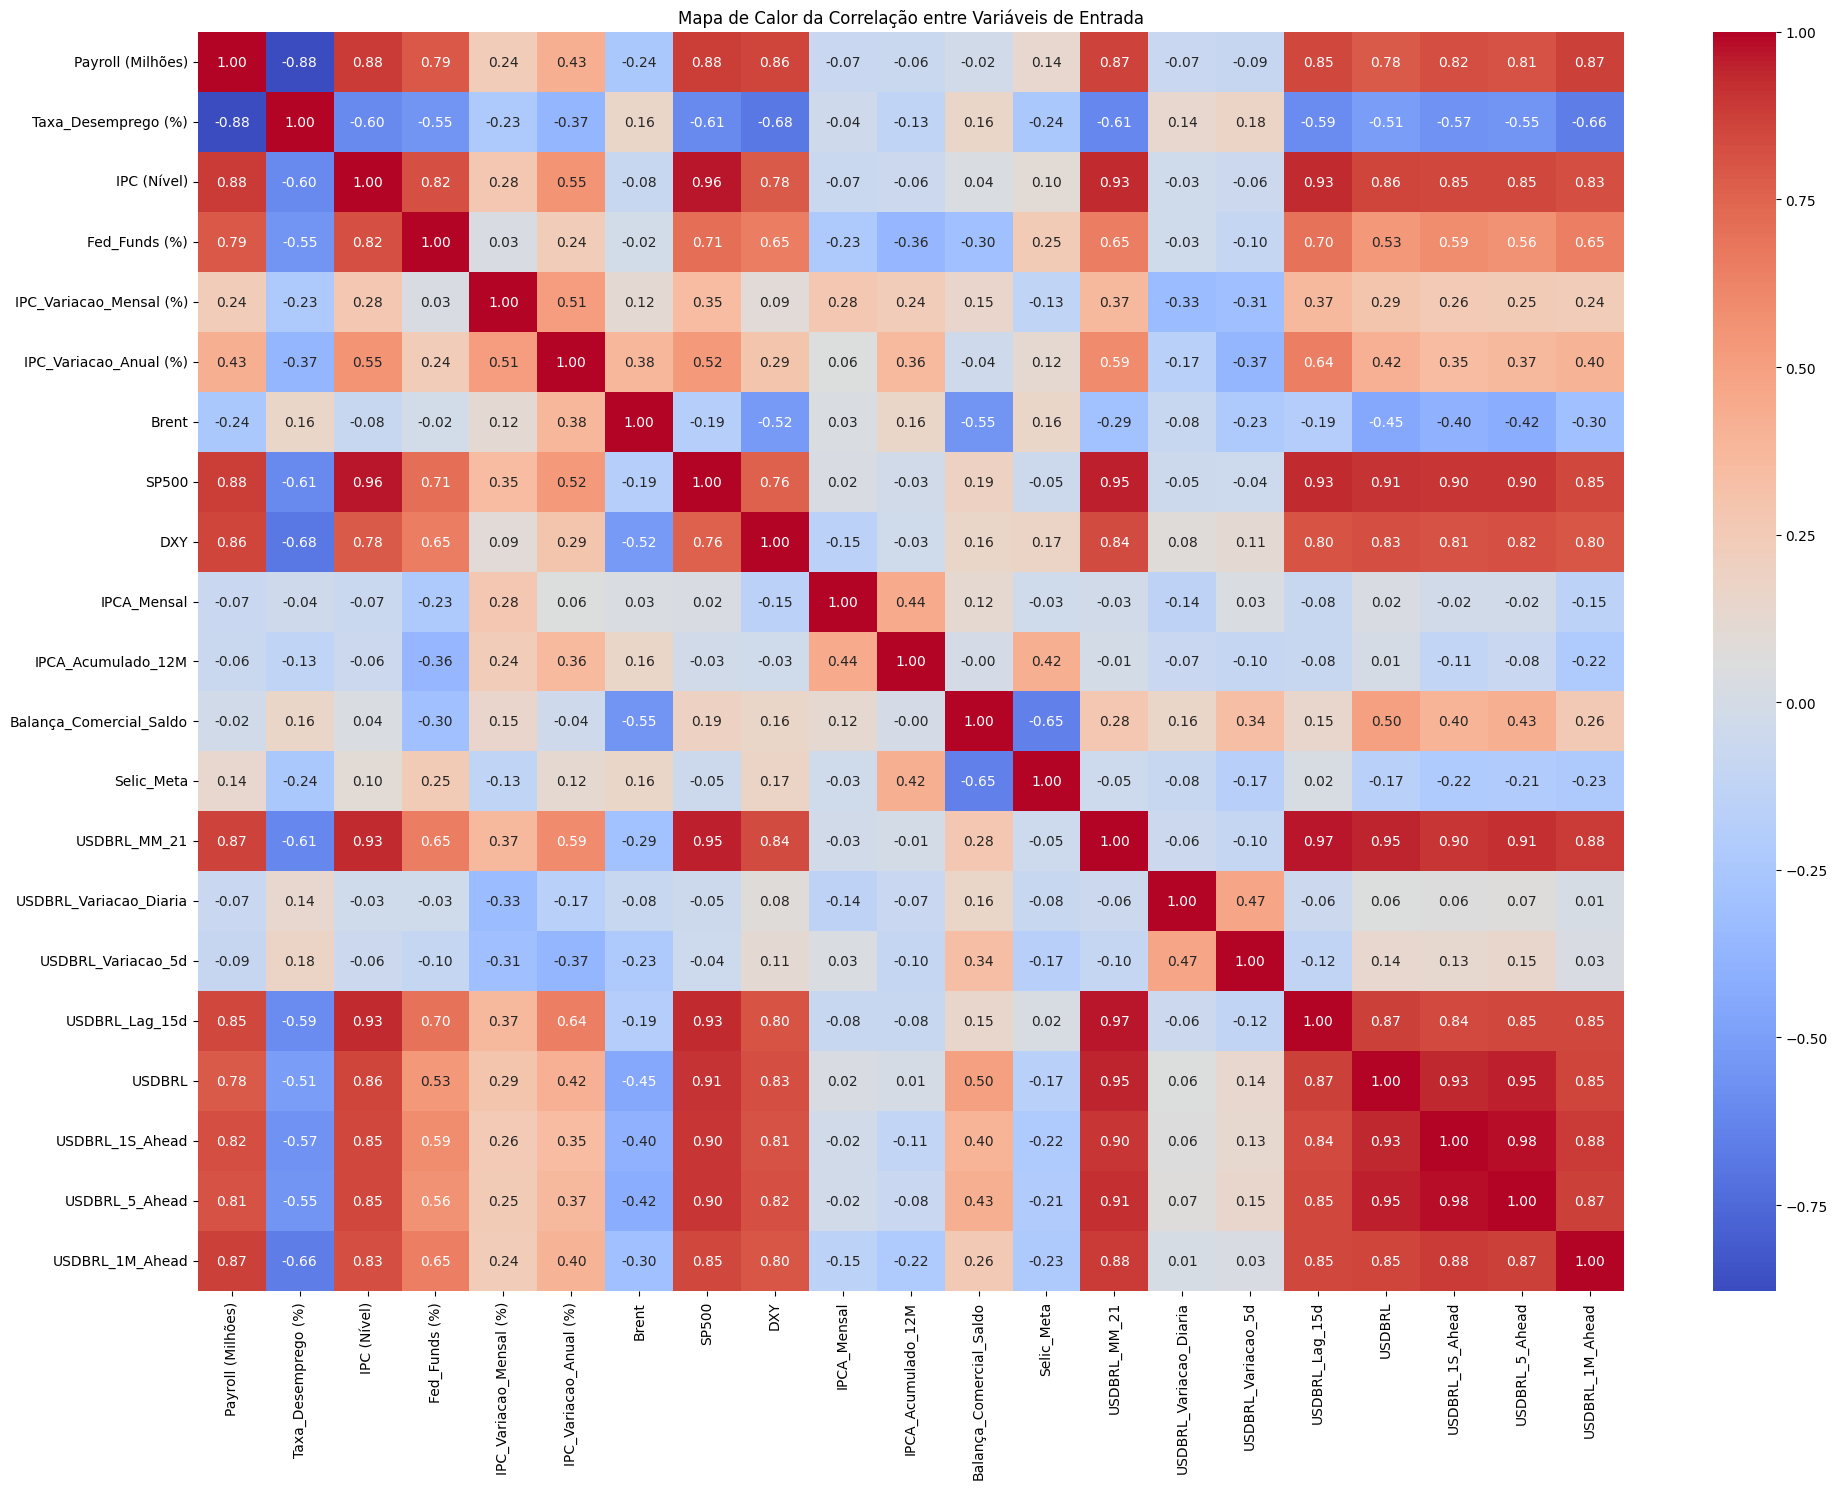

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simulação de carregamento do DataFrame (substitua pelo seu DataFrame real)
# df = pd.read_csv('seu_arquivo.csv', parse_dates=True, index_col=0)

# Supondo que o DataFrame já está carregado como df
# Exemplo de colunas selecionadas para entrada
feature_columns = ['Payroll (Milhões)', 'Taxa_Desemprego (%)',
       'IPC (Nível)', 'Fed_Funds (%)', 'IPC_Variacao_Mensal (%)',
       'IPC_Variacao_Anual (%)', 'Brent', 'SP500', 'DXY', 'IPCA_Mensal',
       'IPCA_Acumulado_12M',  'Taxa_Desemprego',
       'Balança_Comercial_Saldo', 'Selic_Meta',
       'USDBRL_MM_21', 'USDBRL_Variacao_Diaria',
       'USDBRL_Variacao_5d', 'USDBRL_Lag_15d', 'USDBRL',
       'USDBRL_1S_Ahead', 'USDBRL_5_Ahead', 'USDBRL_1M_Ahead']
target_column = 'USDBRL_5_Ahead'


# --- 1. Análise de Multicolinearidade (com todos os rótulos) ---
print("\n--- 1. Análise de Multicolinearidade ---")

# Garante que as colunas existem antes de calcular a correlação
valid_feature_columns = [col for col in feature_columns if col in df_dados.columns]

# Calcula a matriz de correlação
correlation_matrix = df_dados[valid_feature_columns].corr()

# Cria o mapa de calor (heatmap)
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Mapa de Calor da Correlação entre Variáveis de Entrada')

# --- ADICIONE ESTA LINHA ---
# Ajusta o layout para garantir que nada seja cortado
plt.tight_layout()

plt.show()

In [37]:
# Calcula a correlação de todas as colunas com a coluna alvo
corr_with_target = df_dados.corr()[target_column].abs().sort_values(ascending=False)

print(f"Correlação de cada variável com o alvo '{target_column}':")
print(corr_with_target)

Correlação de cada variável com o alvo 'USDBRL_5_Ahead':
USDBRL_5_Ahead             1.000000
USDBRL_1S_Ahead            0.978865
USDBRL                     0.951769
USDBRL_MM_21               0.913758
SP500                      0.904153
USDBRL_MM_30               0.901875
PIB (Bilhões USD) EUA      0.893710
USDBRL_1M_Ahead            0.872086
IPC (Nível)                0.850419
USDBRL_Lag_15d             0.846498
DXY                        0.820568
USDBRL_Lag_30d             0.813272
Payroll (Milhões)          0.812306
Fed_Funds (%)              0.563259
Taxa_Desemprego (%)        0.548705
PIB_Trimestral             0.504212
Balança_Comercial_Saldo    0.427128
Brent                      0.420143
IPC_Variacao_Anual (%)     0.365799
Resultado_Primario_12M     0.298020
IPC_Variacao_Mensal (%)    0.250123
Selic_Meta                 0.211465
USDBRL_Variacao_5d         0.148453
IPCA_Acumulado_12M         0.076185
USDBRL_Variacao_Diaria     0.069334
IPCA_Mensal                0.019905
Name: U

--- Puxando dados da FRED API ---

Tentando puxar: Payroll (Total Nonfarm Employment) (ID: PAYEMS)...
Dados recentes de 'Payroll (Total Nonfarm Employment)':
2025-02-01    159155.0
2025-03-01    159275.0
2025-04-01    159433.0
2025-05-01    159577.0
2025-06-01    159724.0
dtype: float64

Tentando puxar: Taxa de Desemprego (Unemployment Rate) (ID: UNRATE)...
Dados recentes de 'Taxa de Desemprego (Unemployment Rate)':
2025-02-01    4.1
2025-03-01    4.2
2025-04-01    4.2
2025-05-01    4.2
2025-06-01    4.1
dtype: float64

Tentando puxar: PIB (Gross Domestic Product) (ID: GDP)...
Dados recentes de 'PIB (Gross Domestic Product)':
2024-01-01    28624.069
2024-04-01    29016.714
2024-07-01    29374.914
2024-10-01    29723.864
2025-01-01    29962.047
dtype: float64

Tentando puxar: IPC (Consumer Price Index - All Items) (ID: CPIAUCSL)...
Dados recentes de 'IPC (Consumer Price Index - All Items)':
2025-02-01    319.775
2025-03-01    319.615
2025-04-01    320.321
2025-05-01    320.580
2025-06-0

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



--- Resumo dos Dados Puxados (DataFrame do Yahoo Finance) ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5192 entries, 2003-12-01 to 2025-07-15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USDBRL  5192 non-null   float64
 1   Brent   4434 non-null   float64
 2   SP500   5008 non-null   float64
 3   DXY     5015 non-null   float64
dtypes: float64(4)
memory usage: 202.8 KB
None

Últimas 5 linhas do DataFrame do Yahoo Finance:
            USDBRL      Brent        SP500        DXY
Date                                                 
2025-07-09  5.4461  70.190002  6263.259766  97.470001
2025-07-10  5.5818  68.639999  6280.459961  97.650002
2025-07-11  5.5311  70.360001  6259.750000  97.849998
2025-07-14  5.5719  69.209999  6268.560059  98.080002
2025-07-15  5.5563  68.959999  6243.759766  98.635002
Dados da Selic buscados com sucesso!
Dados da Selic (2016 em diante) buscados com sucesso!

--- Puxando dados do BCB 

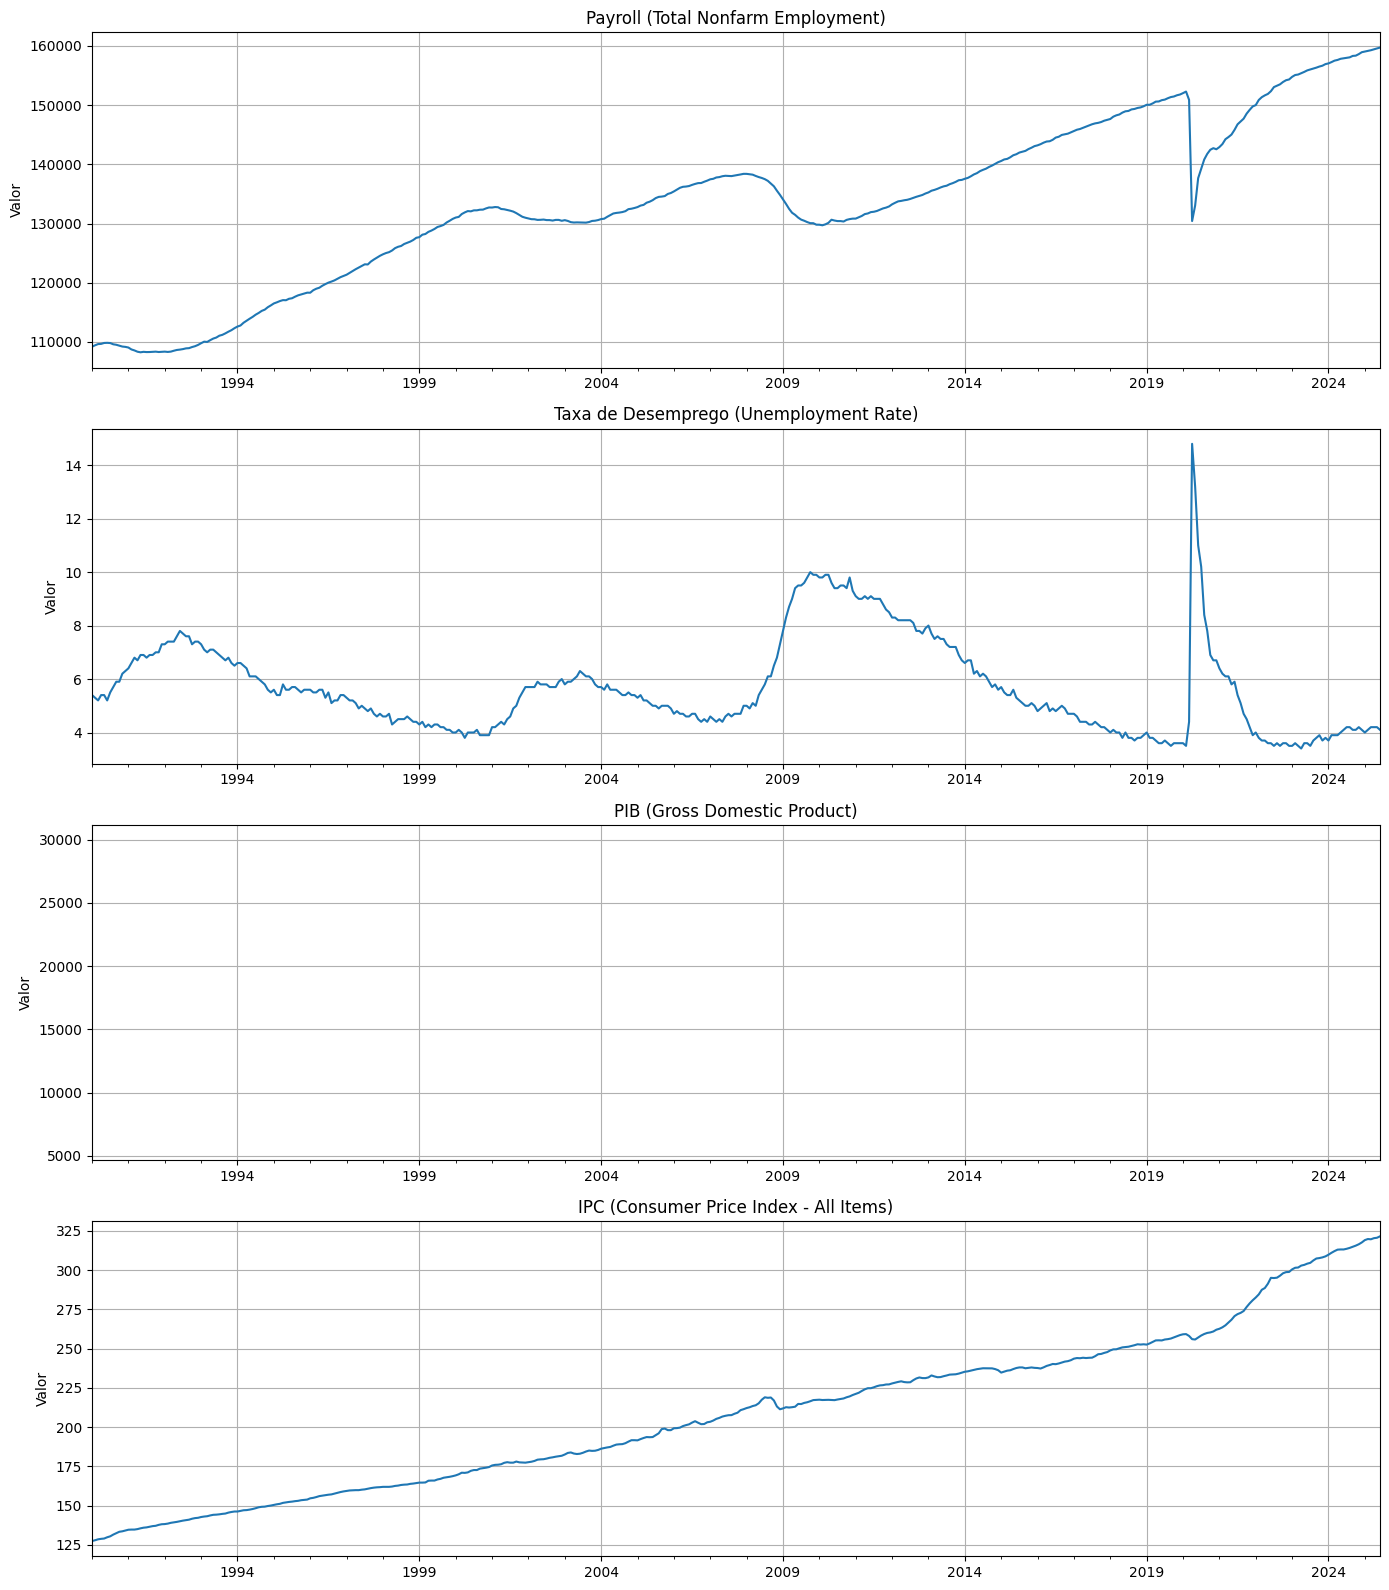

In [38]:
# prompt: gera uma página no gradio com esse gráfico de correlação heatmap desse  código:
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Simulação de carregamento do DataFrame (substitua pelo seu DataFrame real)
# # df = pd.read_csv('seu_arquivo.csv', parse_dates=True, index_col=0)
# # Supondo que o DataFrame já está carregado como df
# # Exemplo de colunas selecionadas para entrada
# feature_columns = ['Payroll (Milhões)', 'Taxa_Desemprego (%)',
#        'IPC (Nível)', 'Fed_Funds (%)', 'IPC_Variacao_Mensal (%)',
#        'IPC_Variacao_Anual (%)', 'Brent', 'SP500', 'DXY', 'IPCA_Mensal',
#        'IPCA_Acumulado_12M',  'Taxa_Desemprego',
#        'Balança_Comercial_Saldo', 'Selic_Meta',
#        'USDBRL_MM_21', 'USDBRL_Variacao_Diaria',
#        'USDBRL_Variacao_5d', 'USDBRL_Lag_15d', 'USDBRL',
#        'USDBRL_1S_Ahead', 'USDBRL_5_Ahead', 'USDBRL_1M_Ahead']
# target_column = 'USDBRL_5_Ahead'
# # --- 1. Análise de Multicolinearidade (com todos os rótulos) ---
# print("\n--- 1. Análise de Multicolinearidade ---")
# # Garante que as colunas existem antes de calcular a correlação
# valid_feature_columns = [col for col in feature_columns if col in df_dados.columns]
# # Calcula a matriz de correlação
# correlation_matrix = df_dados[valid_feature_columns].corr()
# # Cria o mapa de calor (heatmap)
# plt.figure(figsize=(20, 15))
# sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
# plt.title('Mapa de Calor da Correlação entre Variáveis de Entrada')
# # --- ADICIONE ESTA LINHA ---
# # Ajusta o layout para garantir que nada seja cortado
# plt.tight_layout()
# plt.show()

!pip install -q gradio

import gradio as gr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from fredapi import Fred
import yfinance as yf
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from bcb import sgs
import time
import plotly.express as px
import io # Import the io module

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# # **Previsão Dólar**
#
# # **Buscar dados**
# ## Dados FRED - Dados americanos
#
# --- Sua Chave de API da FRED ---
api_key = '11f79b69550ec1b66dc2d4f0ae870885'
fred = Fred(api_key=api_key)

# --- Dicionário com os IDs das séries e seus nomes amigáveis ---
series_ids = {
    'PAYEMS': 'Payroll (Total Nonfarm Employment)',
    'UNRATE': 'Taxa de Desemprego (Unemployment Rate)',
    'GDP': 'PIB (Gross Domestic Product)',
    'CPIAUCSL': 'IPC (Consumer Price Index - All Items)'
}

# --- Data de início para todas as séries (ajuste conforme necessário) ---
# Usamos 1990-01-01 como um ponto de partida razoável para a maioria.
start_date = '1990-01-01'

# --- Loop para puxar e exibir cada série ---
all_data = pd.DataFrame() # Para armazenar todos os dados em um único DataFrame

print("--- Puxando dados da FRED API ---")

for series_id, series_name in series_ids.items():
    print(f"\nTentando puxar: {series_name} (ID: {series_id})...")
    try:
        # Puxa a série
        data = fred.get_series(series_id, observation_start=start_date)

        if not data.empty:
            print(f"Dados recentes de '{series_name}':")
            print(data.tail()) # Mostra as últimas 5 observações

            # Renomeia a série para o nome amigável e adiciona ao DataFrame consolidado
            all_data[series_name] = data
        else:
            print(f"Não foram encontrados dados para '{series_name}' ou a série está vazia.")

    except Exception as e:
        print(f"Erro ao puxar '{series_name}': {e}")

# --- Exibindo um resumo do DataFrame consolidado (se houver dados) ---
if not all_data.empty:
    print("\n--- Resumo dos Dados Puxados (DataFrame Consolidado) ---")
    print(all_data.info())
    print("\nÚltimas 5 linhas do DataFrame consolidado:")
    print(all_data.tail())

    # --- Visualizar os dados (opcional, requer matplotlib) ---
    print("\n--- Gerando gráficos dos dados ---")
    fig, axes = plt.subplots(nrows=len(series_ids), ncols=1, figsize=(14, 4 * len(series_ids)))

    # Garante que 'axes' seja um array se houver apenas um subplot
    if len(series_ids) == 1:
        axes = [axes]

    for i, (series_id, series_name) in enumerate(series_ids.items()):
        if series_name in all_data.columns and not all_data[series_name].dropna().empty:
            all_data[series_name].plot(ax=axes[i], title=series_name, grid=True)
            axes[i].set_ylabel('Valor')
        else:
            axes[i].set_title(f"Dados de '{series_name}' não disponíveis para plotagem")
            axes[i].set_visible(False) # Oculta o subplot se não houver dados

    plt.tight_layout()
    #plt.show() # Avoid showing the plot here as it will be handled by Gradio
else:
    print("\nNenhum dado foi puxado com sucesso para consolidação e plotagem.")
# ### cpi, taxa de desemprego , pib,

# --- Sua Chave de API da FRED ---
# Lembre-se de manter sua chave API segura e não a compartilhar publicamente.
api_key = '11f79b69550ec1b66dc2d4f0ae870885'
fred = Fred(api_key=api_key)

# --- Definição das séries a serem puxadas e os nomes das colunas no DataFrame final ---
# Usamos nomes claros e descritivos para as colunas.
series_definitions = {
    'PAYEMS': 'Payroll (Milhões)',
    'UNRATE': 'Taxa_Desemprego (%)',
    'GDP': 'PIB (Bilhões USD) EUA',
    'CPIAUCSL': 'IPC (Nível)', # Nível base para calcular as variações
    'DFF': 'Fed_Funds (%)'
}

# --- Data de início para todas as séries ---
# Um histórico mais longo é útil para o cálculo de variações e análises de longo prazo.
start_date = '1970-01-01'

# --- DataFrame vazio para consolidar todos os dados ---
# Ele será preenchido com as séries puxadas e processadas.
consolidated_df = pd.DataFrame()

# --- Loop para puxar cada série e adicioná-la ao DataFrame consolidado ---
for series_id, col_name in series_definitions.items():
    try:
        data = fred.get_series(series_id, observation_start=start_date)

        if not data.empty:
            # Adiciona a série ao DataFrame consolidado, renomeando a coluna
            consolidated_df[col_name] = data
        else:
            print(f"Warning: No data found for '{col_name}' (ID: {series_id}).")

    except Exception as e:
        print(f"Error fetching '{col_name}' (ID: {series_id}): {e}")

# --- Processar o CPI para suas variações (se os dados de nível foram puxados com sucesso) ---
if 'IPC (Nível)' in consolidated_df.columns and not consolidated_df['IPC (Nível)'].empty:
    # Variação Mensal do IPC (%)
    # Calcula a variação percentual do mês anterior e multiplica por 100.
    consolidated_df['IPC_Variacao_Mensal (%)'] = consolidated_df['IPC (Nível)'].pct_change() * 100

    # Variação Anual do IPC (%) (ano contra ano)
    # Calcula a variação percentual em relação a 12 meses atrás e multiplica por 100.
    consolidated_df['IPC_Variacao_Anual (%)'] = consolidated_df['IPC (Nível)'].pct_change(periods=12) * 100
else:
    print("Warning: CPI level data not available, skipping CPI variation calculations.")

# --- Pós-processamento: Ordenar o DataFrame pelo índice (dates) ---
# Isso garante que as dates estejam em ordem crescente.
consolidated_df = consolidated_df.sort_index()

dados_americanos = consolidated_df.copy()
# ## Dados do dólar yahoo finance
# #### Buscando dados


# Definindo os tickers e os nomes amigáveis
tickers = {
    "USDBRL=X": "USDBRL",
    "BZ=F": "Brent",
    "^GSPC": "SP500",
    "DX-Y.NYB": "DXY"
}

# Data de início (ajuste conforme necessário)
start_date = "2000-01-01"

# DataFrame vazio para armazenar os preços de fechamento
yf_data = pd.DataFrame()

print("--- Puxando dados do Yahoo Finance ---")

for ticker, name in tickers.items():
    try:
        # Puxa os dados do ticker
        data = yf.download(ticker, start=start_date)

        # Verifica se o DataFrame de dados baixados não está vazio e contém a coluna 'Close'
        if not data.empty and 'Close' in data.columns:
            # Adiciona a coluna 'Close' ao DataFrame consolidado, renomeando a coluna
            yf_data[name] = data['Close']
        else:
            # Imprime um aviso se não encontrar dados ou a coluna 'Close'
            print(f"Warning: No data or 'Close' column found for '{name}' (Ticker: {ticker}).")

    except Exception as e:
        # Imprime um erro se houver um problema ao baixar os dados
        print(f"Error fetching data for '{name}' (Ticker: {ticker}): {e}")

# --- Pós-processamento: Ordenar o DataFrame pelo índice (dates) e remover linhas com todos os NaNs ---
# Isso garante que as dates estejam em ordem crescente e remove linhas onde nenhum ticker teve dados naquela data.
yf_data = yf_data.sort_index().dropna(how='all')

print("\n--- Resumo dos Dados Puxados (DataFrame do Yahoo Finance) ---")
print(yf_data.info())
print("\nÚltimas 5 linhas do DataFrame do Yahoo Finance:")
print(yf_data.tail())

# #### USDBRL

#yf_data['USDBRL'].plot(kind='line', figsize=(8, 4), title='USDBRL')
#plt.gca().spines[['top', 'right']].set_visible(False)
#
# #### Comparação variáveis


# Cria um MinMaxScaler
scaler = MinMaxScaler()

# Normaliza os dados (aplica a transformação em todas as colunas)
yf_data_normalized = pd.DataFrame(scaler.fit_transform(yf_data), columns=yf_data.columns, index=yf_data.index)

# Plota os dados normalizados
#plt.figure(figsize=(12, 6))
#for column in yf_data_normalized.columns:
#    plt.plot(yf_data_normalized.index, yf_data_normalized[column], label=column)

#plt.title('Séries do Yahoo Finance Normalizadas')
#plt.xlabel('Data')
#plt.ylabel('Valor Normalizado')
#plt.legend()
#plt.grid(True)
#plt.show() # Avoid showing the plot here
dados_dolar = yf_data.copy()
# ## Buscar dados econômicos Brasil
# ### Selic

while True:
    try:
        selic_meta1 = sgs.get({'Selic_Meta': 432}, start='1996-01-01' , end='2005-12-31')
        selic_meta2 = sgs.get({'Selic_Meta': 432}, start='2006-01-01' , end='2015-12-31')
        # Adicione mais chamadas sgs.get conforme necessário para cobrir o período completo
        print("Dados da Selic buscados com sucesso!")
        break # Sai do loop se a busca for bem-sucedida
    except Exception as e:
        print(f"Erro ao buscar dados da Selic: {e}. Tentando novamente em 5 segundos...")
        time.sleep(5) # Espera 5 segundos antes de tentar novamente




while True:
    try:
        selic_meta3 = sgs.get({'Selic_Meta': 432}, start='2016-01-01')
        print("Dados da Selic (2016 em diante) buscados com sucesso!")
        break # Sai do loop se a busca for bem-sucedida
    except Exception as e:
        print(f"Erro ao buscar dados da Selic (2016 em diante): {e}. Tentando novamente em 5 segundos...")
        time.sleep(5) # Espera 5 segundos antes de tentar novamente

selic_meta = pd.concat([selic_meta1, selic_meta2 , selic_meta3])




#fig = px.line(selic_meta, x=selic_meta.index, y='Selic_Meta', title='Taxa Selic Meta ao longo do tempo')
#fig.show() # Avoid showing the plot here
# ### Dados economicos brasil

# Códigos das séries do SGS para os indicadores brasileiros
# 433: Índice Nacional de Preços ao Consumidor Amplo (IPCA) - Variação Mensal
# 13522: Índice Nacional de Preços ao Consumidor Amplo (IPCA) - variação mensal acumulada 12 meses
# 732: Produto Interno Bruto (PIB) - Taxa de variação real trimestral
# 24369: Taxa de desocupação - PNAD Contínua
# 11764: Balança Comercial - Saldo (US$ milhões)
# 22147: Resultado Primário do Governo Central (saldo) - Acumulado em 12 meses

brazil_series_codes = {
    'IPCA_Mensal': 433,
    'IPCA_Acumulado_12M': 13522,
    'PIB_Trimestral': 22099 ,
    'Taxa_Desemprego': 24369,
    'Balança_Comercial_Saldo': 11764,
    'Resultado_Primario_12M': 2144
}

# Data de início para as séries do BCB (ajuste conforme necessário)
# Algumas séries podem ter dados disponíveis apenas a partir de dates mais recentes.
bcb_start_date = '2000-01-01'

# DataFrame para armazenar os dados do BCB
bcb_data = pd.DataFrame()

print("\n--- Puxando dados do BCB API (SGS) ---")

for name, code in brazil_series_codes.items():
    try:
        print(f"Tentando puxar: {name} (Código SGS: {code})...")
        data = sgs.get({name: code}, start=bcb_start_date)

        if not data.empty:
            # Renomeia a coluna para o nome amigável (sgs.get já faz isso se passarmos um dict)
            # Mas vamos garantir que o nome esteja correto
            # data = data.rename(columns={code: name}) # sgs.get já faz isso

            # Adiciona ao DataFrame consolidado
            bcb_data = pd.concat([bcb_data, data], axis=1)

            #print(f"Dados recentes de '{name}':")
            #print(data.tail()) # Mostra as últimas 5 observações
        else:
            print(f"Não foram encontrados dados para '{name}' (Código SGS: {code}) ou a série está vazia.")

    except Exception as e:
        print(f"Erro ao puxar '{name}' (Código SGS: {code}): {e}")

# --- Pós-processamento: Ordenar o DataFrame do BCB pelo índice (dates) ---
bcb_data = bcb_data.sort_index()

# --- Combinar todos os DataFrames ---
# Usamos `concat` ou `merge`. `concat` é mais simples se todos os DataFrames
# tiverem índices de data e quisermos apenas juntar as colunas.
# 'outer' join para manter todas as dates presentes em qualquer um dos DataFrames.
# O resample('M') pode ser útil para garantir que as frequências sejam compatíveis (mensal),
# mas algumas séries do BCB são trimestrais ou diárias. Vamos apenas concatenar e lidar com NaNs.




dados_brasil_mesclados = pd.merge(bcb_data, selic_meta, left_index=True, right_index=True, how='inner')

# Ordenar o DataFrame mesclado por data para garantir a ordem cronológica
dados_brasil_mesclados = dados_brasil_mesclados.sort_index()


# ## Unir todos

# Unir os 3 DataFrames: dados_americanos, dados_dolar, dados_brasil_mesclados
# Usamos pd.merge com how='outer' para manter todas as dates de todos os dataframes
# e join nos índices (que são as dates).
df_merged = pd.merge(dados_americanos, dados_dolar, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, dados_brasil_mesclados, left_index=True, right_index=True, how='outer')

# Opcional: Ordenar o DataFrame final por data
df_merged = df_merged.sort_index()


# Filtrar dados a partir do ano 2000
df_merged_filtered = df_merged[df_merged.index.year >= 2010]


df_dados = df_merged_filtered.copy()
#
# ### Feature enginering
df_dados.head(2)

# Preencher NaNs usando ffill (forward fill) e depois bfill (backward fill)
df_dados = df_dados.fillna(method='ffill').fillna(method='bfill')



# Média móvel de 21 dias
df_dados['USDBRL_MM_21'] = df_dados['USDBRL'].rolling(window=21).mean()
# Preencher NaNs para a média móvel de 21 dias
df_dados['USDBRL_MM_21'] = df_dados['USDBRL_MM_21'].fillna(method='bfill').fillna(method='ffill')

# Média móvel de 30 dias
df_dados['USDBRL_MM_30'] = df_dados['USDBRL'].rolling(window=30).mean()
# Preencher NaNs para a média móvel de 30 dias
df_dados['USDBRL_MM_30'] = df_dados['USDBRL_MM_30'].fillna(method='bfill').fillna(method='ffill')

# Variação diária do dólar
df_dados['USDBRL_Variacao_Diaria'] = df_dados['USDBRL'].pct_change() * 100
# Preencher NaNs para a variação diária
df_dados['USDBRL_Variacao_Diaria'] = df_dados['USDBRL_Variacao_Diaria'].fillna(method='bfill').fillna(method='ffill')

# Variação do dólar em 5 dias
df_dados['USDBRL_Variacao_5d'] = df_dados['USDBRL'].pct_change(periods=5) * 100
# Preencher NaNs para a variação em 5 dias
df_dados['USDBRL_Variacao_5d'] = df_dados['USDBRL_Variacao_5d'].fillna(method='bfill').fillna(method='ffill')

# Valor do dólar de 15 dias atrás
df_dados['USDBRL_Lag_15d'] = df_dados['USDBRL'].shift(periods=15)
# Preencher NaNs para o lag de 15 dias
df_dados['USDBRL_Lag_15d'] = df_dados['USDBRL_Lag_15d'].fillna(method='bfill').fillna(method='ffill')

# Valor do dólar de 30 dias atrás
df_dados['USDBRL_Lag_30d'] = df_dados['USDBRL'].shift(periods=30)
# Preencher NaNs para o lag de 30 dias
df_dados['USDBRL_Lag_30d'] = df_dados['USDBRL_Lag_30d'].fillna(method='bfill').fillna(method='ffill')

# Mover a coluna USDBRL para a última posição
usdcbrl_col = df_dados.pop('USDBRL') # Remove a coluna e a armazena
df_dados['USDBRL'] = usdcbrl_col # Adiciona a coluna de volta no final



df_dados = df_dados.iloc[:-30]


df_dados['USDBRL_1S_Ahead'] = df_dados['USDBRL'].shift(-7).fillna(method='bfill').fillna(method='ffill')

df_dados['USDBRL_5_Ahead'] = df_dados['USDBRL'].shift(-5).fillna(method='bfill').fillna(method='ffill')

df_dados['USDBRL_1M_Ahead'] = df_dados['USDBRL'].shift(-21).fillna(method='bfill').fillna(method='ffill')



# ## DataFrame base pronto


# ### Correlação

# Simulação de carregamento do DataFrame (substitua pelo seu DataFrame real)
# df = pd.read_csv('seu_arquivo.csv', parse_dates=True, index_col=0)

# Supondo que o DataFrame já está carregado como df
# Exemplo de colunas selecionadas para entrada
feature_columns = ['Payroll (Milhões)', 'Taxa_Desemprego (%)',
       'IPC (Nível)', 'Fed_Funds (%)', 'IPC_Variacao_Mensal (%)',
       'IPC_Variacao_Anual (%)', 'Brent', 'SP500', 'DXY', 'IPCA_Mensal',
       'IPCA_Acumulado_12M',  'Taxa_Desemprego',
       'Balança_Comercial_Saldo', 'Selic_Meta',
       'USDBRL_MM_21', 'USDBRL_Variacao_Diaria',
       'USDBRL_Variacao_5d', 'USDBRL_Lag_15d', 'USDBRL',
       'USDBRL_1S_Ahead', 'USDBRL_5_Ahead', 'USDBRL_1M_Ahead']
target_column = 'USDBRL_5_Ahead'


# Function to generate the heatmap plot
def generate_heatmap():
    # --- 1. Análise de Multicolinearidade (com todos os rótulos) ---
    print("\n--- 1. Análise de Multicolinearidade ---")

    # Garante que as colunas existem antes de calcular a correlação
    valid_feature_columns = [col for col in feature_columns if col in df_dados.columns]

    # Calcula a matriz de correlação
    correlation_matrix = df_dados[valid_feature_columns].corr()

    # Cria o mapa de calor (heatmap)
    plt.figure(figsize=(20, 15))
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('Mapa de Calor da Correlação entre Variáveis de Entrada')

    # Ajusta o layout para garantir que nada seja cortado
    plt.tight_layout()

    # Save the plot to a bytes buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    plt.close() # Close the figure to free memory

    return buf.getvalue()

# Calculate the correlation with the target column (optional, but included in the original code)
corr_with_target = df_dados.corr()[target_column].abs().sort_values(ascending=False)

print(f"Correlação de cada variável com o alvo '{target_column}':")
print(corr_with_target)

# Create the Gradio interface
# Use gr.Image to display the plot bytes
gr.Interface(fn=generate_heatmap, inputs=None, outputs=gr.Image(label="Correlation Heatmap", format="png")).launch()


## Inicio LSTM

In [39]:
df_dados

Payroll (Milhões)  Taxa_Desemprego (%)  PIB (Bilhões USD) EUA  \
2010-01-01           129802.0                  9.8              14764.610   
2010-01-04           129802.0                  9.8              14764.610   
2010-01-05           129802.0                  9.8              14764.610   
2010-01-06           129802.0                  9.8              14764.610   
2010-01-07           129802.0                  9.8              14764.610   
...                       ...                  ...                    ...   
2025-05-29           159577.0                  4.2              29962.047   
2025-05-30           159577.0                  4.2              29962.047   
2025-06-01           159724.0                  4.1              29962.047   
2025-06-02           159724.0                  4.1              29962.047   
2025-06-03           159724.0                  4.1              29962.047   

            IPC (Nível)  Fed_Funds (%)  IPC_Variacao_Mensal (%)  \
2010-01-01      217.488           0.05                 0.064873   
2010-01-04      217.488           0.05                 0.064873   
2010-01-05      217.488           0.05                 0.064873   
2010-01-06      217.488           0.05                 0.064873   
2010-01-07      217.488           0.05                 0.064873   
...                 ...            ...                      ...   
2025-05-29      320.580           4.33                 0.080856   
2025-05-30      320.580           4.33                 0.080856   
2025-06-01      321.500           4.33                 0.286980   
2025-06-02      321.500           4.33                 0.286980   
2025-06-03      321.500           4.33                 0.286980   

            IPC_Variacao_Anual (%)      Brent        SP500        DXY  ...  \
2010-01-01                2.621111  80.120003  1132.989990  77.529999  ...   
2010-01-04                2.621111  80.120003  1132.989990  77.529999  ...   
2010-01-05                2.621111  80.589996  1136.520020  77.620003  ...   
2010-01-06                2.621111  81.889999  1137.140015  77.489998  ...   
2010-01-07                2.621111  81.510002  1141.689941  77.910004  ...   
...                            ...        ...          ...        ...  ...   
2025-05-29                2.375934  64.150002  5912.169922  99.279999  ...   
2025-05-30                2.375934  63.900002  5911.689941  99.330002  ...   
2025-06-01                2.672683  63.900002  5911.689941  99.330002  ...   
2025-06-02                2.672683  64.629997  5935.939941  98.699997  ...   
2025-06-03                2.672683  65.629997  5970.370117  99.250000  ...   

            USDBRL_MM_21  USDBRL_MM_30  USDBRL_Variacao_Diaria  \
2010-01-01      1.774967      1.799893                0.000000   
2010-01-04      1.774967      1.799893                0.000000   
2010-01-05      1.774967      1.799893                1.047121   
2010-01-06      1.774967      1.799893               -0.316636   
2010-01-07      1.774967      1.799893                0.427370   
...                  ...           ...                     ...   
2025-05-29      5.667988      5.688148                0.909995   
2025-05-30      5.667616      5.680831               -0.414859   
2025-06-01      5.667045      5.674155                0.000000   
2025-06-02      5.669612      5.671278                0.983210   
2025-06-03      5.668950      5.669695               -0.846034   

            USDBRL_Variacao_5d  USDBRL_Lag_15d  USDBRL_Lag_30d  USDBRL  \
2010-01-01            0.756254        1.719000          1.7190  1.7190   
2010-01-04            0.756254        1.719000          1.7190  1.7190   
2010-01-05            0.756254        1.719000          1.7190  1.7370   
2010-01-06            0.756254        1.719000          1.7190  1.7315   
2010-01-07            0.756254        1.719000          1.7190  1.7389   
...                        ...             ...             ...     ...   
2025-05-29            0.779495    

### 1 rodagem

In [40]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split


In [41]:
df_dados.columns

Index(['Payroll (Milhões)', 'Taxa_Desemprego (%)', 'PIB (Bilhões USD) EUA',
       'IPC (Nível)', 'Fed_Funds (%)', 'IPC_Variacao_Mensal (%)',
       'IPC_Variacao_Anual (%)', 'Brent', 'SP500', 'DXY', 'IPCA_Mensal',
       'IPCA_Acumulado_12M', 'PIB_Trimestral', 'Taxa_Desemprego',
       'Balança_Comercial_Saldo', 'Resultado_Primario_12M', 'Selic_Meta',
       'USDBRL_MM_21', 'USDBRL_MM_30', 'USDBRL_Variacao_Diaria',
       'USDBRL_Variacao_5d', 'USDBRL_Lag_15d', 'USDBRL_Lag_30d', 'USDBRL',
       'USDBRL_1S_Ahead', 'USDBRL_5_Ahead', 'USDBRL_1M_Ahead'],
      dtype='object')

In [42]:

# Simulação de carregamento do DataFrame (substitua pelo seu DataFrame real)
# df = pd.read_csv('seu_arquivo.csv', parse_dates=True, index_col=0)

# Supondo que o DataFrame já está carregado como df
# Exemplo de colunas selecionadas para entrada
feature_columns = ['Payroll (Milhões)', 'Taxa_Desemprego (%)',
       'IPC (Nível)', 'Fed_Funds (%)', 'IPC_Variacao_Mensal (%)',
       'IPC_Variacao_Anual (%)', 'Brent', 'SP500', 'DXY', 'IPCA_Mensal',
       'IPCA_Acumulado_12M',  'Taxa_Desemprego',
       'Balança_Comercial_Saldo', 'Selic_Meta',
       'USDBRL_MM_21', 'USDBRL_Variacao_Diaria',
       'USDBRL_Variacao_5d', 'USDBRL_Lag_15d', 'USDBRL',
       ]
target_column = 'USDBRL_5_Ahead'


# Normalização
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(df_dados[feature_columns])
y_scaled = scaler_y.fit_transform(df_dados[[target_column]])




import numpy as np
def create_sequences(X, y, window_size=30):
    Xs, ys = [], []
    for i in range(window_size, len(X)):
        Xs.append(X[i-window_size:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)



# Criar sequências
window_size = 60
X_seq, y_seq = create_sequences(X_scaled, y_scaled, window_size)


# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)



# Construção do modelo LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))



model.compile(optimizer='adam', loss='mean_squared_error')


# Treinamento
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1, verbose=1)



Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - loss: 0.0370 - val_loss: 0.0251
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0049 - val_loss: 0.0164
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040 - val_loss: 0.0078
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0037 - val_loss: 0.0138
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0035 - val_loss: 0.0067
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0032 - val_loss: 0.0073
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0030 - val_loss: 0.0110
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0027 - val_loss: 0.0096
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0025 - val_loss: 0.0150
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0027 - val_loss: 0.0094
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0024 - val_loss: 0.0161
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.

In [43]:

# Avaliação
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")



26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0371
Test Loss: 0.041358351707458496


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


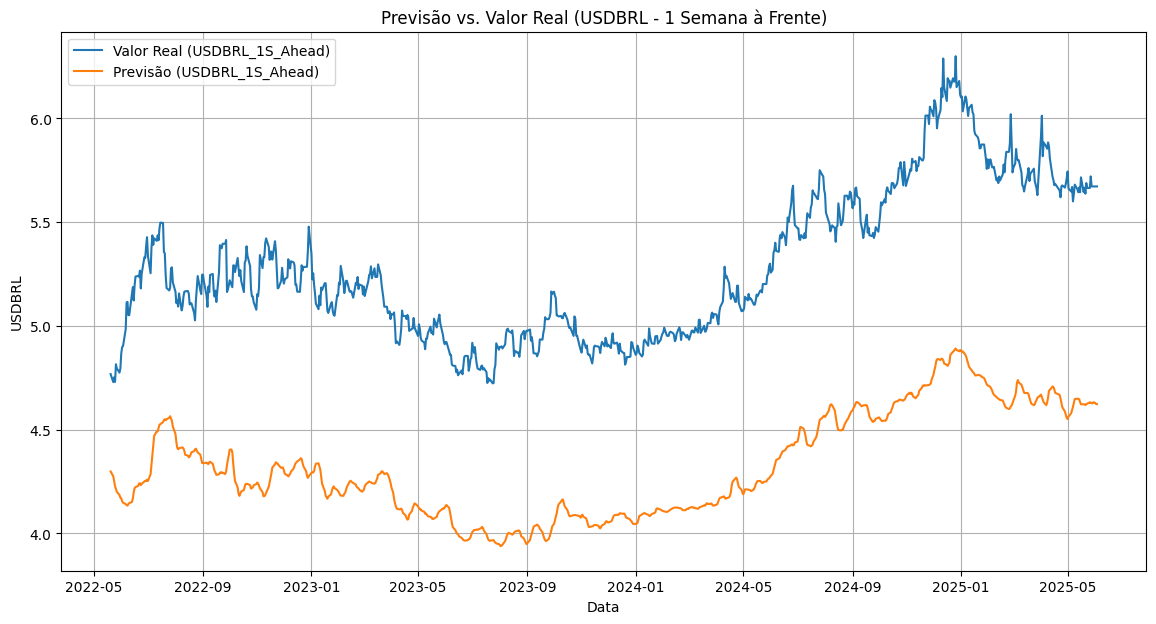

In [44]:
# prompt: faça um g´rafico com o previsto e a validação

import pandas as pd
import matplotlib.pyplot as plt
# Previsão
y_pred_scaled = model.predict(X_test)

# Inverter normalização
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test)

# Criar DataFrame para visualização
results_df = pd.DataFrame({'Actual': y_test_inv.flatten(), 'Predicted': y_pred.flatten()})

# Como o `create_sequences` remove as primeiras `window_size` observações
# e `train_test_split` com `shuffle=False` mantém a ordem,
# as datas para o conjunto de teste serão a partir do índice original + window_size + tamanho do treino.
# Vamos obter os índices de data originais correspondentes ao conjunto de teste.
# O número de linhas no conjunto de teste é len(y_test_inv).
# O número total de sequências criadas é len(y_seq).
# O índice inicial do conjunto de teste no `y_seq` é len(y_train).
# O índice inicial correspondente no DataFrame original `df_dados` é `window_size + len(y_train)`.
start_index_test_df = window_size + len(y_train)
results_df.index = df_dados.index[start_index_test_df : start_index_test_df + len(y_test_inv)]


# Plotar
plt.figure(figsize=(14, 7))
plt.plot(results_df.index, results_df['Actual'], label='Valor Real (USDBRL_1S_Ahead)')
plt.plot(results_df.index, results_df['Predicted'], label='Previsão (USDBRL_1S_Ahead)')
plt.title('Previsão vs. Valor Real (USDBRL - 1 Semana à Frente)')
plt.xlabel('Data')
plt.ylabel('USDBRL')
plt.legend()
plt.grid(True)
plt.show()

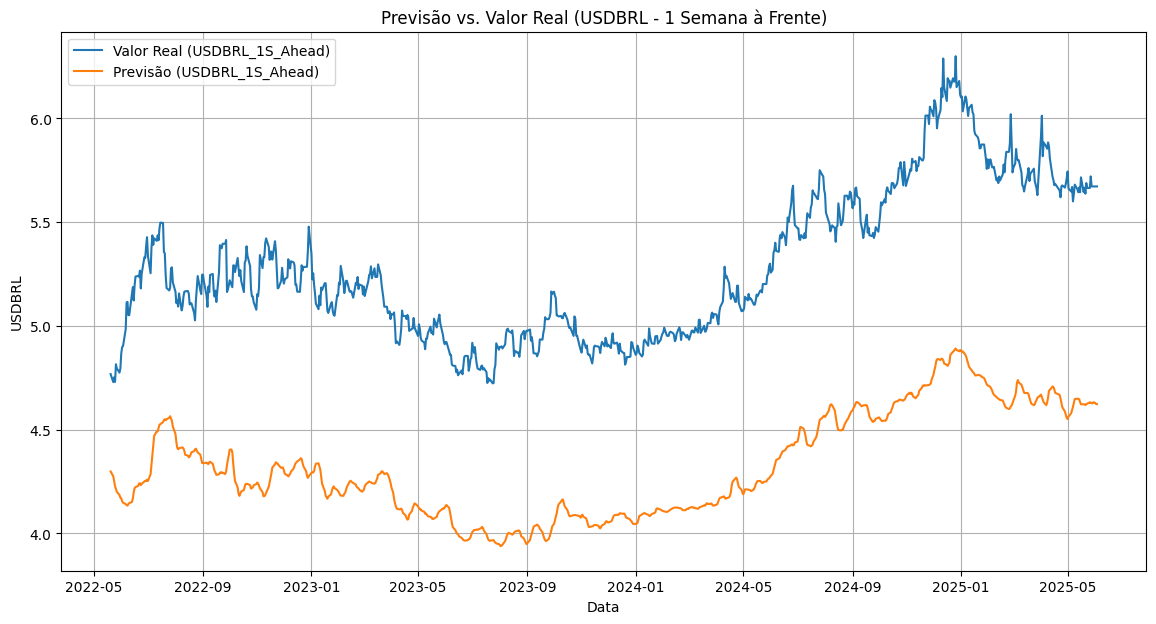

In [60]:
# prompt: consegue pegar esse ultimo grafico da linha anterior a essa e nomear de grafico 1?

import matplotlib.pyplot as plt
grafico1 = plt.figure(figsize=(14, 7))
plt.plot(results_df.index, results_df['Actual'], label='Valor Real (USDBRL_1S_Ahead)')
plt.plot(results_df.index, results_df['Predicted'], label='Previsão (USDBRL_1S_Ahead)')
plt.title('Previsão vs. Valor Real (USDBRL - 1 Semana à Frente)')
plt.xlabel('Data')
plt.ylabel('USDBRL')
plt.legend()
plt.grid(True)
plt.show()


### 2 rodagem


--- 3. Validação e Normalização dos Dados ---
Dados normalizados com sucesso.

--- 4. Criação das Sequências para o LSTM ---
Sequências criadas. X_seq shape: (4008, 60, 21), y_seq shape: (4008, 1)

--- 5. Iniciando Validação Cruzada (TimeSeriesSplit) com 4 folds ---

----- Processando Fold 1/4 -----
  Amostras de Treinamento (Fold 1): 804
  Amostras de Teste (Fold 1): 801
  Modelo LSTM construído e compilado para o Fold 1.
  Iniciando treinamento para o Fold 1 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 1 (Melhor época: 50).
  Perda no Teste (MSE) do Keras para o Fold 1 (escala normalizada): 0.0600
  Erro Absoluto Médio (MAE) no Teste para o Fold 1 (escala original): 0.8999
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 1 (escala original): 1.1616


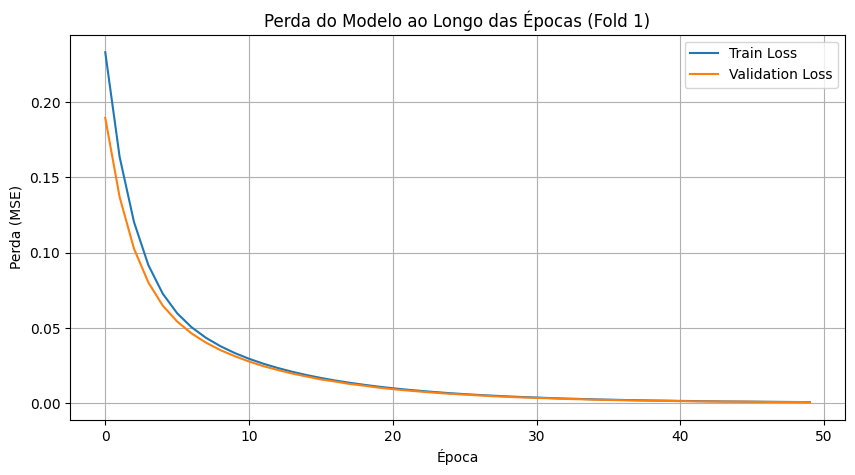

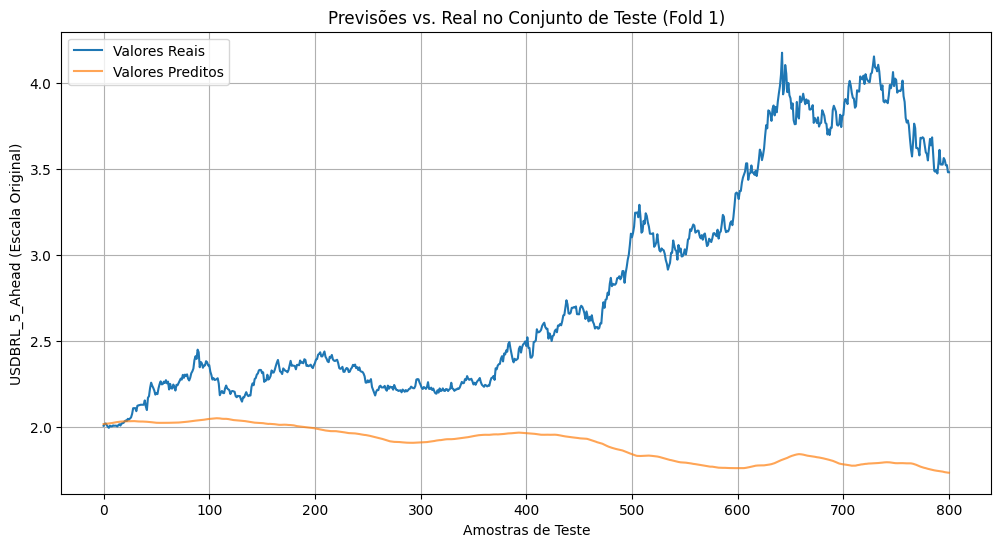


----- Processando Fold 2/4 -----
  Amostras de Treinamento (Fold 2): 1605
  Amostras de Teste (Fold 2): 801
  Modelo LSTM construído e compilado para o Fold 2.
  Iniciando treinamento para o Fold 2 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 2 (Melhor época: 48).
  Perda no Teste (MSE) do Keras para o Fold 2 (escala normalizada): 0.0049
  Erro Absoluto Médio (MAE) no Teste para o Fold 2 (escala original): 0.2725
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 2 (escala original): 0.3226


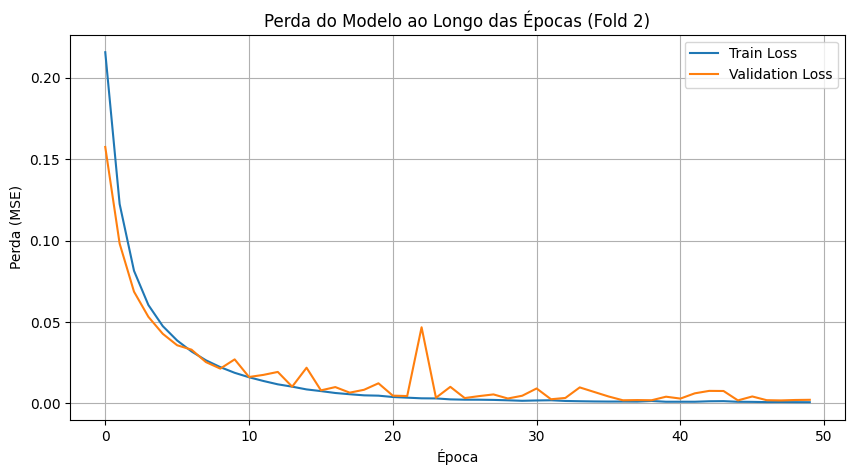

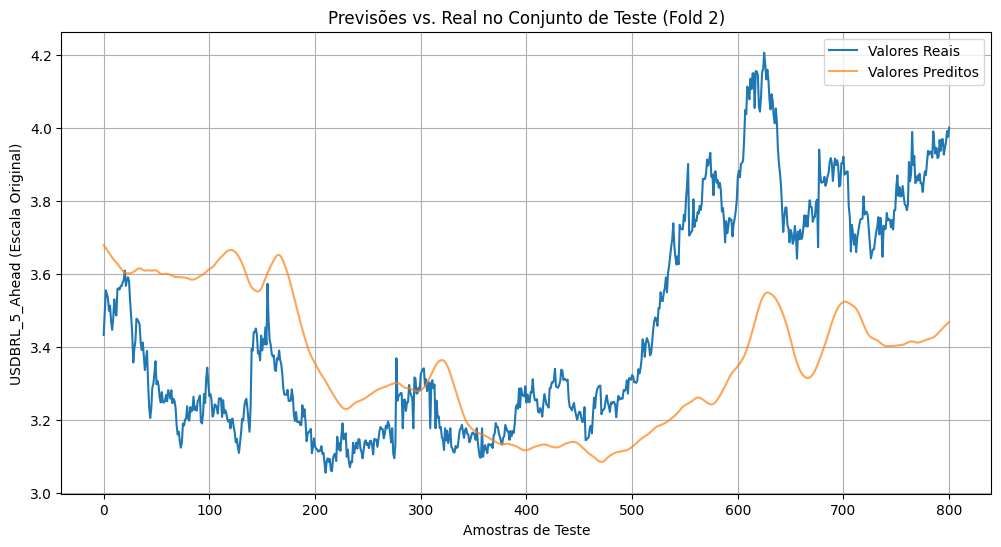


----- Processando Fold 3/4 -----
  Amostras de Treinamento (Fold 3): 2406
  Amostras de Teste (Fold 3): 801
  Modelo LSTM construído e compilado para o Fold 3.
  Iniciando treinamento para o Fold 3 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 3 (Melhor época: 49).
  Perda no Teste (MSE) do Keras para o Fold 3 (escala normalizada): 0.0260
  Erro Absoluto Médio (MAE) no Teste para o Fold 3 (escala original): 0.6178
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 3 (escala original): 0.7649


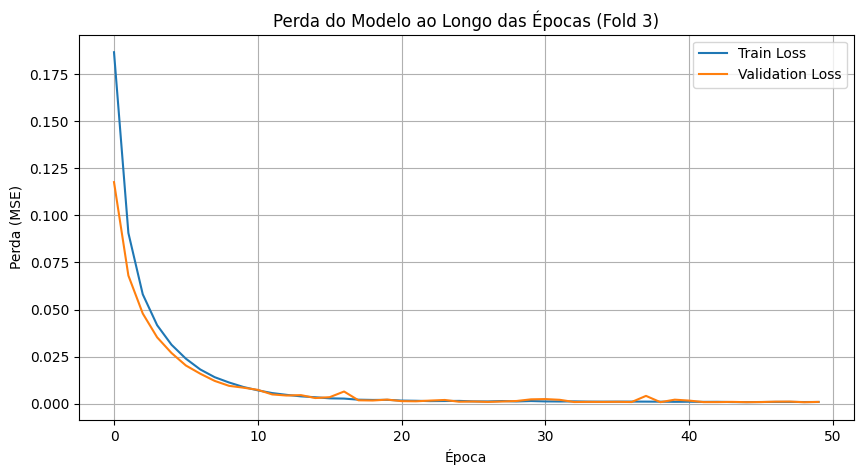

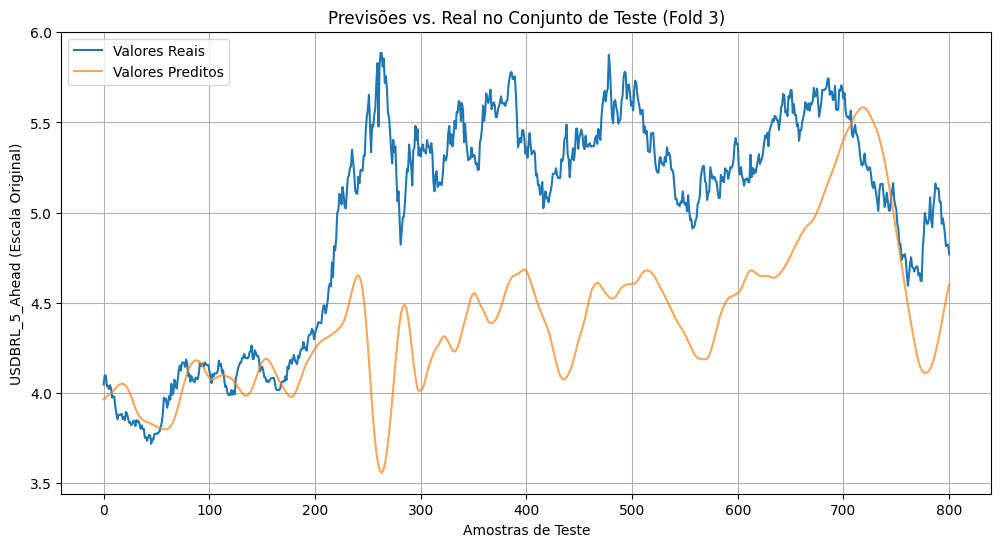


----- Processando Fold 4/4 -----
  Amostras de Treinamento (Fold 4): 3207
  Amostras de Teste (Fold 4): 801
  Modelo LSTM construído e compilado para o Fold 4.
  Iniciando treinamento para o Fold 4 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 4 (Melhor época: 44).
  Perda no Teste (MSE) do Keras para o Fold 4 (escala normalizada): 0.0146
  Erro Absoluto Médio (MAE) no Teste para o Fold 4 (escala original): 0.5517
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 4 (escala original): 0.5676


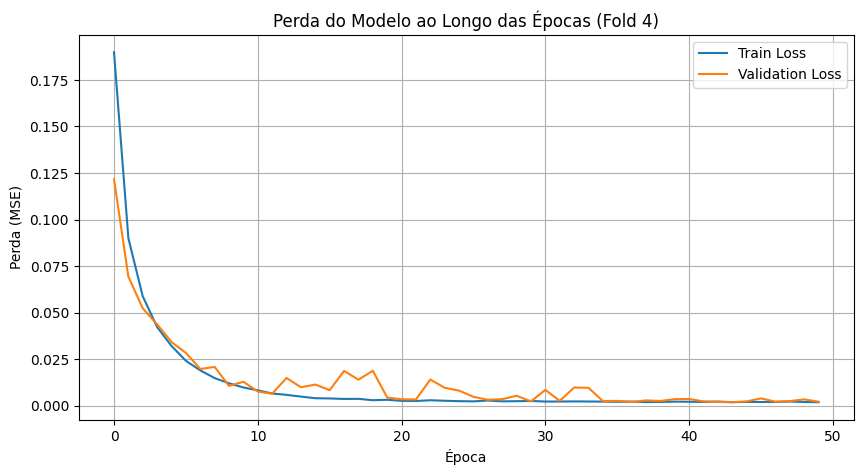

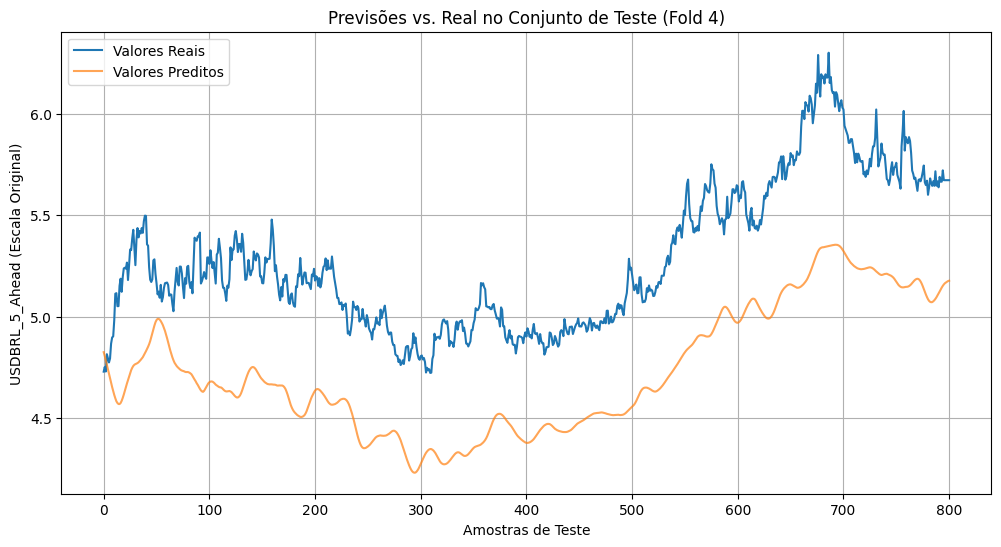


--- 11. Resultados Finais da Validação Cruzada ---
Perdas no Teste (MSE) por Fold (escala normalizada): ['0.0600', '0.0049', '0.0260', '0.0146']
Média da Perda no Teste (MSE) (escala normalizada): 0.0264
Desvio Padrão da Perda no Teste (MSE) (escala normalizada): 0.0208

Erros Absolutos


In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit # Para validação cruzada
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2 # Para regularização L2
from sklearn.metrics import mean_absolute_error, mean_squared_error # Importar métricas
import matplotlib.pyplot as plt
import tensorflow as tf
import random as python_random


# Definição das colunas de entrada e da coluna alvo
feature_columns = ['Payroll (Milhões)', 'Taxa_Desemprego (%)', 'PIB (Bilhões USD) EUA',
                   'IPC (Nível)', 'Fed_Funds (%)', 'IPC_Variacao_Mensal (%)',
                   'IPC_Variacao_Anual (%)', 'Brent', 'SP500', 'DXY', 'IPCA_Mensal',
                   'IPCA_Acumulado_12M', 'PIB_Trimestral', 'Taxa_Desemprego',
                   'Balança_Comercial_Saldo', 'Selic_Meta',
                   'USDBRL_MM_21',  'USDBRL_Variacao_Diaria',
                   'USDBRL_Variacao_5d', 'USDBRL_Lag_15d', 'USDBRL'
                  ]
target_column = 'USDBRL_5_Ahead' # A coluna que você quer prever

# --- 2. Parâmetros do Modelo e Treinamento ---
window_size = 60 # Tamanho da janela para as sequências de entrada do LSTM estavca 60
epochs_per_fold = 50 # Número de épocas de treinamento por fold da validação cruzada
batch_size = 32
l2_regularization_factor = 0.001 # Fator para a regularização L2 estava  0.001
n_splits_cv = 4 # Número de folds para a Validação Cruzada (TimeSeriesSplit)

# --- 3. Validação e Normalização dos Dados ---
print("\n--- 3. Validação e Normalização dos Dados ---")

# Verifica se as colunas de features existem no DataFrame
missing_features = [col for col in feature_columns if col not in df_dados.columns]
if missing_features:
    print(f"Aviso: Colunas de feature ausentes no DataFrame: {missing_features}. Removendo-as da lista.")
    feature_columns = [col for col in feature_columns if col in df_dados.columns]
    if not feature_columns:
        print("Erro: Nenhuma coluna de feature válida para processamento. Encerrando o script.")
        exit()

# Verifica se a coluna alvo existe
if target_column not in df_dados.columns:
    print(f"Erro: Coluna alvo '{target_column}' não encontrada no DataFrame. Encerrando o script.")
    exit()

# Inicializa e aplica os scalers para normalização (MinMaxScaler é uma boa escolha aqui)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(df_dados[feature_columns])
y_scaled = scaler_y.fit_transform(df_dados[[target_column]])
print("Dados normalizados com sucesso.")

# --- 4. Criação das Sequências para o LSTM ---
print("\n--- 4. Criação das Sequências para o LSTM ---")
Xs, ys = [], []
# Loop para criar as sequências de entrada (X) e os alvos correspondentes (y)
for i in range(window_size, len(X_scaled)):
    Xs.append(X_scaled[i-window_size:i]) # Pega os dados da janela anterior
    ys.append(y_scaled[i])              # Pega o alvo correspondente ao fim da janela
X_seq = np.array(Xs)
y_seq = np.array(ys)
print(f"Sequências criadas. X_seq shape: {X_seq.shape}, y_seq shape: {y_seq.shape}")

# --- 5. Loop de Validação Cruzada de Séries Temporais (TimeSeriesSplit) ---
print(f"\n--- 5. Iniciando Validação Cruzada (TimeSeriesSplit) com {n_splits_cv} folds ---")
tscv = TimeSeriesSplit(n_splits=n_splits_cv) # Cria o objeto de validação cruzada
all_fold_losses = [] # Lista para armazenar as perdas de teste de cada fold (MSE)
all_fold_maes = []   # Lista para armazenar o Erro Absoluto Médio de teste de cada fold

# Define os callbacks de treinamento uma vez, eles serão usados em cada fold
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# Itera sobre cada fold gerado pelo TimeSeriesSplit
for fold, (train_index, test_index) in enumerate(tscv.split(X_seq), 1):
    print(f"\n----- Processando Fold {fold}/{n_splits_cv} -----")

    # Divide os dados em treino e teste para o fold atual, respeitando a ordem temporal
    X_train_fold, X_test_fold = X_seq[train_index], X_seq[test_index]
    y_train_fold, y_test_fold = y_seq[train_index], y_seq[test_index]

    print(f"  Amostras de Treinamento (Fold {fold}): {X_train_fold.shape[0]}")
    print(f"  Amostras de Teste (Fold {fold}): {X_test_fold.shape[0]}")

    # --- 6. Construção do Modelo LSTM (Reconstruído para cada Fold) ---
    # É CRUCIAL reconstruir o modelo em cada fold para garantir que os pesos
    # sejam treinados independentemente e não haja vazamento de informações.
    model = Sequential()
    # Camada LSTM 1: 128 neurônios, retorna sequências, ativação Tanh, regularização L2
    model.add(LSTM(128, return_sequences=True, input_shape=(X_train_fold.shape[1], X_train_fold.shape[2]),
                   activation='tanh', kernel_regularizer=l2(l2_regularization_factor)))
    model.add(Dropout(0.2)) # Dropout após a primeira camada LSTM

    # Camada LSTM 2: 64 neurônios, não retorna sequências (padrão), ativação Tanh, regularização L2
    model.add(LSTM(64, activation='tanh', kernel_regularizer=l2(l2_regularization_factor)))
    model.add(Dropout(0.2)) # Dropout após a segunda camada LSTM

    # Camada Densa Intermediária: 32 neurônios, ativação Tanh, regularização L2
    model.add(Dense(32, activation='tanh', kernel_regularizer=l2(l2_regularization_factor)))
    model.add(Dropout(0.2)) # Dropout após a camada Densa intermediária

    # Camada de Saída: 1 neurônio (para regressão), ativação linear (padrão)
    model.add(Dense(1))

    # Compilação do modelo com otimizador Adam e função de perda Mean Squared Error
    model.compile(optimizer='adam', loss='mean_squared_error')
    print(f"  Modelo LSTM construído e compilado para o Fold {fold}.")
    # model.summary() # Descomente esta linha para ver o resumo da arquitetura do modelo

    # --- 7. Treinamento do Modelo para o Fold Atual ---
    print(f"  Iniciando treinamento para o Fold {fold} (Épocas: {epochs_per_fold}, Batch Size: {batch_size})...")
    history = model.fit(X_train_fold, y_train_fold,
                        epochs=epochs_per_fold,
                        batch_size=batch_size,
                        validation_split=0.1, # Usa 10% dos dados de treino do fold para validação
                        callbacks=[early_stopping, reduce_lr], # Aplica os callbacks definidos
                        verbose=0) # Define verbose=0 para não poluir o console com o treinamento de cada época

    # Encontra a melhor época com base na menor perda de validação
    best_epoch = np.argmin(history.history['val_loss']) + 1
    print(f"  Treinamento concluído para o Fold {fold} (Melhor época: {best_epoch}).")

    # --- 8. Avaliação do Modelo e Cálculo de Métricas Adicionais ---
    # Perda MSE do Keras (na escala normalizada)
    mse_loss = model.evaluate(X_test_fold, y_test_fold, verbose=0)
    all_fold_losses.append(mse_loss)
    print(f"  Perda no Teste (MSE) do Keras para o Fold {fold} (escala normalizada): {mse_loss:.4f}")

    # Fazendo previsões no conjunto de teste (ainda NORMALIZADO)
    y_pred_scaled = model.predict(X_test_fold, verbose=0)

    # Invertendo a normalização para trazer os valores para a escala original
    y_test_original = scaler_y.inverse_transform(y_test_fold)
    y_pred_original = scaler_y.inverse_transform(y_pred_scaled)

    # Calculando MAE e RMSE (na escala original, mais fácil de interpretar)
    mae = mean_absolute_error(y_test_original, y_pred_original)
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original)) # RMSE é a raiz quadrada do MSE
    all_fold_maes.append(mae)

    print(f"  Erro Absoluto Médio (MAE) no Teste para o Fold {fold} (escala original): {mae:.4f}")
    print(f"  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold {fold} (escala original): {rmse:.4f}")


    # --- 9. Visualização do Histórico de Treinamento ---
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Perda do Modelo ao Longo das Épocas (Fold {fold})')
    plt.xlabel('Época')
    plt.ylabel('Perda (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- 10. Gráfico de Previsões vs. Real (na escala original) ---
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_original, label='Valores Reais')
    plt.plot(y_pred_original, label='Valores Preditos', alpha=0.7)
    plt.title(f'Previsões vs. Real no Conjunto de Teste (Fold {fold})')
    plt.xlabel('Amostras de Teste')
    plt.ylabel(f'{target_column} (Escala Original)')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- 11. Resultados Finais da Validação Cruzada ---
print("\n--- 11. Resultados Finais da Validação Cruzada ---")
print(f"Perdas no Teste (MSE) por Fold (escala normalizada): {[f'{loss:.4f}' for loss in all_fold_losses]}")
print(f"Média da Perda no Teste (MSE) (escala normalizada): {np.mean(all_fold_losses):.4f}")
print(f"Desvio Padrão da Perda no Teste (MSE) (escala normalizada): {np.std(all_fold_losses):.4f}")

print(f"\nErros Absolutos")

### 3 rodagem


--- 3. Validação e Normalização dos Dados ---
Dados normalizados com sucesso.

--- 4. Criação das Sequências para o LSTM ---
Sequências criadas. X_seq shape: (4008, 60, 17), y_seq shape: (4008, 1)

--- 5. Iniciando Validação Cruzada (TimeSeriesSplit) com 5 folds ---

----- Processando Fold 1/5 -----
  Amostras de Treinamento (Fold 1): 668
  Amostras de Teste (Fold 1): 668
  Modelo LSTM construído e compilado para o Fold 1.
  Iniciando treinamento para o Fold 1 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 1 (Melhor época: 49).
  Perda no Teste (MSE) do Keras para o Fold 1 (escala normalizada): 0.0125
  Erro Absoluto Médio (MAE) no Teste para o Fold 1 (escala original): 0.3957
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 1 (escala original): 0.5311


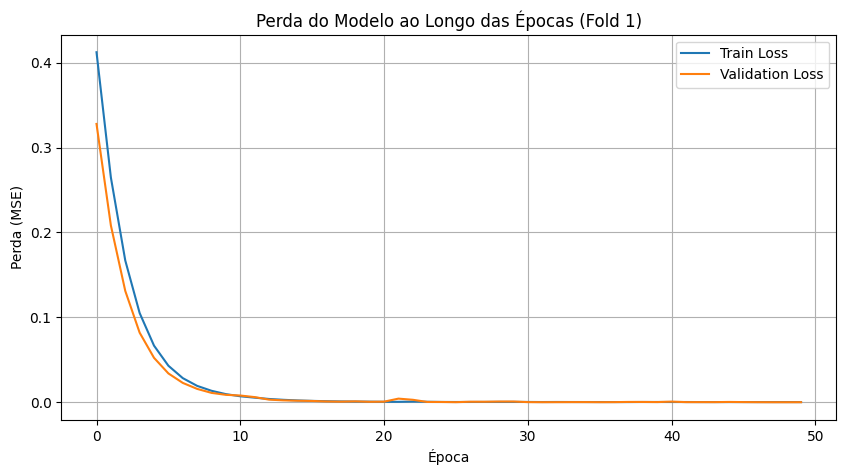

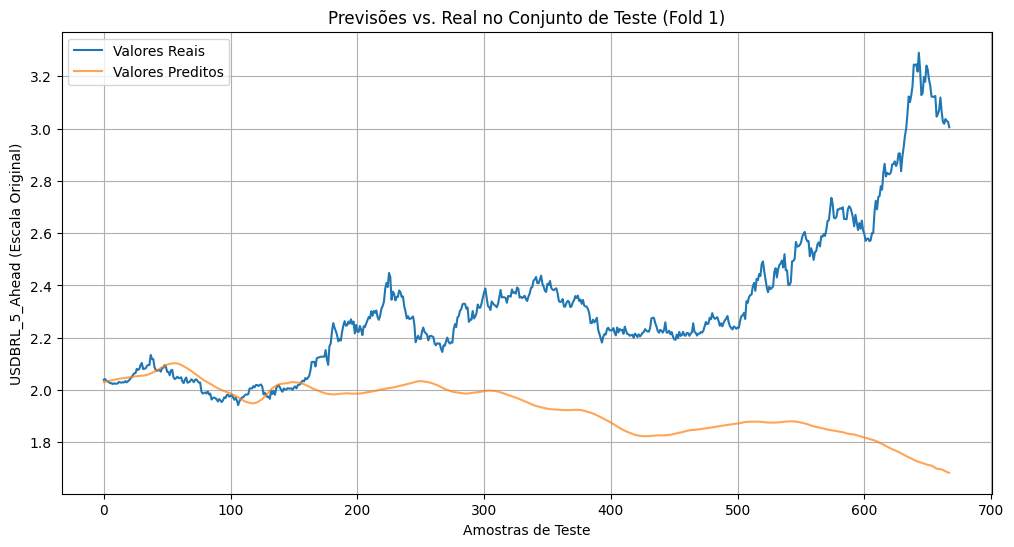


----- Processando Fold 2/5 -----
  Amostras de Treinamento (Fold 2): 1336
  Amostras de Teste (Fold 2): 668
  Modelo LSTM construído e compilado para o Fold 2.
  Iniciando treinamento para o Fold 2 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 2 (Melhor época: 11).
  Perda no Teste (MSE) do Keras para o Fold 2 (escala normalizada): 0.0407
  Erro Absoluto Médio (MAE) no Teste para o Fold 2 (escala original): 0.9204
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 2 (escala original): 0.9566


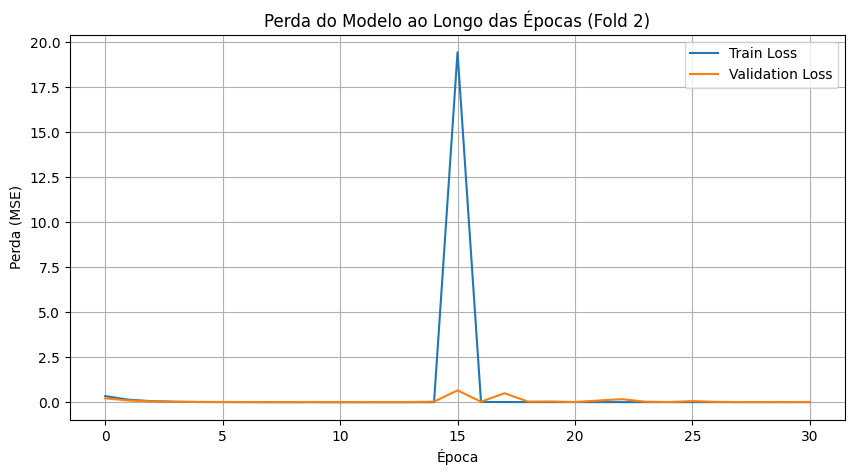

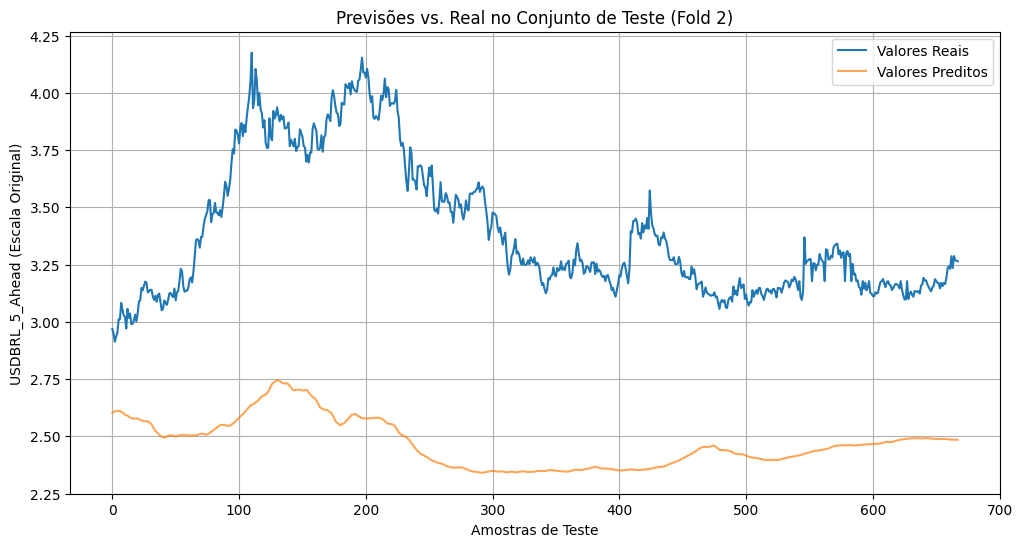


----- Processando Fold 3/5 -----
  Amostras de Treinamento (Fold 3): 2004
  Amostras de Teste (Fold 3): 668
  Modelo LSTM construído e compilado para o Fold 3.
  Iniciando treinamento para o Fold 3 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 3 (Melhor época: 18).
  Perda no Teste (MSE) do Keras para o Fold 3 (escala normalizada): 0.0456
  Erro Absoluto Médio (MAE) no Teste para o Fold 3 (escala original): 0.9277
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 3 (escala original): 1.0091


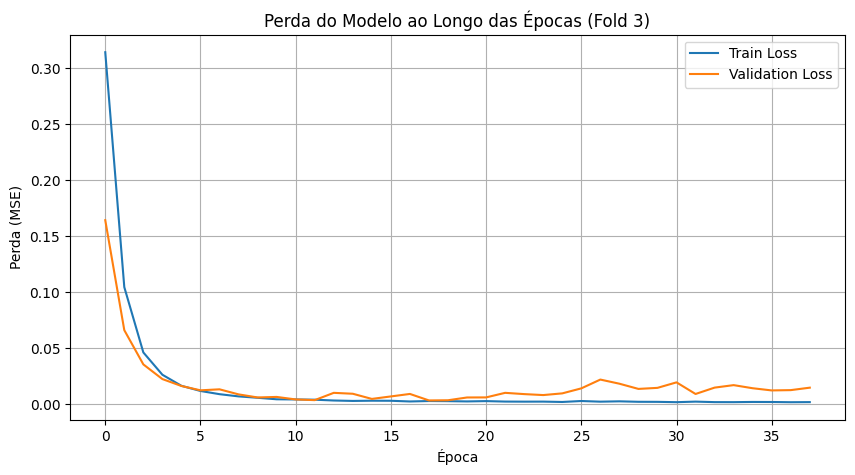

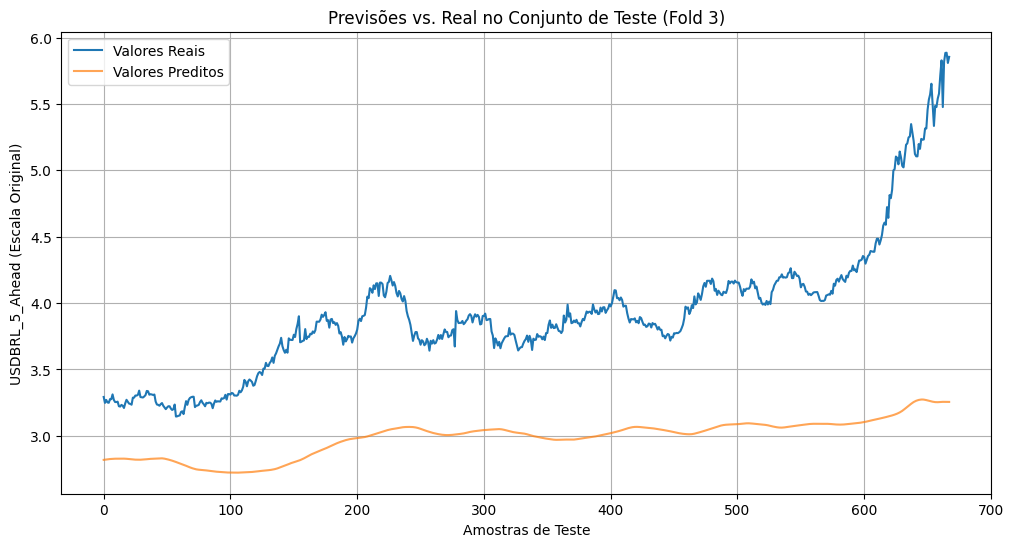


----- Processando Fold 4/5 -----
  Amostras de Treinamento (Fold 4): 2672
  Amostras de Teste (Fold 4): 668
  Modelo LSTM construído e compilado para o Fold 4.
  Iniciando treinamento para o Fold 4 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 4 (Melhor época: 19).
  Perda no Teste (MSE) do Keras para o Fold 4 (escala normalizada): 0.0855
  Erro Absoluto Médio (MAE) no Teste para o Fold 4 (escala original): 1.0438
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 4 (escala original): 1.3856


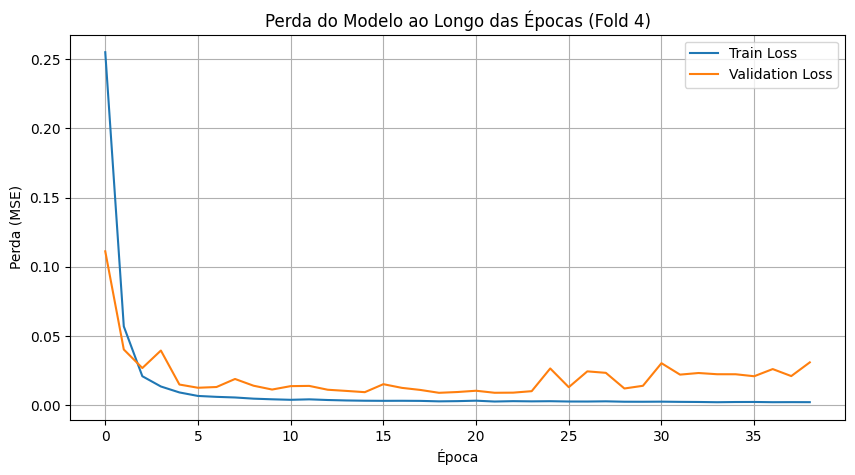

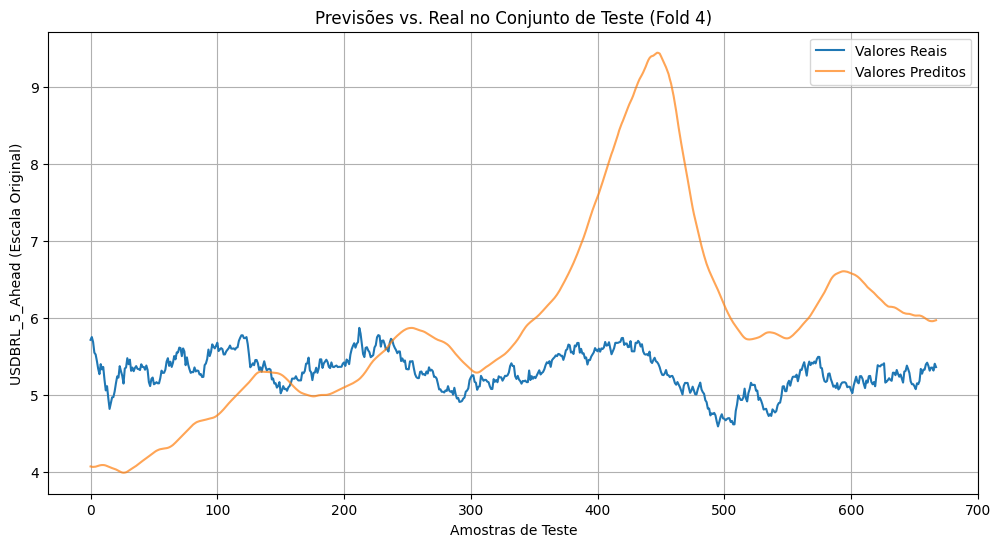


----- Processando Fold 5/5 -----
  Amostras de Treinamento (Fold 5): 3340
  Amostras de Teste (Fold 5): 668
  Modelo LSTM construído e compilado para o Fold 5.
  Iniciando treinamento para o Fold 5 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 5 (Melhor época: 27).
  Perda no Teste (MSE) do Keras para o Fold 5 (escala normalizada): 0.0323
  Erro Absoluto Médio (MAE) no Teste para o Fold 5 (escala original): 0.8296
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 5 (escala original): 0.8470


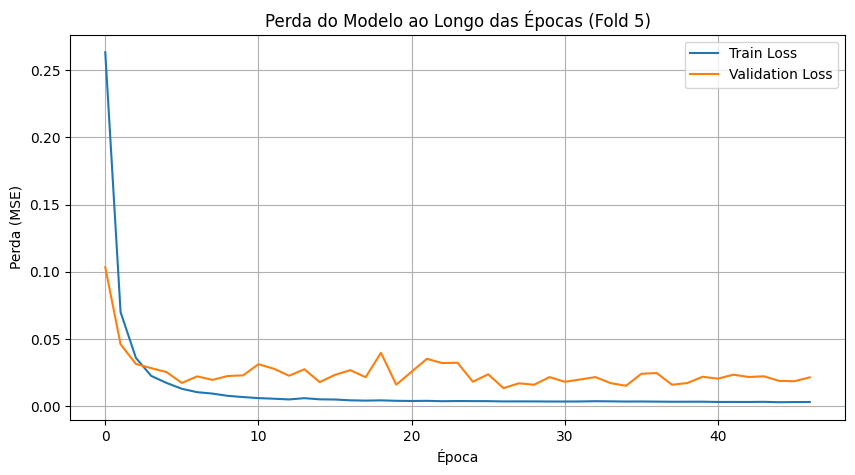

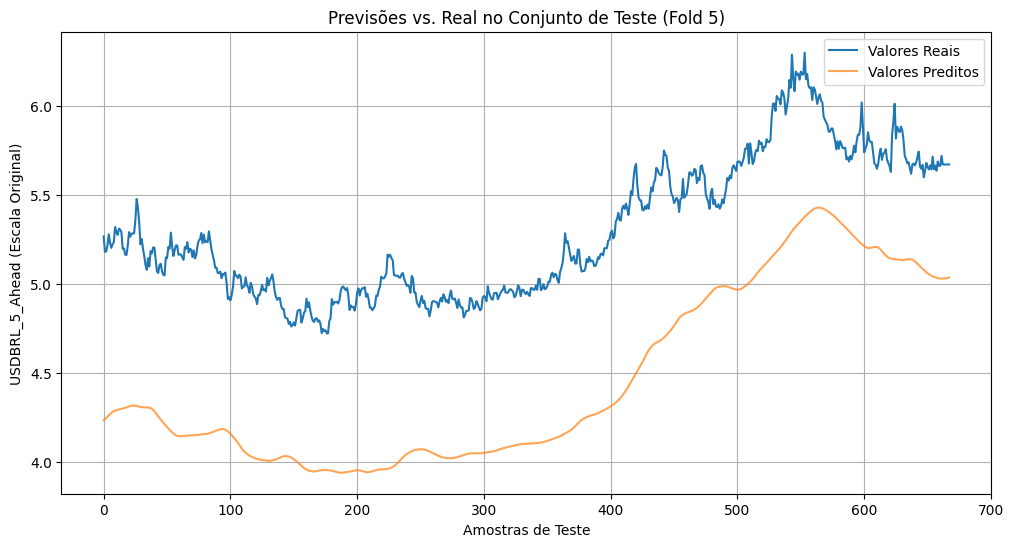


--- 11. Resultados Finais da Validação Cruzada ---
Perdas no Teste (MSE) por Fold (escala normalizada): ['0.0125', '0.0407', '0.0456', '0.0855', '0.0323']
Média da Perda no Teste (MSE) (escala normalizada): 0.0433
Desvio Padrão da Perda no Teste (MSE) (escala normalizada): 0.0239

Erros Absolutos


In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit # Para validação cruzada
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2 # Para regularização L2
from sklearn.metrics import mean_absolute_error, mean_squared_error # Importar métricas
import matplotlib.pyplot as plt
import tensorflow as tf
import random as python_random


# Definição das colunas de entrada e da coluna alvo
feature_columns = ['Payroll (Milhões)', 'Taxa_Desemprego (%)',  'Fed_Funds (%)', 'IPC_Variacao_Mensal (%)',
                    'Brent', 'SP500', 'DXY', 'IPCA_Mensal',
                   'IPCA_Acumulado_12M', 'PIB_Trimestral', 'Taxa_Desemprego',
                   'Balança_Comercial_Saldo', 'Selic_Meta',
                   'USDBRL_MM_21',
                   'USDBRL_Variacao_5d', 'USDBRL_Lag_15d', 'USDBRL'
                  ]
target_column = 'USDBRL_5_Ahead' # A coluna que você quer prever

# --- 2. Parâmetros do Modelo e Treinamento ---
window_size = 60 # Tamanho da janela para as sequências de entrada do LSTM estavca 60
epochs_per_fold = 50 # Número de épocas de treinamento por fold da validação cruzada
batch_size = 32
l2_regularization_factor = 0.002 # Fator para a regularização L2 estava  0.001
n_splits_cv = 5 # Número de folds para a Validação Cruzada (TimeSeriesSplit)

# --- 3. Validação e Normalização dos Dados ---
print("\n--- 3. Validação e Normalização dos Dados ---")

# Verifica se as colunas de features existem no DataFrame
missing_features = [col for col in feature_columns if col not in df_dados.columns]
if missing_features:
    print(f"Aviso: Colunas de feature ausentes no DataFrame: {missing_features}. Removendo-as da lista.")
    feature_columns = [col for col in feature_columns if col in df_dados.columns]
    if not feature_columns:
        print("Erro: Nenhuma coluna de feature válida para processamento. Encerrando o script.")
        exit()

# Verifica se a coluna alvo existe
if target_column not in df_dados.columns:
    print(f"Erro: Coluna alvo '{target_column}' não encontrada no DataFrame. Encerrando o script.")
    exit()

# Inicializa e aplica os scalers para normalização (MinMaxScaler é uma boa escolha aqui)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(df_dados[feature_columns])
y_scaled = scaler_y.fit_transform(df_dados[[target_column]])
print("Dados normalizados com sucesso.")

# --- 4. Criação das Sequências para o LSTM ---
print("\n--- 4. Criação das Sequências para o LSTM ---")
Xs, ys = [], []
# Loop para criar as sequências de entrada (X) e os alvos correspondentes (y)
for i in range(window_size, len(X_scaled)):
    Xs.append(X_scaled[i-window_size:i]) # Pega os dados da janela anterior
    ys.append(y_scaled[i])              # Pega o alvo correspondente ao fim da janela
X_seq = np.array(Xs)
y_seq = np.array(ys)
print(f"Sequências criadas. X_seq shape: {X_seq.shape}, y_seq shape: {y_seq.shape}")

# --- 5. Loop de Validação Cruzada de Séries Temporais (TimeSeriesSplit) ---
print(f"\n--- 5. Iniciando Validação Cruzada (TimeSeriesSplit) com {n_splits_cv} folds ---")
tscv = TimeSeriesSplit(n_splits=n_splits_cv) # Cria o objeto de validação cruzada
all_fold_losses = [] # Lista para armazenar as perdas de teste de cada fold (MSE)
all_fold_maes = []   # Lista para armazenar o Erro Absoluto Médio de teste de cada fold

# Define os callbacks de treinamento uma vez, eles serão usados em cada fold
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# Itera sobre cada fold gerado pelo TimeSeriesSplit
for fold, (train_index, test_index) in enumerate(tscv.split(X_seq), 1):
    print(f"\n----- Processando Fold {fold}/{n_splits_cv} -----")

    # Divide os dados em treino e teste para o fold atual, respeitando a ordem temporal
    X_train_fold, X_test_fold = X_seq[train_index], X_seq[test_index]
    y_train_fold, y_test_fold = y_seq[train_index], y_seq[test_index]

    print(f"  Amostras de Treinamento (Fold {fold}): {X_train_fold.shape[0]}")
    print(f"  Amostras de Teste (Fold {fold}): {X_test_fold.shape[0]}")

    # --- 6. Construção do Modelo LSTM (Reconstruído para cada Fold) ---
    # É CRUCIAL reconstruir o modelo em cada fold para garantir que os pesos
    # sejam treinados independentemente e não haja vazamento de informações.
    model = Sequential()
    # Camada LSTM 1: 128 neurônios, retorna sequências, ativação Tanh, regularização L2
    model.add(LSTM(128, return_sequences=True, input_shape=(X_train_fold.shape[1], X_train_fold.shape[2]),
                   activation='relu', kernel_regularizer=l2(l2_regularization_factor)))
    model.add(Dropout(0.2)) # Dropout após a primeira camada LSTM

    # Camada LSTM 2: 64 neurônios, não retorna sequências (padrão), ativação Tanh, regularização L2
    model.add(LSTM(64, activation='relu', kernel_regularizer=l2(l2_regularization_factor)))
    model.add(Dropout(0.2)) # Dropout após a segunda camada LSTM

    # Camada Densa Intermediária: 32 neurônios, ativação Tanh, regularização L2
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(l2_regularization_factor)))
    model.add(Dropout(0.2)) # Dropout após a camada Densa intermediária

    # Camada de Saída: 1 neurônio (para regressão), ativação linear (padrão)
    model.add(Dense(1))

    # Compilação do modelo com otimizador Adam e função de perda Mean Squared Error
    model.compile(optimizer='adam', loss='mean_squared_error')
    print(f"  Modelo LSTM construído e compilado para o Fold {fold}.")
    # model.summary() # Descomente esta linha para ver o resumo da arquitetura do modelo

    # --- 7. Treinamento do Modelo para o Fold Atual ---
    print(f"  Iniciando treinamento para o Fold {fold} (Épocas: {epochs_per_fold}, Batch Size: {batch_size})...")
    history = model.fit(X_train_fold, y_train_fold,
                        epochs=epochs_per_fold,
                        batch_size=batch_size,
                        validation_split=0.1, # Usa 10% dos dados de treino do fold para validação
                        callbacks=[early_stopping, reduce_lr], # Aplica os callbacks definidos
                        verbose=0) # Define verbose=0 para não poluir o console com o treinamento de cada época

    # Encontra a melhor época com base na menor perda de validação
    best_epoch = np.argmin(history.history['val_loss']) + 1
    print(f"  Treinamento concluído para o Fold {fold} (Melhor época: {best_epoch}).")

    # --- 8. Avaliação do Modelo e Cálculo de Métricas Adicionais ---
    # Perda MSE do Keras (na escala normalizada)
    mse_loss = model.evaluate(X_test_fold, y_test_fold, verbose=0)
    all_fold_losses.append(mse_loss)
    print(f"  Perda no Teste (MSE) do Keras para o Fold {fold} (escala normalizada): {mse_loss:.4f}")

    # Fazendo previsões no conjunto de teste (ainda NORMALIZADO)
    y_pred_scaled = model.predict(X_test_fold, verbose=0)

    # Invertendo a normalização para trazer os valores para a escala original
    y_test_original = scaler_y.inverse_transform(y_test_fold)
    y_pred_original = scaler_y.inverse_transform(y_pred_scaled)

    # Calculando MAE e RMSE (na escala original, mais fácil de interpretar)
    mae = mean_absolute_error(y_test_original, y_pred_original)
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original)) # RMSE é a raiz quadrada do MSE
    all_fold_maes.append(mae)

    print(f"  Erro Absoluto Médio (MAE) no Teste para o Fold {fold} (escala original): {mae:.4f}")
    print(f"  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold {fold} (escala original): {rmse:.4f}")


    # --- 9. Visualização do Histórico de Treinamento ---
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Perda do Modelo ao Longo das Épocas (Fold {fold})')
    plt.xlabel('Época')
    plt.ylabel('Perda (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- 10. Gráfico de Previsões vs. Real (na escala original) ---
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_original, label='Valores Reais')
    plt.plot(y_pred_original, label='Valores Preditos', alpha=0.7)
    plt.title(f'Previsões vs. Real no Conjunto de Teste (Fold {fold})')
    plt.xlabel('Amostras de Teste')
    plt.ylabel(f'{target_column} (Escala Original)')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- 11. Resultados Finais da Validação Cruzada ---
print("\n--- 11. Resultados Finais da Validação Cruzada ---")
print(f"Perdas no Teste (MSE) por Fold (escala normalizada): {[f'{loss:.4f}' for loss in all_fold_losses]}")
print(f"Média da Perda no Teste (MSE) (escala normalizada): {np.mean(all_fold_losses):.4f}")
print(f"Desvio Padrão da Perda no Teste (MSE) (escala normalizada): {np.std(all_fold_losses):.4f}")

print(f"\nErros Absolutos")

### Rodagem 4


--- 3. Validação e Normalização dos Dados ---
Dados normalizados com sucesso.

--- 4. Criação das Sequências para o LSTM ---
Sequências criadas. X_seq shape: (4008, 60, 17), y_seq shape: (4008, 1)

--- 5. Iniciando Validação Cruzada (TimeSeriesSplit) com 5 folds ---

----- Processando Fold 1/5 -----
  Amostras de Treinamento (Fold 1): 668
  Amostras de Teste (Fold 1): 668
  Modelo LSTM construído e compilado para o Fold 1.
  Iniciando treinamento para o Fold 1 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 1 (Melhor época: 1).
  Perda no Teste (MSE) do Keras para o Fold 1 (escala normalizada): 0.0069
  Erro Absoluto Médio (MAE) no Teste para o Fold 1 (escala original): 0.3071
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 1 (escala original): 0.3961


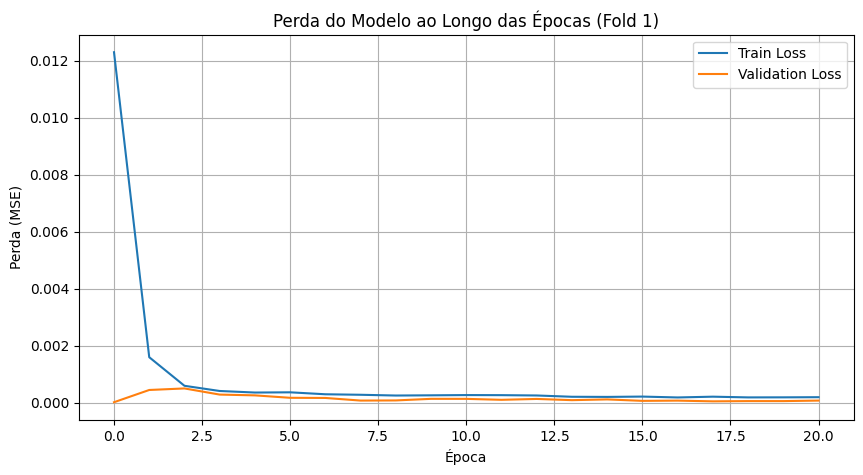

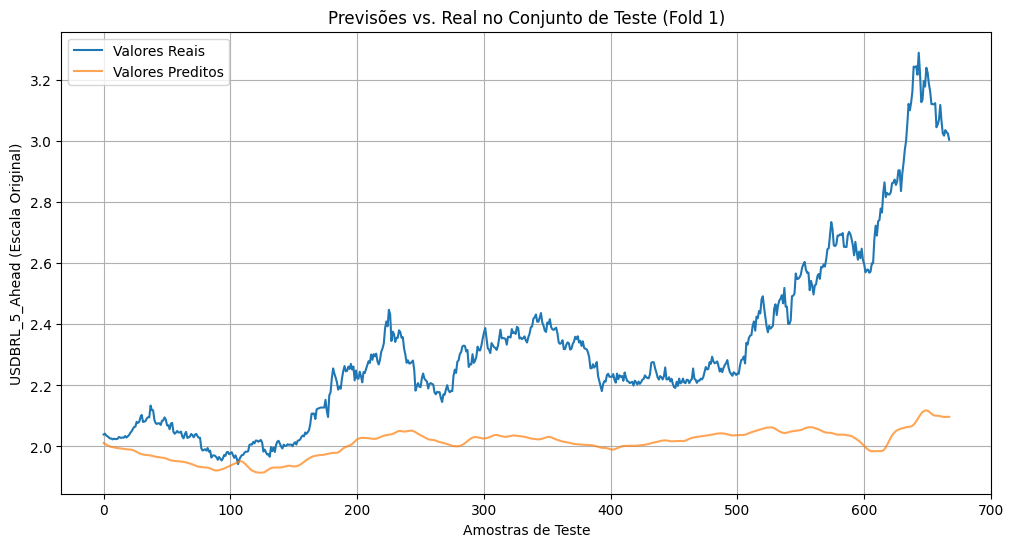


----- Processando Fold 2/5 -----
  Amostras de Treinamento (Fold 2): 1336
  Amostras de Teste (Fold 2): 668
  Modelo LSTM construído e compilado para o Fold 2.
  Iniciando treinamento para o Fold 2 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 2 (Melhor época: 48).
  Perda no Teste (MSE) do Keras para o Fold 2 (escala normalizada): 0.0217
  Erro Absoluto Médio (MAE) no Teste para o Fold 2 (escala original): 0.6865
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 2 (escala original): 0.7029


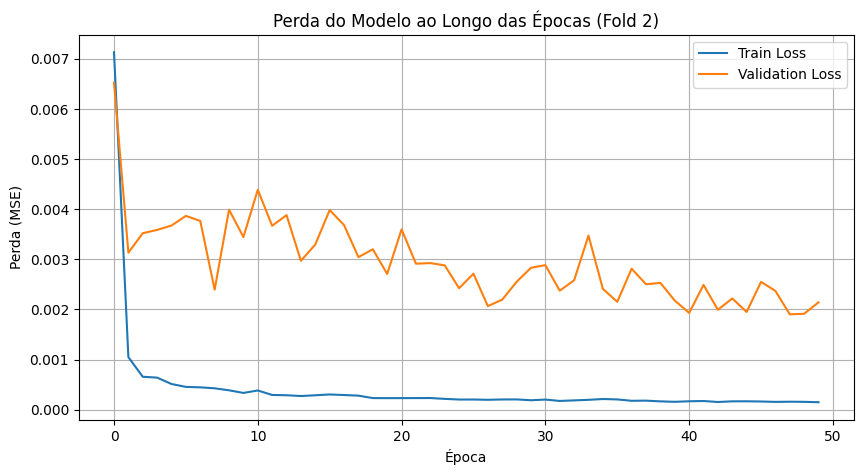

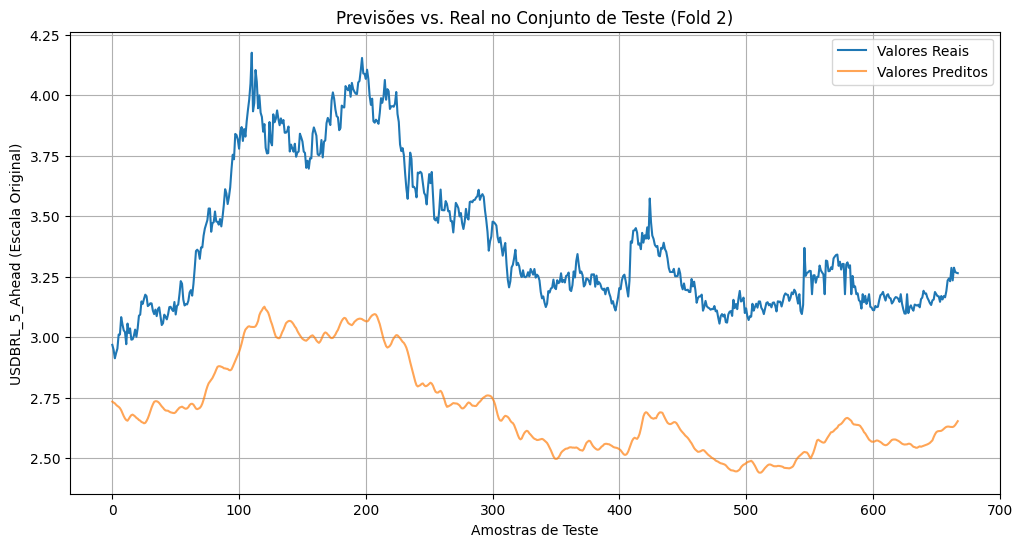


----- Processando Fold 3/5 -----
  Amostras de Treinamento (Fold 3): 2004
  Amostras de Teste (Fold 3): 668
  Modelo LSTM construído e compilado para o Fold 3.
  Iniciando treinamento para o Fold 3 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 3 (Melhor época: 32).
  Perda no Teste (MSE) do Keras para o Fold 3 (escala normalizada): 0.0080
  Erro Absoluto Médio (MAE) no Teste para o Fold 3 (escala original): 0.3667
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 3 (escala original): 0.4257


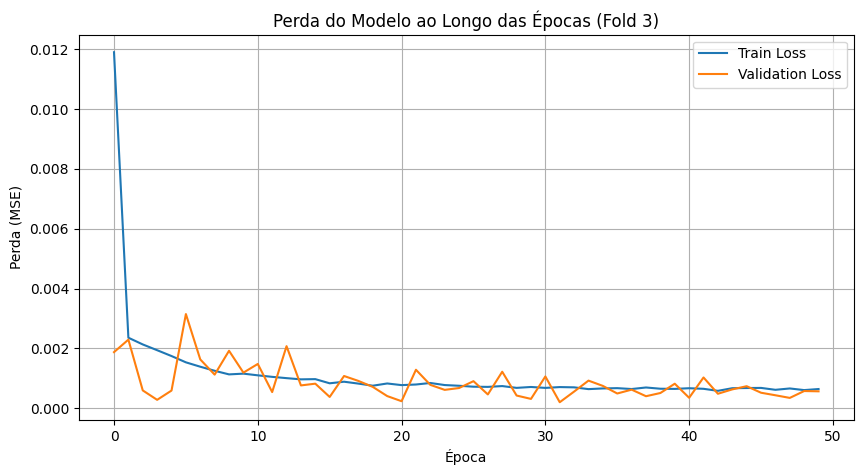

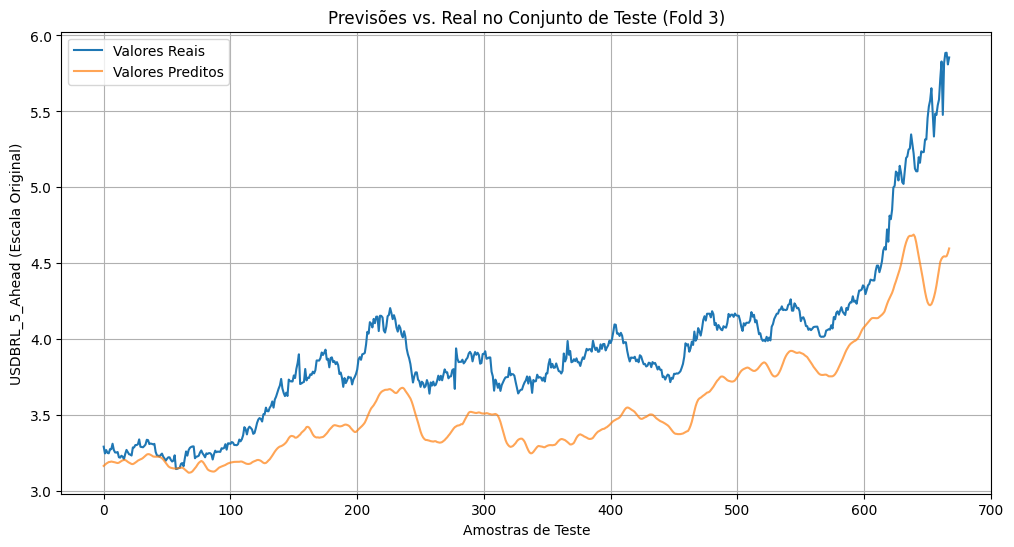


----- Processando Fold 4/5 -----
  Amostras de Treinamento (Fold 4): 2672
  Amostras de Teste (Fold 4): 668
  Modelo LSTM construído e compilado para o Fold 4.
  Iniciando treinamento para o Fold 4 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 4 (Melhor época: 17).
  Perda no Teste (MSE) do Keras para o Fold 4 (escala normalizada): 0.0073
  Erro Absoluto Médio (MAE) no Teste para o Fold 4 (escala original): 0.3279
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 4 (escala original): 0.4076


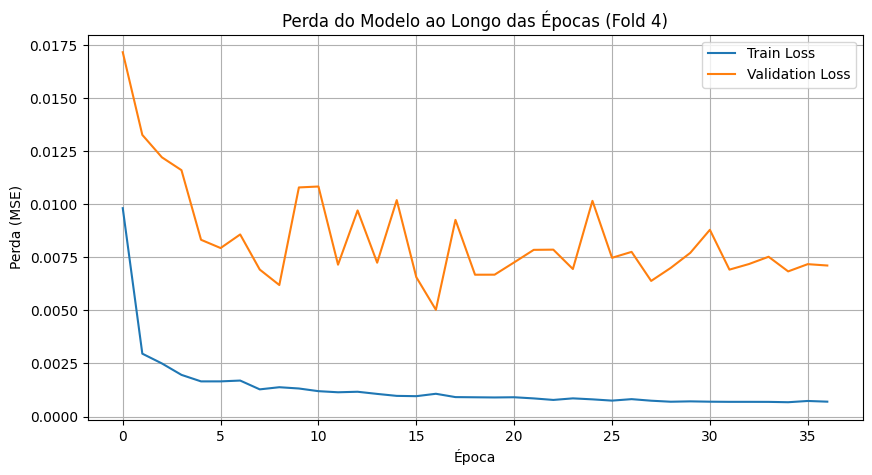

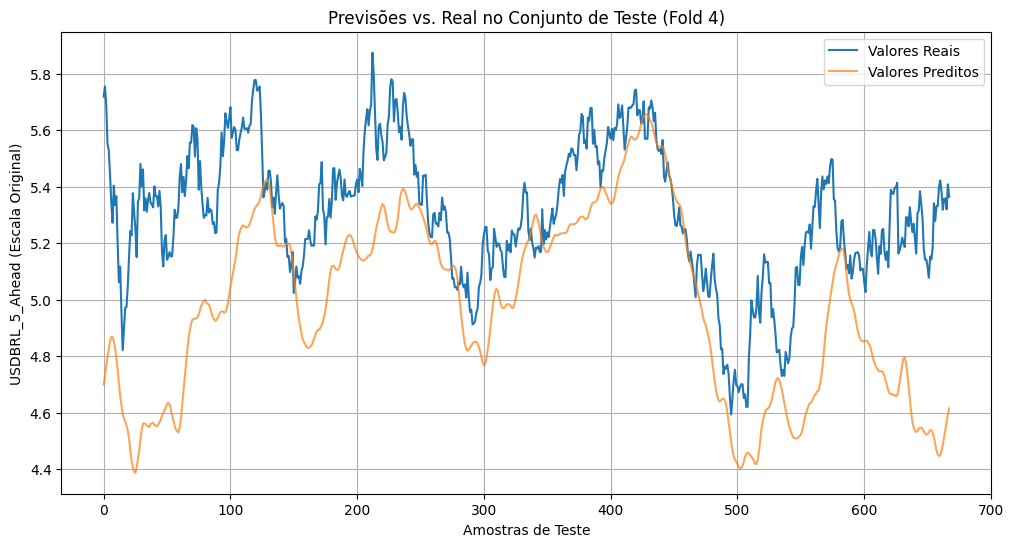


----- Processando Fold 5/5 -----
  Amostras de Treinamento (Fold 5): 3340
  Amostras de Teste (Fold 5): 668
  Modelo LSTM construído e compilado para o Fold 5.
  Iniciando treinamento para o Fold 5 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 5 (Melhor época: 4).
  Perda no Teste (MSE) do Keras para o Fold 5 (escala normalizada): 0.0444
  Erro Absoluto Médio (MAE) no Teste para o Fold 5 (escala original): 0.9980
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 5 (escala original): 1.0048


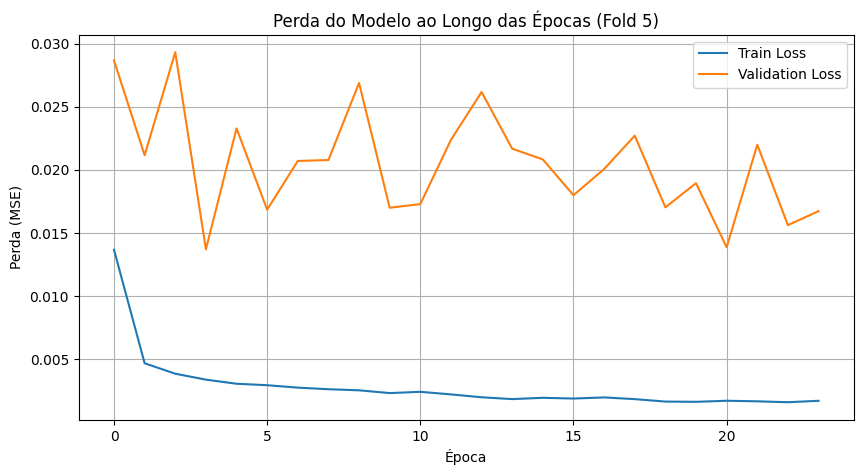

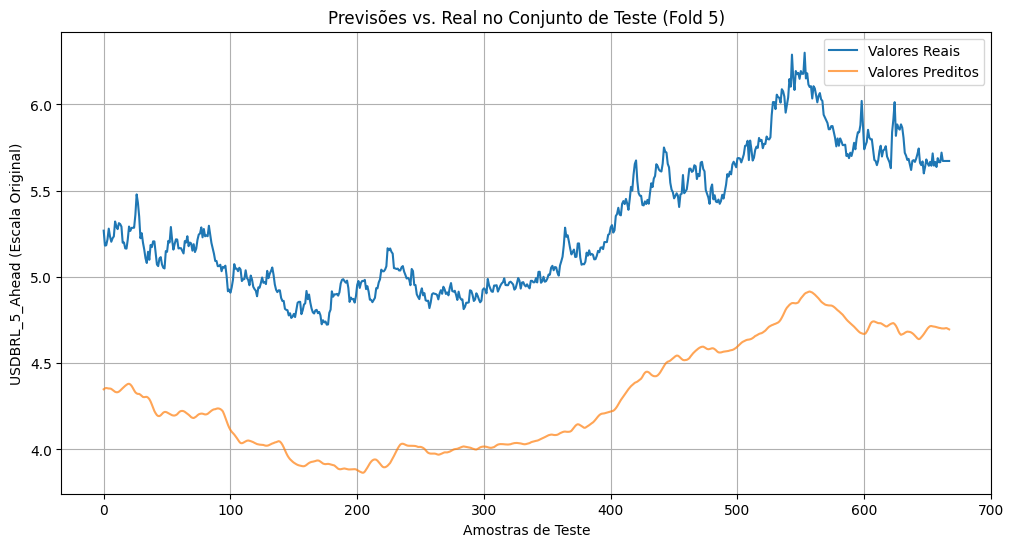


--- 11. Resultados Finais da Validação Cruzada ---
Perdas no Teste (MSE) por Fold (escala normalizada): ['0.0069', '0.0217', '0.0080', '0.0073', '0.0444']
Média da Perda no Teste (MSE) (escala normalizada): 0.0177
Desvio Padrão da Perda no Teste (MSE) (escala normalizada): 0.0145

Erros Absolutos


In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit # Para validação cruzada
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2 # Para regularização L2
from sklearn.metrics import mean_absolute_error, mean_squared_error # Importar métricas
import matplotlib.pyplot as plt
import tensorflow as tf
import random as python_random


# Definição das colunas de entrada e da coluna alvo
feature_columns = ['Payroll (Milhões)', 'Taxa_Desemprego (%)',  'Fed_Funds (%)', 'IPC_Variacao_Mensal (%)',
                    'Brent', 'SP500', 'DXY', 'IPCA_Mensal',
                   'IPCA_Acumulado_12M', 'PIB_Trimestral', 'Taxa_Desemprego',
                   'Balança_Comercial_Saldo', 'Selic_Meta',
                   'USDBRL_MM_21',
                   'USDBRL_Variacao_5d', 'USDBRL_Lag_15d', 'USDBRL'
                  ]
target_column = 'USDBRL_5_Ahead' # A coluna que você quer prever

# --- 2. Parâmetros do Modelo e Treinamento ---
window_size = 60 # Tamanho da janela para as sequências de entrada do LSTM estavca 60
epochs_per_fold = 50 # Número de épocas de treinamento por fold da validação cruzada
batch_size = 32
l2_regularization_factor = 0.001 # Fator para a regularização L2 estava  0.001
n_splits_cv = 5 # Número de folds para a Validação Cruzada (TimeSeriesSplit)

# --- 3. Validação e Normalização dos Dados ---
print("\n--- 3. Validação e Normalização dos Dados ---")

# Verifica se as colunas de features existem no DataFrame
missing_features = [col for col in feature_columns if col not in df_dados.columns]
if missing_features:
    print(f"Aviso: Colunas de feature ausentes no DataFrame: {missing_features}. Removendo-as da lista.")
    feature_columns = [col for col in feature_columns if col in df_dados.columns]
    if not feature_columns:
        print("Erro: Nenhuma coluna de feature válida para processamento. Encerrando o script.")
        exit()

# Verifica se a coluna alvo existe
if target_column not in df_dados.columns:
    print(f"Erro: Coluna alvo '{target_column}' não encontrada no DataFrame. Encerrando o script.")
    exit()

# Inicializa e aplica os scalers para normalização (MinMaxScaler é uma boa escolha aqui)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(df_dados[feature_columns])
y_scaled = scaler_y.fit_transform(df_dados[[target_column]])
print("Dados normalizados com sucesso.")

# --- 4. Criação das Sequências para o LSTM ---
print("\n--- 4. Criação das Sequências para o LSTM ---")
Xs, ys = [], []
# Loop para criar as sequências de entrada (X) e os alvos correspondentes (y)
for i in range(window_size, len(X_scaled)):
    Xs.append(X_scaled[i-window_size:i]) # Pega os dados da janela anterior
    ys.append(y_scaled[i])              # Pega o alvo correspondente ao fim da janela
X_seq = np.array(Xs)
y_seq = np.array(ys)
print(f"Sequências criadas. X_seq shape: {X_seq.shape}, y_seq shape: {y_seq.shape}")

# --- 5. Loop de Validação Cruzada de Séries Temporais (TimeSeriesSplit) ---
print(f"\n--- 5. Iniciando Validação Cruzada (TimeSeriesSplit) com {n_splits_cv} folds ---")
tscv = TimeSeriesSplit(n_splits=n_splits_cv) # Cria o objeto de validação cruzada
all_fold_losses = [] # Lista para armazenar as perdas de teste de cada fold (MSE)
all_fold_maes = []   # Lista para armazenar o Erro Absoluto Médio de teste de cada fold

# Define os callbacks de treinamento uma vez, eles serão usados em cada fold
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# Itera sobre cada fold gerado pelo TimeSeriesSplit
for fold, (train_index, test_index) in enumerate(tscv.split(X_seq), 1):
    print(f"\n----- Processando Fold {fold}/{n_splits_cv} -----")

    # Divide os dados em treino e teste para o fold atual, respeitando a ordem temporal
    X_train_fold, X_test_fold = X_seq[train_index], X_seq[test_index]
    y_train_fold, y_test_fold = y_seq[train_index], y_seq[test_index]

    print(f"  Amostras de Treinamento (Fold {fold}): {X_train_fold.shape[0]}")
    print(f"  Amostras de Teste (Fold {fold}): {X_test_fold.shape[0]}")

    # --- 6. Construção do Modelo LSTM (Reconstruído para cada Fold) ---
    # É CRUCIAL reconstruir o modelo em cada fold para garantir que os pesos
    # sejam treinados independentemente e não haja vazamento de informações.
    model = Sequential()
    # Camada LSTM 1: 128 neurônios, retorna sequências, ativação Tanh, regularização L2
    model.add(LSTM(128, return_sequences=True, input_shape=(X_train_fold.shape[1], X_train_fold.shape[2]),
                   activation='tanh'))
    model.add(Dropout(0.2)) # Dropout após a primeira camada LSTM

    # Camada LSTM 2: 64 neurônios, não retorna sequências (padrão), ativação Tanh, regularização L2
    model.add(LSTM(64, activation='tanh'))
    model.add(Dropout(0.2)) # Dropout após a segunda camada LSTM

    # Camada Densa Intermediária: 32 neurônios, ativação Tanh, regularização L2
    model.add(Dense(32, activation='tanh'))
    model.add(Dropout(0.2)) # Dropout após a camada Densa intermediária

    # Camada de Saída: 1 neurônio (para regressão), ativação linear (padrão)
    model.add(Dense(1))

    # Compilação do modelo com otimizador Adam e função de perda Mean Squared Error
    model.compile(optimizer='adam', loss='mean_squared_error')
    print(f"  Modelo LSTM construído e compilado para o Fold {fold}.")
    # model.summary() # Descomente esta linha para ver o resumo da arquitetura do modelo

    # --- 7. Treinamento do Modelo para o Fold Atual ---
    print(f"  Iniciando treinamento para o Fold {fold} (Épocas: {epochs_per_fold}, Batch Size: {batch_size})...")
    history = model.fit(X_train_fold, y_train_fold,
                        epochs=epochs_per_fold,
                        batch_size=batch_size,
                        validation_split=0.1, # Usa 10% dos dados de treino do fold para validação
                        callbacks=[early_stopping, reduce_lr], # Aplica os callbacks definidos
                        verbose=0) # Define verbose=0 para não poluir o console com o treinamento de cada época

    # Encontra a melhor época com base na menor perda de validação
    best_epoch = np.argmin(history.history['val_loss']) + 1
    print(f"  Treinamento concluído para o Fold {fold} (Melhor época: {best_epoch}).")

    # --- 8. Avaliação do Modelo e Cálculo de Métricas Adicionais ---
    # Perda MSE do Keras (na escala normalizada)
    mse_loss = model.evaluate(X_test_fold, y_test_fold, verbose=0)
    all_fold_losses.append(mse_loss)
    print(f"  Perda no Teste (MSE) do Keras para o Fold {fold} (escala normalizada): {mse_loss:.4f}")

    # Fazendo previsões no conjunto de teste (ainda NORMALIZADO)
    y_pred_scaled = model.predict(X_test_fold, verbose=0)

    # Invertendo a normalização para trazer os valores para a escala original
    y_test_original = scaler_y.inverse_transform(y_test_fold)
    y_pred_original = scaler_y.inverse_transform(y_pred_scaled)

    # Calculando MAE e RMSE (na escala original, mais fácil de interpretar)
    mae = mean_absolute_error(y_test_original, y_pred_original)
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original)) # RMSE é a raiz quadrada do MSE
    all_fold_maes.append(mae)

    print(f"  Erro Absoluto Médio (MAE) no Teste para o Fold {fold} (escala original): {mae:.4f}")
    print(f"  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold {fold} (escala original): {rmse:.4f}")


    # --- 9. Visualização do Histórico de Treinamento ---
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Perda do Modelo ao Longo das Épocas (Fold {fold})')
    plt.xlabel('Época')
    plt.ylabel('Perda (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- 10. Gráfico de Previsões vs. Real (na escala original) ---
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_original, label='Valores Reais')
    plt.plot(y_pred_original, label='Valores Preditos', alpha=0.7)
    plt.title(f'Previsões vs. Real no Conjunto de Teste (Fold {fold})')
    plt.xlabel('Amostras de Teste')
    plt.ylabel(f'{target_column} (Escala Original)')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- 11. Resultados Finais da Validação Cruzada ---
print("\n--- 11. Resultados Finais da Validação Cruzada ---")
print(f"Perdas no Teste (MSE) por Fold (escala normalizada): {[f'{loss:.4f}' for loss in all_fold_losses]}")
print(f"Média da Perda no Teste (MSE) (escala normalizada): {np.mean(all_fold_losses):.4f}")
print(f"Desvio Padrão da Perda no Teste (MSE) (escala normalizada): {np.std(all_fold_losses):.4f}")

print(f"\nErros Absolutos")



### Rodagem 5



--- 3. Validação e Normalização dos Dados ---
Dados normalizados com sucesso.

--- 4. Criação das Sequências para o LSTM ---
Sequências criadas. X_seq shape: (4008, 60, 4), y_seq shape: (4008, 1)

--- 5. Iniciando Validação Cruzada (TimeSeriesSplit) com 5 folds ---

----- Processando Fold 1/5 -----
  Amostras de Treinamento (Fold 1): 668
  Amostras de Teste (Fold 1): 668
  Modelo LSTM construído e compilado para o Fold 1.
  Iniciando treinamento para o Fold 1 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 1 (Melhor época: 6).
  Perda no Teste (MSE) do Keras para o Fold 1 (escala normalizada): 0.0003
  Erro Absoluto Médio (MAE) no Teste para o Fold 1 (escala original): 0.0531
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 1 (escala original): 0.0772


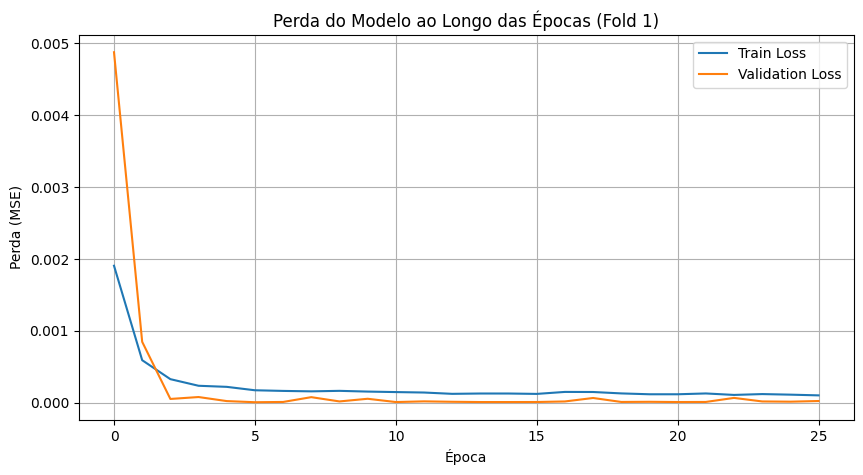

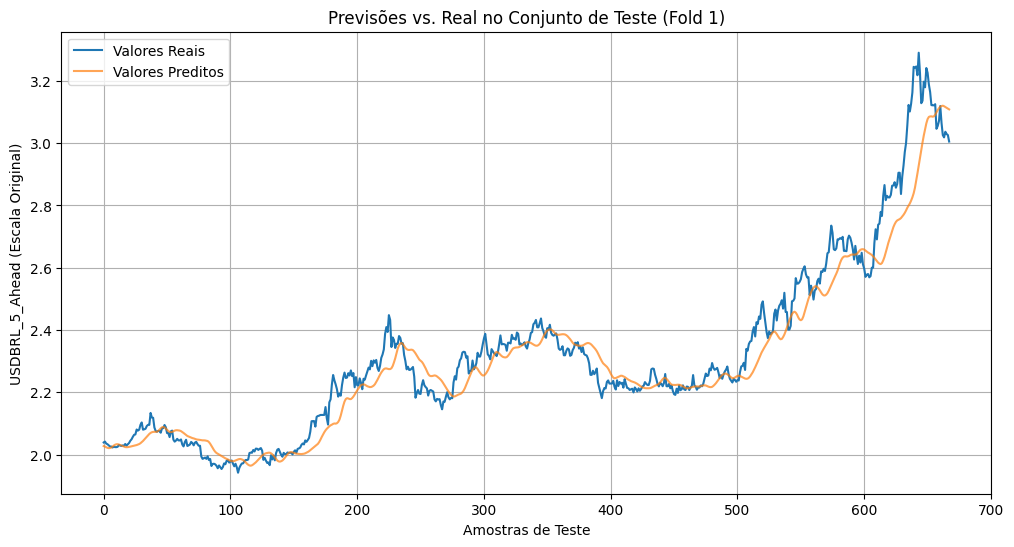


----- Processando Fold 2/5 -----
  Amostras de Treinamento (Fold 2): 1336
  Amostras de Teste (Fold 2): 668
  Modelo LSTM construído e compilado para o Fold 2.
  Iniciando treinamento para o Fold 2 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 2 (Melhor época: 16).
  Perda no Teste (MSE) do Keras para o Fold 2 (escala normalizada): 0.0004
  Erro Absoluto Médio (MAE) no Teste para o Fold 2 (escala original): 0.0699
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 2 (escala original): 0.0925


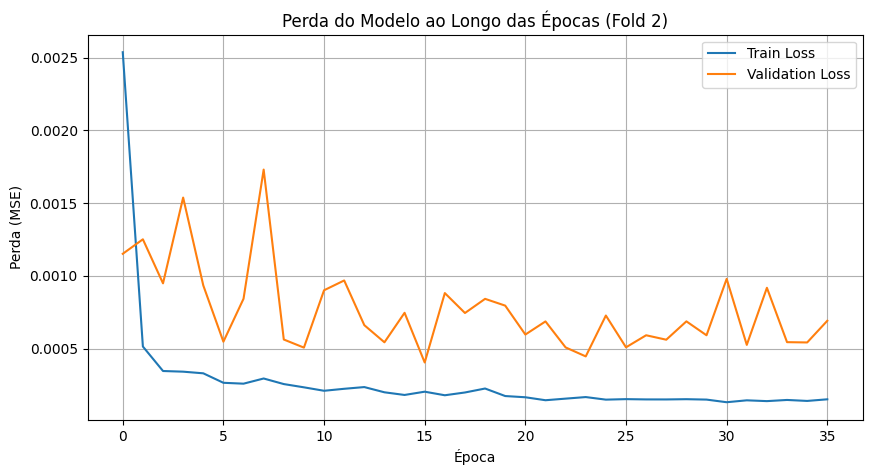

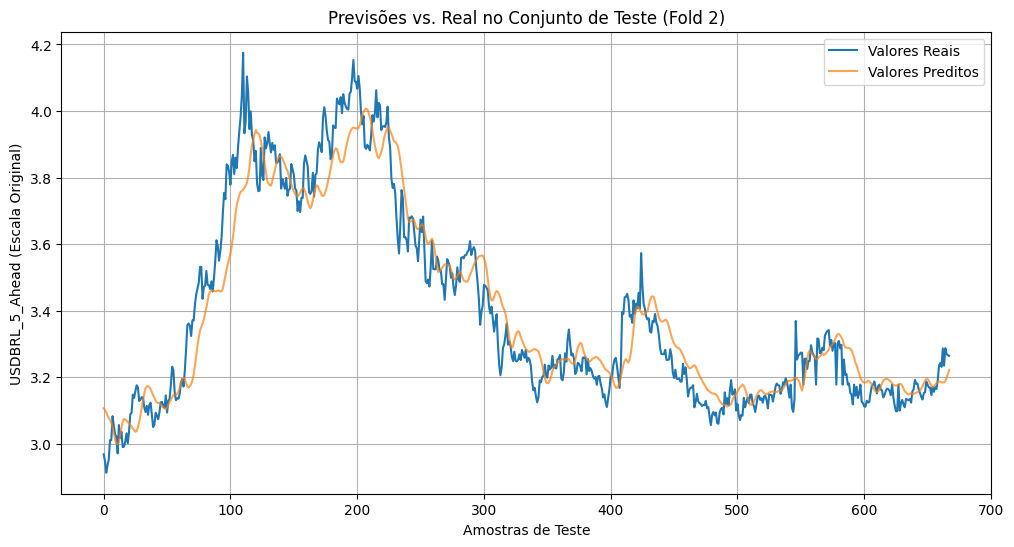


----- Processando Fold 3/5 -----
  Amostras de Treinamento (Fold 3): 2004
  Amostras de Teste (Fold 3): 668
  Modelo LSTM construído e compilado para o Fold 3.
  Iniciando treinamento para o Fold 3 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 3 (Melhor época: 29).
  Perda no Teste (MSE) do Keras para o Fold 3 (escala normalizada): 0.0010
  Erro Absoluto Médio (MAE) no Teste para o Fold 3 (escala original): 0.1027
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 3 (escala original): 0.1476


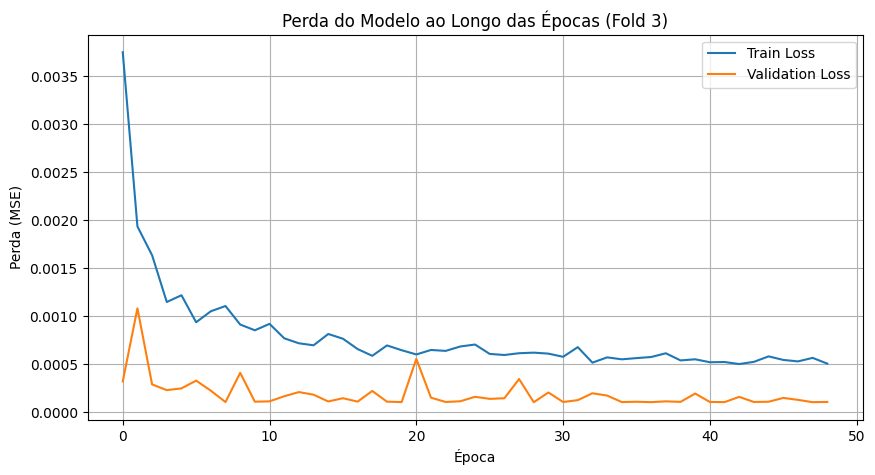

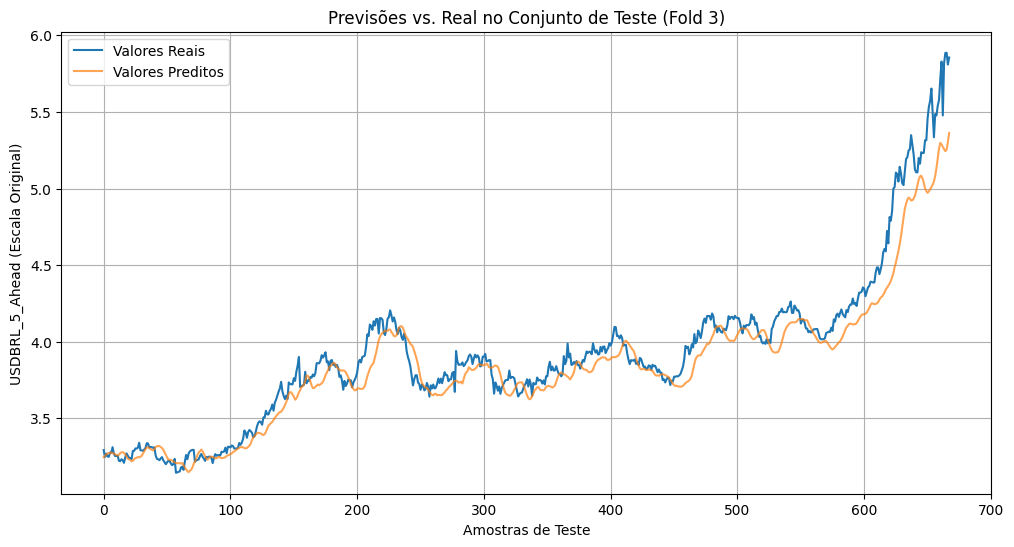


----- Processando Fold 4/5 -----
  Amostras de Treinamento (Fold 4): 2672
  Amostras de Teste (Fold 4): 668
  Modelo LSTM construído e compilado para o Fold 4.
  Iniciando treinamento para o Fold 4 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 4 (Melhor época: 38).
  Perda no Teste (MSE) do Keras para o Fold 4 (escala normalizada): 0.0010
  Erro Absoluto Médio (MAE) no Teste para o Fold 4 (escala original): 0.1200
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 4 (escala original): 0.1517


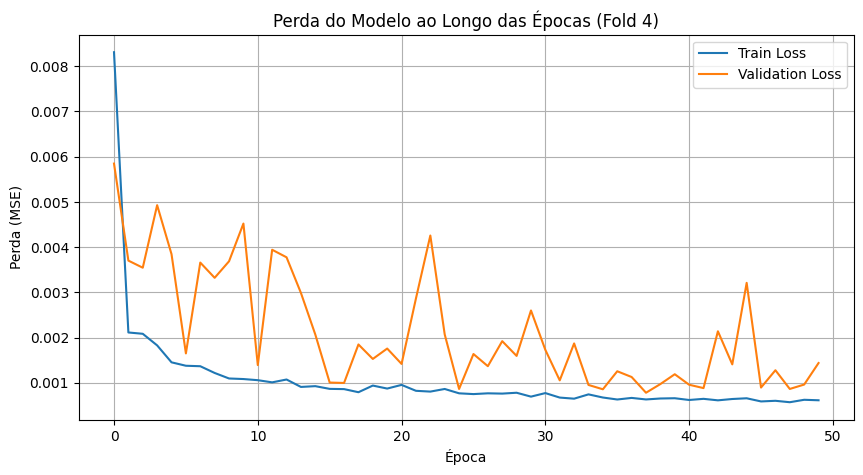

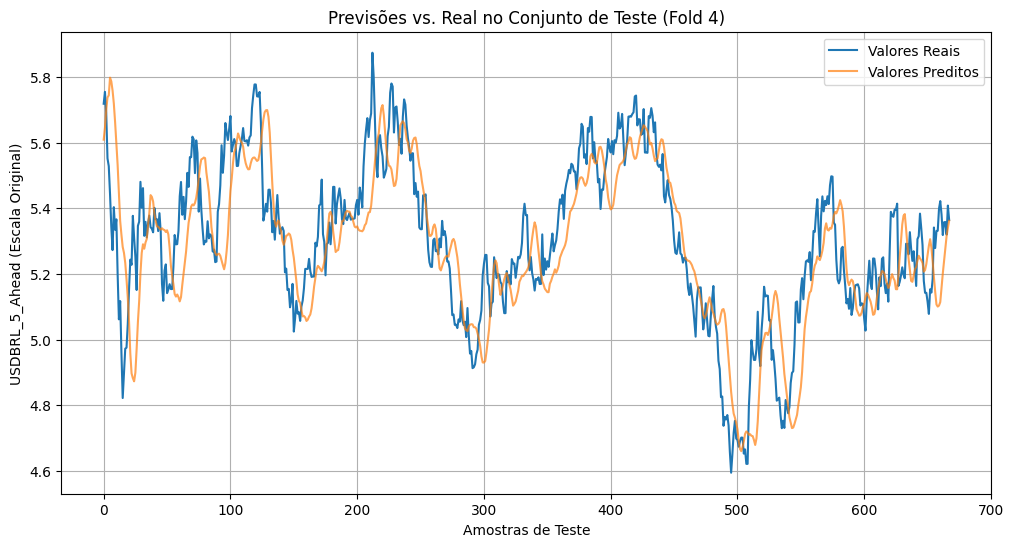


----- Processando Fold 5/5 -----
  Amostras de Treinamento (Fold 5): 3340
  Amostras de Teste (Fold 5): 668
  Modelo LSTM construído e compilado para o Fold 5.
  Iniciando treinamento para o Fold 5 (Épocas: 50, Batch Size: 32)...
  Treinamento concluído para o Fold 5 (Melhor época: 42).
  Perda no Teste (MSE) do Keras para o Fold 5 (escala normalizada): 0.0004
  Erro Absoluto Médio (MAE) no Teste para o Fold 5 (escala original): 0.0779
  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold 5 (escala original): 0.0989


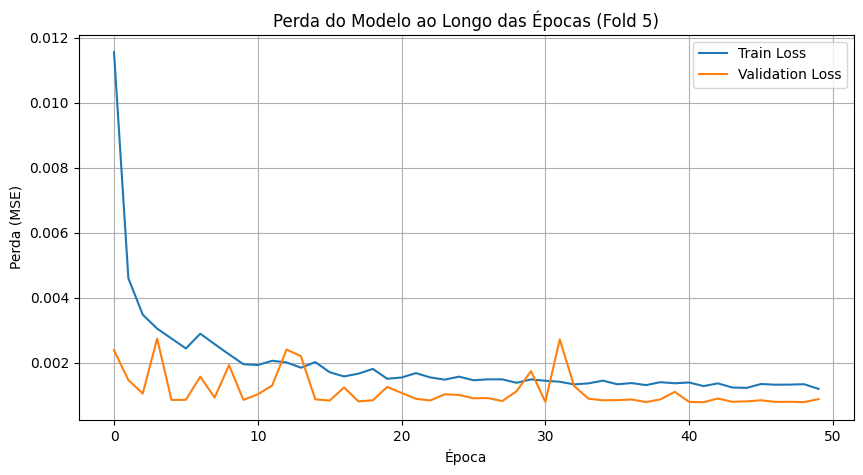

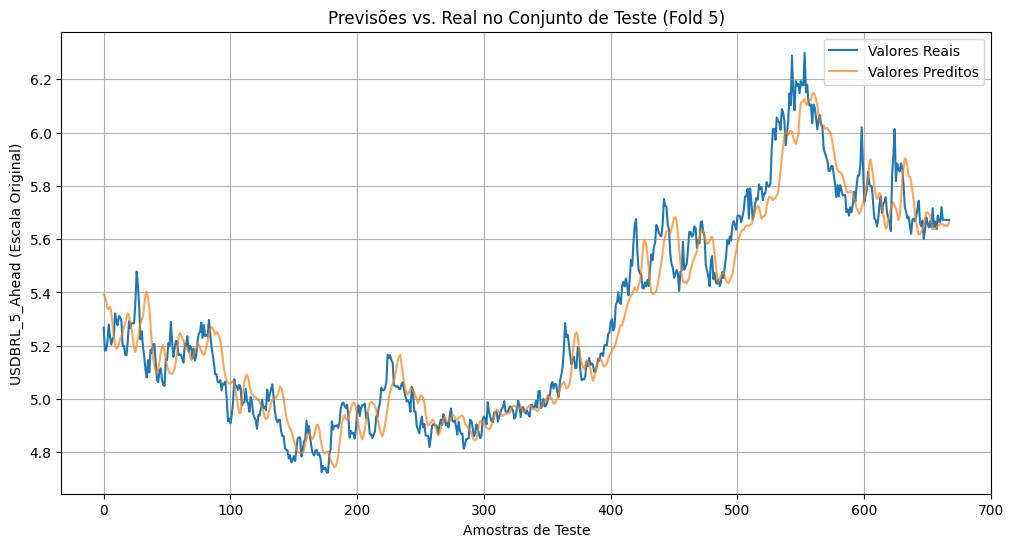


--- 11. Resultados Finais da Validação Cruzada ---
Perdas no Teste (MSE) por Fold (escala normalizada): ['0.0003', '0.0004', '0.0010', '0.0010', '0.0004']
Média da Perda no Teste (MSE) (escala normalizada): 0.0006
Desvio Padrão da Perda no Teste (MSE) (escala normalizada): 0.0003

Erros Absolutos


In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit # Para validação cruzada
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2 # Para regularização L2
from sklearn.metrics import mean_absolute_error, mean_squared_error # Importar métricas
import matplotlib.pyplot as plt
import tensorflow as tf
import random as python_random


# Definição das colunas de entrada e da coluna alvo
feature_columns = [
                   'USDBRL_MM_21',
                   'USDBRL_Variacao_5d', 'USDBRL_Lag_15d', 'USDBRL'
                  ]
target_column = 'USDBRL_5_Ahead' # A coluna que você quer prever

# --- 2. Parâmetros do Modelo e Treinamento ---
window_size = 60 # Tamanho da janela para as sequências de entrada do LSTM estavca 60
epochs_per_fold = 50 # Número de épocas de treinamento por fold da validação cruzada
batch_size = 32
l2_regularization_factor = 0.001 # Fator para a regularização L2 estava  0.001
n_splits_cv = 5 # Número de folds para a Validação Cruzada (TimeSeriesSplit)

# --- 3. Validação e Normalização dos Dados ---
print("\n--- 3. Validação e Normalização dos Dados ---")

# Verifica se as colunas de features existem no DataFrame
missing_features = [col for col in feature_columns if col not in df_dados.columns]
if missing_features:
    print(f"Aviso: Colunas de feature ausentes no DataFrame: {missing_features}. Removendo-as da lista.")
    feature_columns = [col for col in feature_columns if col in df_dados.columns]
    if not feature_columns:
        print("Erro: Nenhuma coluna de feature válida para processamento. Encerrando o script.")
        exit()

# Verifica se a coluna alvo existe
if target_column not in df_dados.columns:
    print(f"Erro: Coluna alvo '{target_column}' não encontrada no DataFrame. Encerrando o script.")
    exit()

# Inicializa e aplica os scalers para normalização (MinMaxScaler é uma boa escolha aqui)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(df_dados[feature_columns])
y_scaled = scaler_y.fit_transform(df_dados[[target_column]])
print("Dados normalizados com sucesso.")

# --- 4. Criação das Sequências para o LSTM ---
print("\n--- 4. Criação das Sequências para o LSTM ---")
Xs, ys = [], []
# Loop para criar as sequências de entrada (X) e os alvos correspondentes (y)
for i in range(window_size, len(X_scaled)):
    Xs.append(X_scaled[i-window_size:i]) # Pega os dados da janela anterior
    ys.append(y_scaled[i])              # Pega o alvo correspondente ao fim da janela
X_seq = np.array(Xs)
y_seq = np.array(ys)
print(f"Sequências criadas. X_seq shape: {X_seq.shape}, y_seq shape: {y_seq.shape}")

# --- 5. Loop de Validação Cruzada de Séries Temporais (TimeSeriesSplit) ---
print(f"\n--- 5. Iniciando Validação Cruzada (TimeSeriesSplit) com {n_splits_cv} folds ---")
tscv = TimeSeriesSplit(n_splits=n_splits_cv) # Cria o objeto de validação cruzada
all_fold_losses = [] # Lista para armazenar as perdas de teste de cada fold (MSE)
all_fold_maes = []   # Lista para armazenar o Erro Absoluto Médio de teste de cada fold

# Define os callbacks de treinamento uma vez, eles serão usados em cada fold
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# Itera sobre cada fold gerado pelo TimeSeriesSplit
for fold, (train_index, test_index) in enumerate(tscv.split(X_seq), 1):
    print(f"\n----- Processando Fold {fold}/{n_splits_cv} -----")

    # Divide os dados em treino e teste para o fold atual, respeitando a ordem temporal
    X_train_fold, X_test_fold = X_seq[train_index], X_seq[test_index]
    y_train_fold, y_test_fold = y_seq[train_index], y_seq[test_index]

    print(f"  Amostras de Treinamento (Fold {fold}): {X_train_fold.shape[0]}")
    print(f"  Amostras de Teste (Fold {fold}): {X_test_fold.shape[0]}")

    # --- 6. Construção do Modelo LSTM (Reconstruído para cada Fold) ---
    # É CRUCIAL reconstruir o modelo em cada fold para garantir que os pesos
    # sejam treinados independentemente e não haja vazamento de informações.
    model = Sequential()
    # Camada LSTM 1: 128 neurônios, retorna sequências, ativação Tanh, regularização L2
    model.add(LSTM(128, return_sequences=True, input_shape=(X_train_fold.shape[1], X_train_fold.shape[2]),
                   activation='tanh'))
    model.add(Dropout(0.2)) # Dropout após a primeira camada LSTM

    # Camada LSTM 2: 64 neurônios, não retorna sequências (padrão), ativação Tanh, regularização L2
    model.add(LSTM(64, activation='tanh'))
    model.add(Dropout(0.2)) # Dropout após a segunda camada LSTM

    # Camada Densa Intermediária: 32 neurônios, ativação Tanh, regularização L2
    model.add(Dense(32, activation='tanh'))
    model.add(Dropout(0.2)) # Dropout após a camada Densa intermediária

    # Camada de Saída: 1 neurônio (para regressão), ativação linear (padrão)
    model.add(Dense(1))

    # Compilação do modelo com otimizador Adam e função de perda Mean Squared Error
    model.compile(optimizer='adam', loss='mean_squared_error')
    print(f"  Modelo LSTM construído e compilado para o Fold {fold}.")
    # model.summary() # Descomente esta linha para ver o resumo da arquitetura do modelo

    # --- 7. Treinamento do Modelo para o Fold Atual ---
    print(f"  Iniciando treinamento para o Fold {fold} (Épocas: {epochs_per_fold}, Batch Size: {batch_size})...")
    history = model.fit(X_train_fold, y_train_fold,
                        epochs=epochs_per_fold,
                        batch_size=batch_size,
                        validation_split=0.1, # Usa 10% dos dados de treino do fold para validação
                        callbacks=[early_stopping, reduce_lr], # Aplica os callbacks definidos
                        verbose=0) # Define verbose=0 para não poluir o console com o treinamento de cada época

    # Encontra a melhor época com base na menor perda de validação
    best_epoch = np.argmin(history.history['val_loss']) + 1
    print(f"  Treinamento concluído para o Fold {fold} (Melhor época: {best_epoch}).")

    # --- 8. Avaliação do Modelo e Cálculo de Métricas Adicionais ---
    # Perda MSE do Keras (na escala normalizada)
    mse_loss = model.evaluate(X_test_fold, y_test_fold, verbose=0)
    all_fold_losses.append(mse_loss)
    print(f"  Perda no Teste (MSE) do Keras para o Fold {fold} (escala normalizada): {mse_loss:.4f}")

    # Fazendo previsões no conjunto de teste (ainda NORMALIZADO)
    y_pred_scaled = model.predict(X_test_fold, verbose=0)

    # Invertendo a normalização para trazer os valores para a escala original
    y_test_original = scaler_y.inverse_transform(y_test_fold)
    y_pred_original = scaler_y.inverse_transform(y_pred_scaled)

    # Calculando MAE e RMSE (na escala original, mais fácil de interpretar)
    mae = mean_absolute_error(y_test_original, y_pred_original)
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original)) # RMSE é a raiz quadrada do MSE
    all_fold_maes.append(mae)

    print(f"  Erro Absoluto Médio (MAE) no Teste para o Fold {fold} (escala original): {mae:.4f}")
    print(f"  Raiz do Erro Quadrático Médio (RMSE) no Teste para o Fold {fold} (escala original): {rmse:.4f}")


    # --- 9. Visualização do Histórico de Treinamento ---
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Perda do Modelo ao Longo das Épocas (Fold {fold})')
    plt.xlabel('Época')
    plt.ylabel('Perda (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- 10. Gráfico de Previsões vs. Real (na escala original) ---
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_original, label='Valores Reais')
    plt.plot(y_pred_original, label='Valores Preditos', alpha=0.7)
    plt.title(f'Previsões vs. Real no Conjunto de Teste (Fold {fold})')
    plt.xlabel('Amostras de Teste')
    plt.ylabel(f'{target_column} (Escala Original)')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- 11. Resultados Finais da Validação Cruzada ---
print("\n--- 11. Resultados Finais da Validação Cruzada ---")
print(f"Perdas no Teste (MSE) por Fold (escala normalizada): {[f'{loss:.4f}' for loss in all_fold_losses]}")
print(f"Média da Perda no Teste (MSE) (escala normalizada): {np.mean(all_fold_losses):.4f}")
print(f"Desvio Padrão da Perda no Teste (MSE) (escala normalizada): {np.std(all_fold_losses):.4f}")

print(f"\nErros Absolutos")